# DQN

In this notebook, we'll build a neural network that can learn to play games through reinforcement learning. More specifically, we'll use Q-learning to train an agent to play a game called [Cart-Pole](https://gym.openai.com/envs/CartPole-v0). In this game, a freely swinging pole is attached to a cart. The cart can move to the left and right, and the goal is to keep the pole upright as long as possible.

![Cart-Pole](assets/cart-pole.jpg)

We can simulate this game using [OpenAI Gym](https://gym.openai.com/). First, let's check out how OpenAI Gym works. Then, we'll get into training an agent to play the Cart-Pole game.

In [1]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: /device:GPU:0


>**Note:** Make sure you have OpenAI Gym cloned into the same directory with this notebook. I've included `gym` as a submodule, so you can run `git submodule --init --recursive` to pull the contents into the `gym` repo.

>**Note:** Make sure you have OpenAI Gym cloned. Then run this command `pip install -e gym/[all]`.

In [2]:
import gym

## Create the Cart-Pole game environment
env = gym.make('CartPole-v0')
env = gym.make('CartPole-v1')

We interact with the simulation through `env`. To show the simulation running, you can use `env.render()` to render one frame. Passing in an action as an integer to `env.step` will generate the next step in the simulation.  You can see how many actions are possible from `env.action_space` and to get a random action you can use `env.action_space.sample()`. This is general to all Gym games. In the Cart-Pole game, there are two possible actions, moving the cart left or right. So there are two actions we can take, encoded as 0 and 1.

Run the code below to watch the simulation run.

In [3]:
import numpy as np

state = env.reset()
batch = []
for _ in range(1000):
    # env.render()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action) # take a random action
    batch.append([state, action, next_state, reward, float(done)])
    print('state, action, reward, done, info:', 
          state, action, reward, done, info)
    state = next_state
    if done:
        state = env.reset()

state, action, reward, done, info: [-0.03039188 -0.0115962  -0.01907798  0.0433319 ] 0 1.0 False {}
state, action, reward, done, info: [-0.03062381 -0.20643946 -0.01821134  0.32993501] 1 1.0 False {}
state, action, reward, done, info: [-0.0347526  -0.01106306 -0.01161264  0.03156517] 1 1.0 False {}
state, action, reward, done, info: [-0.03497386  0.18422348 -0.01098134 -0.26475893] 0 1.0 False {}
state, action, reward, done, info: [-0.03128939 -0.01074003 -0.01627652  0.02444025] 1 1.0 False {}
state, action, reward, done, info: [-0.03150419  0.18461151 -0.01578771 -0.27333334] 1 1.0 False {}
state, action, reward, done, info: [-0.02781196  0.37995513 -0.02125438 -0.57095364] 1 1.0 False {}
state, action, reward, done, info: [-0.02021286  0.57536859 -0.03267345 -0.87025595] 1 1.0 False {}
state, action, reward, done, info: [-0.00870548  0.77091939 -0.05007857 -1.17302987] 1 1.0 False {}
state, action, reward, done, info: [ 0.0067129   0.96665525 -0.07353917 -1.48098253] 1 1.0 False {}


state, action, reward, done, info: [ 0.14165934  0.56202642 -0.16987534 -1.12446555] 1 1.0 False {}
state, action, reward, done, info: [ 0.15289987  0.75891772 -0.19236465 -1.46525487] 1 1.0 True {}
state, action, reward, done, info: [ 0.01384534  0.03148988  0.03684709 -0.03601031] 0 1.0 False {}
state, action, reward, done, info: [ 0.01447513 -0.16414056  0.03612688  0.26806676] 0 1.0 False {}
state, action, reward, done, info: [ 0.01119232 -0.35975897  0.04148821  0.5719219 ] 0 1.0 False {}
state, action, reward, done, info: [ 0.00399714 -0.55543738  0.05292665  0.87738097] 1 1.0 False {}
state, action, reward, done, info: [-0.0071116  -0.36107312  0.07047427  0.60179601] 1 1.0 False {}
state, action, reward, done, info: [-0.01433307 -0.16700406  0.08251019  0.33211732] 1 1.0 False {}
state, action, reward, done, info: [-0.01767315  0.02685245  0.08915254  0.06655228] 0 1.0 False {}
state, action, reward, done, info: [-0.0171361  -0.16942708  0.09048358  0.38597844] 1 1.0 False {}
s

state, action, reward, done, info: [-0.05158303 -0.13597955 -0.02924636 -0.29755537] 0 1.0 False {}
state, action, reward, done, info: [-0.05430262 -0.33067265 -0.03519747 -0.01423782] 1 1.0 False {}
state, action, reward, done, info: [-0.06091607 -0.13506406 -0.03548223 -0.31781489] 1 1.0 False {}
state, action, reward, done, info: [-0.06361735  0.06054482 -0.04183853 -0.62147312] 1 1.0 False {}
state, action, reward, done, info: [-0.06240646  0.25622529 -0.05426799 -0.9270339 ] 0 1.0 False {}
state, action, reward, done, info: [-0.05728195  0.06187645 -0.07280867 -0.65188677] 1 1.0 False {}
state, action, reward, done, info: [-0.05604442  0.25793283 -0.0858464  -0.96657903] 0 1.0 False {}
state, action, reward, done, info: [-0.05088576  0.06406213 -0.10517798 -0.70205175] 0 1.0 False {}
state, action, reward, done, info: [-0.04960452 -0.12945693 -0.11921902 -0.44424261] 1 1.0 False {}
state, action, reward, done, info: [-0.05219366  0.06713226 -0.12810387 -0.77200068] 0 1.0 False {}


state, action, reward, done, info: [-0.07203677 -0.80122855 -0.02254667  1.00075146] 0 1.0 False {}
state, action, reward, done, info: [-0.08806134 -0.99604204 -0.00253164  1.28626926] 1 1.0 False {}
state, action, reward, done, info: [-0.10798219 -0.80088796  0.02319374  0.99279478] 1 1.0 False {}
state, action, reward, done, info: [-0.12399994 -0.60608389  0.04304964  0.70748561] 1 1.0 False {}
state, action, reward, done, info: [-0.13612162 -0.41158391  0.05719935  0.42865864] 1 1.0 False {}
state, action, reward, done, info: [-0.1443533  -0.2173167   0.06577252  0.15454183] 1 1.0 False {}
state, action, reward, done, info: [-0.14869963 -0.02319513  0.06886336 -0.11668773] 1 1.0 False {}
state, action, reward, done, info: [-0.14916354  0.17087602  0.06652961 -0.38687466] 1 1.0 False {}
state, action, reward, done, info: [-0.14574602  0.36499358  0.05879211 -0.65786156] 1 1.0 False {}
state, action, reward, done, info: [-0.13844615  0.55925004  0.04563488 -0.93146789] 0 1.0 False {}


state, action, reward, done, info: [-0.06001505 -0.42140941  0.09389935  0.68448662] 0 1.0 False {}
state, action, reward, done, info: [-0.06844324 -0.61770099  0.10758909  1.00519276] 0 1.0 False {}
state, action, reward, done, info: [-0.08079726 -0.8140825   0.12769294  1.32963198] 1 1.0 False {}
state, action, reward, done, info: [-0.09707891 -0.62078173  0.15428558  1.0794813 ] 1 1.0 False {}
state, action, reward, done, info: [-0.10949454 -0.42799594  0.17587521  0.83891782] 0 1.0 False {}
state, action, reward, done, info: [-0.11805446 -0.625027    0.19265356  1.1813464 ] 0 1.0 True {}
state, action, reward, done, info: [-0.01577263  0.00026243  0.0389538   0.00943004] 1 1.0 False {}
state, action, reward, done, info: [-0.01576738  0.19480471  0.0391424  -0.27071249] 1 1.0 False {}
state, action, reward, done, info: [-0.01187129  0.38934687  0.03372815 -0.55079729] 1 1.0 False {}
state, action, reward, done, info: [-0.00408435  0.58397927  0.0227122  -0.83266564] 0 1.0 False {}
s

state, action, reward, done, info: [-0.10576969 -0.60615263  0.1338376   0.99939669] 1 1.0 False {}
state, action, reward, done, info: [-0.11789274 -0.41304882  0.15382553  0.75156223] 1 1.0 False {}
state, action, reward, done, info: [-0.12615372 -0.22034491  0.16885677  0.51096604] 0 1.0 False {}
state, action, reward, done, info: [-0.13056061 -0.41739273  0.1790761   0.85174233] 0 1.0 False {}
state, action, reward, done, info: [-0.13890847 -0.61444482  0.19611094  1.19496121] 0 1.0 True {}
state, action, reward, done, info: [-0.02305106 -0.02534323 -0.01978878 -0.00334428] 0 1.0 False {}
state, action, reward, done, info: [-0.02355793 -0.22017587 -0.01985566  0.28302995] 0 1.0 False {}
state, action, reward, done, info: [-0.02796144 -0.41500907 -0.01419507  0.56938496] 0 1.0 False {}
state, action, reward, done, info: [-0.03626163 -0.60992909 -0.00280737  0.85756232] 0 1.0 False {}
state, action, reward, done, info: [-0.04846021 -0.80501268  0.01434388  1.14936119] 0 1.0 False {}
s

To shut the window showing the simulation, use `env.close()`.

If you ran the simulation above, we can look at the rewards:

In [4]:
batch[0], batch[0][0].shape

([array([-0.03039188, -0.0115962 , -0.01907798,  0.0433319 ]),
  0,
  array([-0.03062381, -0.20643946, -0.01821134,  0.32993501]),
  1.0,
  0.0],
 (4,))

In [5]:
states = np.array([each[0] for each in batch])
actions = np.array([each[1] for each in batch])
next_states = np.array([each[2] for each in batch])
rewards = np.array([each[3] for each in batch])
dones = np.array([each[4] for each in batch])

In [6]:
print(rewards[-20:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)))
print((np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(1000,) (1000, 4) (1000,) (1000,)
float64 float64 int64 float64
1 0
2
1.0 1.0
2.233096682566667 -2.5749078087738426


The game resets after the pole has fallen past a certain angle. For each frame while the simulation is running, it returns a reward of 1.0. The longer the game runs, the more reward we get. Then, our network's goal is to maximize the reward by keeping the pole vertical. It will do this by moving the cart to the left and the right.

## Q-Network

We train our Q-learning agent using the Bellman Equation:

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

where $s$ is a state, $a$ is an action, and $s'$ is the next state from state $s$ and action $a$.

Before we used this equation to learn values for a Q-_table_. However, for this game there are a huge number of states available. The state has four values: the position and velocity of the cart, and the position and velocity of the pole. These are all real-valued numbers, so ignoring floating point precisions, you practically have infinite states. Instead of using a table then, we'll replace it with a neural network that will approximate the Q-table lookup function.

<img src="assets/deep-q-learning.png" width=450px>

Now, our Q value, $Q(s, a)$ is calculated by passing in a state to the network. The output will be Q-values for each available action, with fully connected hidden layers.

<img src="assets/q-network.png" width=550px>


As I showed before, we can define our targets for training as $\hat{Q}(s,a) = r + \gamma \max{Q(s', a')}$. Then we update the weights by minimizing $(\hat{Q}(s,a) - Q(s,a))^2$. 

For this Cart-Pole game, we have four inputs, one for each value in the state, and two outputs, one for each action. To get $\hat{Q}$, we'll first choose an action, then simulate the game using that action. This will get us the next state, $s'$, and the reward. With that, we can calculate $\hat{Q}$ then pass it back into the $Q$ network to run the optimizer and update the weights.

Below is my implementation of the Q-network. I used two fully connected layers with ReLU activations. Two seems to be good enough, three might be better. Feel free to try it out.

In [7]:
def model_input(state_size):
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    return states, actions, targetQs

In [8]:
# Generator: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)

        # return actions logits
        return logits

In [9]:
def model_loss(states, actions, targetQs, action_size, hidden_size):
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    Qs = tf.reduce_max(actions_logits*actions_labels, axis=1)
    #Qs = tf.reduce_max(actions_logits, axis=1)
    loss = tf.reduce_mean(tf.square(Qs - targetQs))
    return actions_logits, loss

In [10]:
def model_opt(loss, learning_rate):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        opt = tf.train.AdamOptimizer(learning_rate).minimize(loss, var_list=g_vars)

    return opt

In [11]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.loss = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, targetQs=self.targetQs) # model input

        # Update the model: backward pass and backprop
        self.opt = model_opt(loss=self.loss, learning_rate=learning_rate)

## Experience replay

Reinforcement learning algorithms can have stability issues due to correlations between states. To reduce correlations when training, we can store the agent's experiences and later draw a random mini-batch of those experiences to train on. 

Here, we'll create a `Memory` object that will store our experiences, our transitions $<s, a, r, s'>$. This memory will have a maxmium capacity, so we can keep newer experiences in memory while getting rid of older experiences. Then, we'll sample a random mini-batch of transitions $<s, a, r, s'>$ and train on those.

Below, I've implemented a `Memory` object. If you're unfamiliar with `deque`, this is a double-ended queue. You can think of it like a tube open on both sides. You can put objects in either side of the tube. But if it's full, adding anything more will push an object out the other side. This is a great data structure to use for the memory buffer.

In [12]:
from collections import deque
class Memory():
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size) # data
        self.rates = deque(maxlen=max_size) # rate
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [13]:
# def sample(arr, batch_size):
#     idx = np.random.choice(np.arange(len(arr)), 
#                            size=batch_size, 
#                            replace=False)
#     return [self.buffer[ii] for ii in idx]

In [14]:
# from collections import deque
# class Memory():
#     def __init__(self, max_size = 1000):
#         self.buffer = deque(maxlen=max_size)
#     def sample(self, batch_size):
#         idx = np.random.choice(np.arange(len(self.buffer)), 
#                                size=batch_size, 
#                                replace=False)
#         return [self.buffer[ii] for ii in idx]

## Exploration - Exploitation

To learn about the environment and rules of the game, the agent needs to explore by taking random actions. We'll do this by choosing a random action with some probability $\epsilon$ (epsilon).  That is, with some probability $\epsilon$ the agent will make a random action and with probability $1 - \epsilon$, the agent will choose an action from $Q(s,a)$. This is called an **$\epsilon$-greedy policy**.


At first, the agent needs to do a lot of exploring. Later when it has learned more, the agent can favor choosing actions based on what it has learned. This is called _exploitation_. We'll set it up so the agent is more likely to explore early in training, then more likely to exploit later in training.

## Q-Learning training algorithm

Putting all this together, we can list out the algorithm we'll use to train the network. We'll train the network in _episodes_. One *episode* is one simulation of the game. For this game, the goal is to keep the pole upright for 195 frames. So we can start a new episode once meeting that goal. The game ends if the pole tilts over too far, or if the cart moves too far the left or right. When a game ends, we'll start a new episode. Now, to train the agent:

* Initialize the memory $D$
* Initialize the action-value network $Q$ with random weights
* **For** episode = 1, $M$ **do**
  * **For** $t$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \mathrm{argmax}_a Q(s,a)$
     * Execute action $a_t$ in simulator and observe reward $r_{t+1}$ and new state $s_{t+1}$
     * Store transition $<s_t, a_t, r_{t+1}, s_{t+1}>$ in memory $D$
     * Sample random mini-batch from $D$: $<s_j, a_j, r_j, s'_j>$
     * Set $\hat{Q}_j = r_j$ if the episode ends at $j+1$, otherwise set $\hat{Q}_j = r_j + \gamma \max_{a'}{Q(s'_j, a')}$
     * Make a gradient descent step with loss $(\hat{Q}_j - Q(s_j, a_j))^2$
  * **endfor**
* **endfor**

## Hyperparameters

One of the more difficult aspects of reinforcememt learning are the large number of hyperparameters. Not only are we tuning the network, but we're tuning the simulation.

In [13]:
env.observation_space, env.action_space

(Box(4,), Discrete(2))

In [14]:
# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
action_size = 2
state_size = 4
hidden_size = 64               # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
# batch_size = 100               # experience mini-batch size
gamma = 0.99                   # future reward discount

In [15]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

## Populate the memory (exprience memory)

Here I'm re-initializing the simulation and pre-populating the memory. The agent is taking random actions and storing the transitions in memory. This will help the agent with exploring the game.

In [16]:
state = env.reset()
total_reward = 0
num_step = 0
for _ in range(memory_size):
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    memory.buffer.append([state, action, next_state, reward, float(done)])
    memory.rates.append(-1) # empty
    state = next_state
    total_reward += reward
    num_step += 1
    if done is True:
        state = env.reset()
        rate = total_reward/500
        total_reward = 0 # reset
        for idx in range(num_step): # episode length
            if memory.rates[-1-idx] == -1:
                memory.rates[-1-idx] = rate
        num_step = 0 # reset

In [17]:
batch = memory.buffer
states = np.array([each[0] for each in batch])
actions = np.array([each[1] for each in batch])
next_states = np.array([each[2] for each in batch])
rewards = np.array([each[3] for each in batch])
dones = np.array([each[4] for each in batch])

In [18]:
dones, np.argmax(dones), dones[np.argmax(dones)], dones[0]

(array([0., 0., 0., ..., 0., 0., 0.]), 27, 1.0, 0.0)

In [20]:
rates = np.array(memory.rates)

In [21]:
rates

array([ 0.056,  0.056,  0.056, ..., -1.   , -1.   , -1.   ])

In [22]:
np.max(rates), np.min(rates)

(0.13, -1.0)

In [23]:
states[rates == np.max(rates)].shape

(65, 4)

In [24]:
rates[rates == np.max(rates)].shape

(65,)

In [25]:
rates[rates == np.max(rates)]

array([0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13,
       0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13,
       0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13,
       0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13,
       0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13,
       0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13])

In [26]:
percentage = gamma

In [27]:
batch = memory.buffer
states = np.array([each[0] for each in batch])[rates >= (np.max(rates)*percentage)]
actions = np.array([each[1] for each in batch])[rates >= (np.max(rates)*percentage)]
next_states = np.array([each[2] for each in batch])[rates >= (np.max(rates)*percentage)]
rewards = np.array([each[3] for each in batch])[rates >= (np.max(rates)*percentage)]
dones = np.array([each[4] for each in batch])[rates >= (np.max(rates)*percentage)]
batch_rates = np.array(memory.rates)[rates >= (np.max(rates)*percentage)]

In [28]:
states.shape, actions.shape, next_states.shape, rewards.shape, dones.shape, batch_rates.shape

((65, 4), (65,), (65, 4), (65,), (65,), (65,))

## Training the model

Below we'll train our agent. If you want to watch it train, uncomment the `env.render()` line. This is slow because it's rendering the frames slower than the network can train. But, it's cool to watch the agent get better at the game.

In [29]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list, rewards_list, loss_list = [], [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    total_step = 0 # Explore or exploit parameter
    episode_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
    
    # Training episodes/epochs
    for ep in range(11111):
        total_reward = 0 # reset each episode
        loss_batch = [] # reset each episode
        state = env.reset() # each episode
        num_step = 0 # each episode

        # Training steps/batches
        while True:
            # Explore (Env) or Exploit (Model)
            total_step += 1
            explore_p = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * total_step) 
            if explore_p > np.random.rand():
                action = env.action_space.sample()
            else:
                action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
                action = np.argmax(action_logits)
            next_state, reward, done, _ = env.step(action)
            memory.buffer.append([state, action, next_state, reward, float(done)])
            memory.rates.append(-1) # empty
            total_reward += reward
            state = next_state
            num_step += 1
            #loss_batch.append(loss)
            if done is True:
                break
                
        # Rating the state-action pair/ trajectory
        rate = total_reward/500 # update rate at the end/ when episode is done
        for idx in range(num_step): # episode length
            if memory.rates[-1-idx] == -1: # double-check the landmark/marked indexes
                memory.rates[-1-idx] = rate # rate the trajectory/data
                
        # Training after rating
        rates = np.array(memory.rates)
        batch = memory.buffer
        states = np.array([each[0] for each in batch])[rates >= (np.max(rates)*percentage)]
        actions = np.array([each[1] for each in batch])[rates >= (np.max(rates)*percentage)]
        next_states = np.array([each[2] for each in batch])[rates >= (np.max(rates)*percentage)]
        rewards = np.array([each[3] for each in batch])[rates >= (np.max(rates)*percentage)]
        dones = np.array([each[4] for each in batch])[rates >= (np.max(rates)*percentage)]
        maxrates = np.array(memory.rates)[rates >= (np.max(rates)*percentage)]            
        next_actions_logits = sess.run(model.actions_logits, feed_dict = {model.states: next_states})
        nextQs = np.max(next_actions_logits, axis=1) * (1-dones)
        targetQs = rewards + (gamma * nextQs)
        loss, _ = sess.run([model.loss, model.opt], feed_dict = {model.states: states, 
                                                                 model.actions: actions,
                                                                 model.targetQs: targetQs})
        # Printing out
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{}'.format(total_reward),
              'rate:{}'.format(rate),
              'maxrate:{}'.format(np.max(rates)),
              'mbsize:{}'.format(len(maxrates)),
              'loss:{:.4f}'.format(loss),
              'exploreP:{:.4f}'.format(explore_p))
        
        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        loss_list.append([ep, loss])
        
        # Break episode/epoch loop
        if np.mean(episode_reward) >= 500:
            break
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model.ckpt')

Episode:0 meanR:20.0000 R:20.0 rate:0.04 maxrate:0.13 mbsize:65 loss:1.0611 exploreP:0.9980
Episode:1 meanR:16.5000 R:13.0 rate:0.026 maxrate:0.13 mbsize:65 loss:1.0663 exploreP:0.9967
Episode:2 meanR:16.6667 R:17.0 rate:0.034 maxrate:0.13 mbsize:65 loss:1.0715 exploreP:0.9951
Episode:3 meanR:17.7500 R:21.0 rate:0.042 maxrate:0.13 mbsize:65 loss:1.0768 exploreP:0.9930
Episode:4 meanR:19.2000 R:25.0 rate:0.05 maxrate:0.13 mbsize:65 loss:1.0820 exploreP:0.9905
Episode:5 meanR:22.0000 R:36.0 rate:0.072 maxrate:0.13 mbsize:65 loss:1.0873 exploreP:0.9870
Episode:6 meanR:22.0000 R:22.0 rate:0.044 maxrate:0.13 mbsize:65 loss:1.0926 exploreP:0.9849
Episode:7 meanR:22.3750 R:25.0 rate:0.05 maxrate:0.13 mbsize:65 loss:1.0979 exploreP:0.9824
Episode:8 meanR:25.5556 R:51.0 rate:0.102 maxrate:0.13 mbsize:65 loss:1.1033 exploreP:0.9775
Episode:9 meanR:24.1000 R:11.0 rate:0.022 maxrate:0.13 mbsize:65 loss:1.1087 exploreP:0.9764
Episode:10 meanR:23.0909 R:13.0 rate:0.026 maxrate:0.13 mbsize:65 loss:1.

Episode:96 meanR:21.4330 R:13.0 rate:0.026 maxrate:0.164 mbsize:82 loss:1.3549 exploreP:0.8142
Episode:97 meanR:21.7143 R:49.0 rate:0.098 maxrate:0.164 mbsize:82 loss:1.3550 exploreP:0.8102
Episode:98 meanR:22.0303 R:53.0 rate:0.106 maxrate:0.164 mbsize:82 loss:1.3552 exploreP:0.8060
Episode:99 meanR:22.0000 R:19.0 rate:0.038 maxrate:0.164 mbsize:82 loss:1.3554 exploreP:0.8045
Episode:100 meanR:21.9300 R:13.0 rate:0.026 maxrate:0.164 mbsize:82 loss:1.3557 exploreP:0.8035
Episode:101 meanR:21.9300 R:13.0 rate:0.026 maxrate:0.164 mbsize:82 loss:1.3560 exploreP:0.8024
Episode:102 meanR:21.8800 R:12.0 rate:0.024 maxrate:0.164 mbsize:82 loss:1.3563 exploreP:0.8015
Episode:103 meanR:21.8300 R:16.0 rate:0.032 maxrate:0.164 mbsize:82 loss:1.3566 exploreP:0.8002
Episode:104 meanR:21.7600 R:18.0 rate:0.036 maxrate:0.164 mbsize:82 loss:1.3570 exploreP:0.7988
Episode:105 meanR:21.6100 R:21.0 rate:0.042 maxrate:0.164 mbsize:82 loss:1.3575 exploreP:0.7971
Episode:106 meanR:21.5000 R:11.0 rate:0.022 

Episode:186 meanR:20.0500 R:13.0 rate:0.026 maxrate:0.164 mbsize:82 loss:1.4449 exploreP:0.6845
Episode:187 meanR:19.7100 R:21.0 rate:0.042 maxrate:0.164 mbsize:82 loss:1.4468 exploreP:0.6831
Episode:188 meanR:19.5900 R:12.0 rate:0.024 maxrate:0.164 mbsize:82 loss:1.4488 exploreP:0.6823
Episode:189 meanR:19.6500 R:19.0 rate:0.038 maxrate:0.164 mbsize:82 loss:1.4509 exploreP:0.6810
Episode:190 meanR:19.8000 R:26.0 rate:0.052 maxrate:0.164 mbsize:82 loss:1.4530 exploreP:0.6793
Episode:191 meanR:19.9000 R:19.0 rate:0.038 maxrate:0.164 mbsize:82 loss:1.4551 exploreP:0.6780
Episode:192 meanR:19.9600 R:25.0 rate:0.05 maxrate:0.164 mbsize:82 loss:1.4572 exploreP:0.6763
Episode:193 meanR:19.3400 R:20.0 rate:0.04 maxrate:0.164 mbsize:82 loss:1.4593 exploreP:0.6750
Episode:194 meanR:19.3900 R:15.0 rate:0.03 maxrate:0.164 mbsize:82 loss:1.4615 exploreP:0.6740
Episode:195 meanR:19.4000 R:12.0 rate:0.024 maxrate:0.164 mbsize:82 loss:1.4637 exploreP:0.6732
Episode:196 meanR:19.4700 R:20.0 rate:0.04 

Episode:276 meanR:16.8100 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:1.7566 exploreP:0.5907
Episode:277 meanR:16.6500 R:10.0 rate:0.02 maxrate:0.164 mbsize:82 loss:1.7619 exploreP:0.5901
Episode:278 meanR:16.6100 R:12.0 rate:0.024 maxrate:0.164 mbsize:82 loss:1.7672 exploreP:0.5894
Episode:279 meanR:16.5200 R:10.0 rate:0.02 maxrate:0.164 mbsize:82 loss:1.7725 exploreP:0.5888
Episode:280 meanR:16.5700 R:13.0 rate:0.026 maxrate:0.164 mbsize:82 loss:1.7779 exploreP:0.5881
Episode:281 meanR:16.4500 R:10.0 rate:0.02 maxrate:0.164 mbsize:82 loss:1.7833 exploreP:0.5875
Episode:282 meanR:16.4400 R:20.0 rate:0.04 maxrate:0.164 mbsize:82 loss:1.7887 exploreP:0.5863
Episode:283 meanR:16.4200 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:1.7942 exploreP:0.5855
Episode:284 meanR:16.2400 R:11.0 rate:0.022 maxrate:0.164 mbsize:82 loss:1.7997 exploreP:0.5849
Episode:285 meanR:16.2200 R:11.0 rate:0.022 maxrate:0.164 mbsize:82 loss:1.8053 exploreP:0.5843
Episode:286 meanR:16.2100 R:12.0 rate:0.024 

Episode:368 meanR:14.8900 R:42.0 rate:0.084 maxrate:0.164 mbsize:82 loss:2.4295 exploreP:0.5167
Episode:369 meanR:14.9400 R:15.0 rate:0.03 maxrate:0.164 mbsize:82 loss:2.4391 exploreP:0.5159
Episode:370 meanR:14.9200 R:11.0 rate:0.022 maxrate:0.164 mbsize:82 loss:2.4488 exploreP:0.5154
Episode:371 meanR:15.0900 R:33.0 rate:0.066 maxrate:0.164 mbsize:82 loss:2.4585 exploreP:0.5137
Episode:372 meanR:15.2000 R:22.0 rate:0.044 maxrate:0.164 mbsize:82 loss:2.4683 exploreP:0.5126
Episode:373 meanR:15.1200 R:11.0 rate:0.022 maxrate:0.164 mbsize:82 loss:2.4782 exploreP:0.5121
Episode:374 meanR:15.0200 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:2.4882 exploreP:0.5114
Episode:375 meanR:14.9500 R:12.0 rate:0.024 maxrate:0.164 mbsize:82 loss:2.4982 exploreP:0.5107
Episode:376 meanR:14.9600 R:15.0 rate:0.03 maxrate:0.164 mbsize:82 loss:2.5083 exploreP:0.5100
Episode:377 meanR:15.0000 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:2.5185 exploreP:0.5093
Episode:378 meanR:15.3600 R:48.0 rate:0.09

Episode:455 meanR:14.5300 R:9.0 rate:0.018 maxrate:0.164 mbsize:82 loss:3.5536 exploreP:0.4575
Episode:456 meanR:14.5900 R:17.0 rate:0.034 maxrate:0.164 mbsize:82 loss:3.5701 exploreP:0.4567
Episode:457 meanR:14.6700 R:22.0 rate:0.044 maxrate:0.164 mbsize:82 loss:3.5866 exploreP:0.4557
Episode:458 meanR:14.6500 R:10.0 rate:0.02 maxrate:0.164 mbsize:82 loss:3.6032 exploreP:0.4553
Episode:459 meanR:14.6500 R:11.0 rate:0.022 maxrate:0.164 mbsize:82 loss:3.6199 exploreP:0.4548
Episode:460 meanR:14.5800 R:10.0 rate:0.02 maxrate:0.164 mbsize:82 loss:3.6367 exploreP:0.4543
Episode:461 meanR:14.6400 R:16.0 rate:0.032 maxrate:0.164 mbsize:82 loss:3.6536 exploreP:0.4536
Episode:462 meanR:14.5700 R:9.0 rate:0.018 maxrate:0.164 mbsize:82 loss:3.6705 exploreP:0.4532
Episode:463 meanR:14.5100 R:12.0 rate:0.024 maxrate:0.164 mbsize:82 loss:3.6877 exploreP:0.4527
Episode:464 meanR:14.5400 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:3.7050 exploreP:0.4521
Episode:465 meanR:14.5200 R:11.0 rate:0.022 

Episode:542 meanR:12.9600 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:5.1328 exploreP:0.4105
Episode:543 meanR:12.7400 R:10.0 rate:0.02 maxrate:0.164 mbsize:82 loss:5.1504 exploreP:0.4101
Episode:544 meanR:12.7800 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:5.1679 exploreP:0.4095
Episode:545 meanR:12.7900 R:11.0 rate:0.022 maxrate:0.164 mbsize:82 loss:5.1854 exploreP:0.4091
Episode:546 meanR:12.7800 R:9.0 rate:0.018 maxrate:0.164 mbsize:82 loss:5.2030 exploreP:0.4087
Episode:547 meanR:12.7500 R:11.0 rate:0.022 maxrate:0.164 mbsize:82 loss:5.2208 exploreP:0.4083
Episode:548 meanR:12.7500 R:13.0 rate:0.026 maxrate:0.164 mbsize:82 loss:5.2384 exploreP:0.4077
Episode:549 meanR:12.7500 R:10.0 rate:0.02 maxrate:0.164 mbsize:82 loss:5.2559 exploreP:0.4073
Episode:550 meanR:12.7700 R:12.0 rate:0.024 maxrate:0.164 mbsize:82 loss:5.2732 exploreP:0.4069
Episode:551 meanR:12.6500 R:13.0 rate:0.026 maxrate:0.164 mbsize:82 loss:5.2904 exploreP:0.4064
Episode:552 meanR:12.7000 R:17.0 rate:0.034

Episode:631 meanR:14.7300 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:6.8324 exploreP:0.3601
Episode:632 meanR:14.8200 R:17.0 rate:0.034 maxrate:0.164 mbsize:82 loss:6.8543 exploreP:0.3595
Episode:633 meanR:14.8300 R:15.0 rate:0.03 maxrate:0.164 mbsize:82 loss:6.8762 exploreP:0.3589
Episode:634 meanR:14.9000 R:18.0 rate:0.036 maxrate:0.164 mbsize:82 loss:6.8982 exploreP:0.3583
Episode:635 meanR:14.9700 R:22.0 rate:0.044 maxrate:0.164 mbsize:82 loss:6.9202 exploreP:0.3575
Episode:636 meanR:15.0800 R:21.0 rate:0.042 maxrate:0.164 mbsize:82 loss:6.9423 exploreP:0.3568
Episode:637 meanR:15.1300 R:16.0 rate:0.032 maxrate:0.164 mbsize:82 loss:6.9647 exploreP:0.3563
Episode:638 meanR:15.1500 R:15.0 rate:0.03 maxrate:0.164 mbsize:82 loss:6.9872 exploreP:0.3557
Episode:639 meanR:15.1900 R:14.0 rate:0.028 maxrate:0.164 mbsize:82 loss:7.0096 exploreP:0.3553
Episode:640 meanR:15.2800 R:19.0 rate:0.038 maxrate:0.164 mbsize:82 loss:7.0321 exploreP:0.3546
Episode:641 meanR:15.2900 R:13.0 rate:0.02

Episode:718 meanR:17.7100 R:19.0 rate:0.038 maxrate:0.164 mbsize:82 loss:9.0102 exploreP:0.3102
Episode:719 meanR:17.6400 R:20.0 rate:0.04 maxrate:0.164 mbsize:82 loss:9.0386 exploreP:0.3096
Episode:720 meanR:17.5900 R:17.0 rate:0.034 maxrate:0.164 mbsize:75 loss:9.6976 exploreP:0.3091
Episode:721 meanR:17.5700 R:17.0 rate:0.034 maxrate:0.164 mbsize:58 loss:12.0712 exploreP:0.3086
Episode:722 meanR:17.6800 R:25.0 rate:0.05 maxrate:0.164 mbsize:33 loss:17.9616 exploreP:0.3078
Episode:723 meanR:17.6900 R:21.0 rate:0.042 maxrate:0.164 mbsize:12 loss:46.2668 exploreP:0.3072
Episode:724 meanR:17.7000 R:22.0 rate:0.044 maxrate:0.134 mbsize:67 loss:10.3456 exploreP:0.3065
Episode:725 meanR:17.7400 R:19.0 rate:0.038 maxrate:0.134 mbsize:67 loss:10.3504 exploreP:0.3060
Episode:726 meanR:17.7400 R:15.0 rate:0.03 maxrate:0.134 mbsize:67 loss:10.3600 exploreP:0.3055
Episode:727 meanR:17.7900 R:21.0 rate:0.042 maxrate:0.134 mbsize:67 loss:10.3736 exploreP:0.3049
Episode:728 meanR:17.7900 R:17.0 rat

Episode:804 meanR:21.3600 R:39.0 rate:0.078 maxrate:0.126 mbsize:63 loss:12.5159 exploreP:0.2595
Episode:805 meanR:21.3900 R:25.0 rate:0.05 maxrate:0.126 mbsize:63 loss:12.5463 exploreP:0.2589
Episode:806 meanR:21.3500 R:22.0 rate:0.044 maxrate:0.126 mbsize:63 loss:12.5769 exploreP:0.2584
Episode:807 meanR:21.4000 R:25.0 rate:0.05 maxrate:0.126 mbsize:63 loss:12.6079 exploreP:0.2577
Episode:808 meanR:21.4200 R:18.0 rate:0.036 maxrate:0.126 mbsize:63 loss:12.6390 exploreP:0.2573
Episode:809 meanR:21.5700 R:33.0 rate:0.066 maxrate:0.126 mbsize:63 loss:12.6703 exploreP:0.2565
Episode:810 meanR:21.4800 R:27.0 rate:0.054 maxrate:0.126 mbsize:63 loss:12.7017 exploreP:0.2558
Episode:811 meanR:21.5500 R:22.0 rate:0.044 maxrate:0.126 mbsize:63 loss:12.7332 exploreP:0.2553
Episode:812 meanR:21.6100 R:25.0 rate:0.05 maxrate:0.126 mbsize:63 loss:12.7647 exploreP:0.2547
Episode:813 meanR:21.5700 R:17.0 rate:0.034 maxrate:0.126 mbsize:63 loss:12.7961 exploreP:0.2543
Episode:814 meanR:21.5400 R:19.0 

Episode:893 meanR:25.1600 R:21.0 rate:0.042 maxrate:0.096 mbsize:48 loss:38.7737 exploreP:0.2089
Episode:894 meanR:25.2600 R:26.0 rate:0.052 maxrate:0.096 mbsize:48 loss:38.8899 exploreP:0.2083
Episode:895 meanR:25.2700 R:21.0 rate:0.042 maxrate:0.096 mbsize:48 loss:39.0046 exploreP:0.2079
Episode:896 meanR:25.3300 R:22.0 rate:0.044 maxrate:0.096 mbsize:48 loss:39.1177 exploreP:0.2075
Episode:897 meanR:25.3500 R:21.0 rate:0.042 maxrate:0.096 mbsize:48 loss:39.2296 exploreP:0.2071
Episode:898 meanR:25.4000 R:25.0 rate:0.05 maxrate:0.096 mbsize:48 loss:39.3402 exploreP:0.2066
Episode:899 meanR:25.3300 R:22.0 rate:0.044 maxrate:0.096 mbsize:48 loss:39.4497 exploreP:0.2062
Episode:900 meanR:25.2800 R:25.0 rate:0.05 maxrate:0.096 mbsize:48 loss:39.5605 exploreP:0.2057
Episode:901 meanR:25.2600 R:19.0 rate:0.038 maxrate:0.096 mbsize:48 loss:39.6780 exploreP:0.2053
Episode:902 meanR:25.3400 R:23.0 rate:0.046 maxrate:0.096 mbsize:48 loss:39.7937 exploreP:0.2048
Episode:903 meanR:25.4300 R:30.0

Episode:980 meanR:28.1000 R:36.0 rate:0.072 maxrate:0.098 mbsize:49 loss:6.1151 exploreP:0.1653
Episode:981 meanR:28.3100 R:37.0 rate:0.074 maxrate:0.098 mbsize:49 loss:6.1159 exploreP:0.1647
Episode:982 meanR:28.4800 R:41.0 rate:0.082 maxrate:0.098 mbsize:49 loss:6.1166 exploreP:0.1641
Episode:983 meanR:28.6800 R:42.0 rate:0.084 maxrate:0.098 mbsize:49 loss:6.1174 exploreP:0.1634
Episode:984 meanR:28.7400 R:31.0 rate:0.062 maxrate:0.098 mbsize:49 loss:6.1183 exploreP:0.1629
Episode:985 meanR:28.8700 R:36.0 rate:0.072 maxrate:0.098 mbsize:49 loss:6.1192 exploreP:0.1624
Episode:986 meanR:29.0500 R:39.0 rate:0.078 maxrate:0.098 mbsize:49 loss:6.1202 exploreP:0.1618
Episode:987 meanR:29.0300 R:30.0 rate:0.06 maxrate:0.098 mbsize:49 loss:6.1212 exploreP:0.1613
Episode:988 meanR:28.9400 R:26.0 rate:0.052 maxrate:0.098 mbsize:49 loss:6.1222 exploreP:0.1609
Episode:989 meanR:28.9600 R:29.0 rate:0.058 maxrate:0.098 mbsize:49 loss:6.1233 exploreP:0.1605
Episode:990 meanR:28.9600 R:35.0 rate:0.0

Episode:1070 meanR:31.5100 R:24.0 rate:0.048 maxrate:0.1 mbsize:50 loss:6.9561 exploreP:0.1271
Episode:1071 meanR:31.5200 R:36.0 rate:0.072 maxrate:0.1 mbsize:50 loss:6.9585 exploreP:0.1267
Episode:1072 meanR:31.5200 R:36.0 rate:0.072 maxrate:0.1 mbsize:50 loss:6.9610 exploreP:0.1263
Episode:1073 meanR:31.5100 R:41.0 rate:0.082 maxrate:0.1 mbsize:50 loss:6.9634 exploreP:0.1258
Episode:1074 meanR:31.3900 R:28.0 rate:0.056 maxrate:0.1 mbsize:50 loss:6.9658 exploreP:0.1255
Episode:1075 meanR:31.5000 R:40.0 rate:0.08 maxrate:0.1 mbsize:50 loss:6.9682 exploreP:0.1250
Episode:1076 meanR:31.4100 R:25.0 rate:0.05 maxrate:0.1 mbsize:50 loss:6.9705 exploreP:0.1248
Episode:1077 meanR:31.5500 R:41.0 rate:0.082 maxrate:0.1 mbsize:50 loss:6.9728 exploreP:0.1243
Episode:1078 meanR:31.6200 R:32.0 rate:0.064 maxrate:0.1 mbsize:50 loss:6.9751 exploreP:0.1239
Episode:1079 meanR:31.6000 R:28.0 rate:0.056 maxrate:0.1 mbsize:50 loss:6.9773 exploreP:0.1236
Episode:1080 meanR:31.5100 R:27.0 rate:0.054 maxrate

Episode:1157 meanR:37.8800 R:31.0 rate:0.062 maxrate:0.124 mbsize:62 loss:7.5823 exploreP:0.0933
Episode:1158 meanR:38.2700 R:63.0 rate:0.126 maxrate:0.126 mbsize:63 loss:7.3291 exploreP:0.0928
Episode:1159 meanR:38.4000 R:41.0 rate:0.082 maxrate:0.126 mbsize:63 loss:7.3338 exploreP:0.0925
Episode:1160 meanR:38.8500 R:75.0 rate:0.15 maxrate:0.15 mbsize:75 loss:6.1771 exploreP:0.0919
Episode:1161 meanR:39.0100 R:45.0 rate:0.09 maxrate:0.15 mbsize:75 loss:6.1791 exploreP:0.0915
Episode:1162 meanR:39.1200 R:41.0 rate:0.082 maxrate:0.15 mbsize:75 loss:6.1817 exploreP:0.0912
Episode:1163 meanR:39.2700 R:43.0 rate:0.086 maxrate:0.15 mbsize:75 loss:6.1849 exploreP:0.0908
Episode:1164 meanR:39.2900 R:39.0 rate:0.078 maxrate:0.15 mbsize:75 loss:6.1884 exploreP:0.0905
Episode:1165 meanR:39.3700 R:42.0 rate:0.084 maxrate:0.15 mbsize:75 loss:6.1923 exploreP:0.0902
Episode:1166 meanR:39.4600 R:43.0 rate:0.086 maxrate:0.15 mbsize:75 loss:6.1963 exploreP:0.0898
Episode:1167 meanR:39.5400 R:33.0 rate:

Episode:1243 meanR:52.3900 R:38.0 rate:0.076 maxrate:0.202 mbsize:101 loss:6.5745 exploreP:0.0624
Episode:1244 meanR:52.7600 R:85.0 rate:0.17 maxrate:0.202 mbsize:101 loss:6.5853 exploreP:0.0620
Episode:1245 meanR:52.6600 R:36.0 rate:0.072 maxrate:0.202 mbsize:101 loss:6.5960 exploreP:0.0618
Episode:1246 meanR:52.4700 R:43.0 rate:0.086 maxrate:0.202 mbsize:101 loss:6.6067 exploreP:0.0616
Episode:1247 meanR:52.2100 R:33.0 rate:0.066 maxrate:0.202 mbsize:101 loss:6.6174 exploreP:0.0614
Episode:1248 meanR:52.4800 R:61.0 rate:0.122 maxrate:0.202 mbsize:101 loss:6.6280 exploreP:0.0611
Episode:1249 meanR:52.3400 R:41.0 rate:0.082 maxrate:0.202 mbsize:101 loss:6.6387 exploreP:0.0609
Episode:1250 meanR:52.4700 R:41.0 rate:0.082 maxrate:0.202 mbsize:101 loss:6.6494 exploreP:0.0607
Episode:1251 meanR:53.0300 R:97.0 rate:0.194 maxrate:0.202 mbsize:101 loss:6.6600 exploreP:0.0602
Episode:1252 meanR:53.1200 R:48.0 rate:0.096 maxrate:0.202 mbsize:101 loss:6.6707 exploreP:0.0600
Episode:1253 meanR:53

Episode:1327 meanR:49.8200 R:65.0 rate:0.13 maxrate:0.204 mbsize:203 loss:6.3124 exploreP:0.0449
Episode:1328 meanR:49.8600 R:47.0 rate:0.094 maxrate:0.204 mbsize:203 loss:6.3210 exploreP:0.0447
Episode:1329 meanR:49.5700 R:45.0 rate:0.09 maxrate:0.204 mbsize:203 loss:6.3296 exploreP:0.0445
Episode:1330 meanR:50.3600 R:127.0 rate:0.254 maxrate:0.254 mbsize:127 loss:4.1763 exploreP:0.0441
Episode:1331 meanR:50.4200 R:42.0 rate:0.084 maxrate:0.254 mbsize:127 loss:4.1809 exploreP:0.0440
Episode:1332 meanR:50.3900 R:46.0 rate:0.092 maxrate:0.254 mbsize:127 loss:4.1856 exploreP:0.0438
Episode:1333 meanR:50.7700 R:73.0 rate:0.146 maxrate:0.254 mbsize:127 loss:4.1904 exploreP:0.0436
Episode:1334 meanR:51.1200 R:94.0 rate:0.188 maxrate:0.254 mbsize:127 loss:4.1954 exploreP:0.0432
Episode:1335 meanR:51.1200 R:48.0 rate:0.096 maxrate:0.254 mbsize:127 loss:4.2005 exploreP:0.0431
Episode:1336 meanR:51.1800 R:68.0 rate:0.136 maxrate:0.254 mbsize:127 loss:4.2057 exploreP:0.0429
Episode:1337 meanR:51

Episode:1413 meanR:54.4000 R:49.0 rate:0.098 maxrate:0.278 mbsize:139 loss:6.9943 exploreP:0.0318
Episode:1414 meanR:54.5400 R:53.0 rate:0.106 maxrate:0.278 mbsize:139 loss:7.0022 exploreP:0.0316
Episode:1415 meanR:54.5400 R:39.0 rate:0.078 maxrate:0.278 mbsize:139 loss:7.0100 exploreP:0.0316
Episode:1416 meanR:53.9700 R:31.0 rate:0.062 maxrate:0.278 mbsize:139 loss:7.0179 exploreP:0.0315
Episode:1417 meanR:53.9300 R:39.0 rate:0.078 maxrate:0.278 mbsize:139 loss:7.0257 exploreP:0.0314
Episode:1418 meanR:53.8700 R:31.0 rate:0.062 maxrate:0.278 mbsize:139 loss:7.0334 exploreP:0.0313
Episode:1419 meanR:54.0000 R:55.0 rate:0.11 maxrate:0.278 mbsize:139 loss:7.0411 exploreP:0.0312
Episode:1420 meanR:53.9300 R:41.0 rate:0.082 maxrate:0.278 mbsize:139 loss:7.0488 exploreP:0.0311
Episode:1421 meanR:53.6900 R:33.0 rate:0.066 maxrate:0.278 mbsize:139 loss:7.0564 exploreP:0.0311
Episode:1422 meanR:53.6700 R:50.0 rate:0.1 maxrate:0.278 mbsize:139 loss:7.0640 exploreP:0.0310
Episode:1423 meanR:53.2

Episode:1500 meanR:44.6500 R:31.0 rate:0.062 maxrate:0.278 mbsize:139 loss:7.5239 exploreP:0.0248
Episode:1501 meanR:44.6000 R:47.0 rate:0.094 maxrate:0.278 mbsize:139 loss:7.5279 exploreP:0.0247
Episode:1502 meanR:44.7100 R:55.0 rate:0.11 maxrate:0.278 mbsize:139 loss:7.5318 exploreP:0.0247
Episode:1503 meanR:44.4400 R:35.0 rate:0.07 maxrate:0.278 mbsize:139 loss:7.5357 exploreP:0.0246
Episode:1504 meanR:44.3600 R:37.0 rate:0.074 maxrate:0.278 mbsize:139 loss:7.5395 exploreP:0.0246
Episode:1505 meanR:44.2800 R:29.0 rate:0.058 maxrate:0.278 mbsize:139 loss:7.5432 exploreP:0.0245
Episode:1506 meanR:44.7300 R:76.0 rate:0.152 maxrate:0.278 mbsize:139 loss:7.5469 exploreP:0.0244
Episode:1507 meanR:44.7600 R:42.0 rate:0.084 maxrate:0.278 mbsize:139 loss:7.5506 exploreP:0.0243
Episode:1508 meanR:44.4200 R:37.0 rate:0.074 maxrate:0.278 mbsize:139 loss:7.5543 exploreP:0.0243
Episode:1509 meanR:44.6000 R:73.0 rate:0.146 maxrate:0.278 mbsize:139 loss:7.5578 exploreP:0.0242
Episode:1510 meanR:44.

Episode:1586 meanR:47.5700 R:40.0 rate:0.08 maxrate:0.23 mbsize:115 loss:2.0424 exploreP:0.0197
Episode:1587 meanR:47.5300 R:47.0 rate:0.094 maxrate:0.23 mbsize:115 loss:2.0473 exploreP:0.0197
Episode:1588 meanR:47.5300 R:32.0 rate:0.064 maxrate:0.23 mbsize:115 loss:2.0494 exploreP:0.0197
Episode:1589 meanR:47.6100 R:50.0 rate:0.1 maxrate:0.23 mbsize:115 loss:2.0490 exploreP:0.0196
Episode:1590 meanR:47.5900 R:38.0 rate:0.076 maxrate:0.23 mbsize:115 loss:2.0463 exploreP:0.0196
Episode:1591 meanR:47.5000 R:28.0 rate:0.056 maxrate:0.23 mbsize:115 loss:2.0416 exploreP:0.0196
Episode:1592 meanR:47.5000 R:38.0 rate:0.076 maxrate:0.23 mbsize:115 loss:2.0351 exploreP:0.0195
Episode:1593 meanR:47.3600 R:27.0 rate:0.054 maxrate:0.23 mbsize:115 loss:2.0270 exploreP:0.0195
Episode:1594 meanR:47.4100 R:50.0 rate:0.1 maxrate:0.23 mbsize:115 loss:2.0175 exploreP:0.0194
Episode:1595 meanR:47.1400 R:35.0 rate:0.07 maxrate:0.23 mbsize:115 loss:2.0067 exploreP:0.0194
Episode:1596 meanR:47.1300 R:39.0 ra

Episode:1672 meanR:46.2100 R:34.0 rate:0.068 maxrate:0.23 mbsize:115 loss:1.3651 exploreP:0.0165
Episode:1673 meanR:46.2500 R:49.0 rate:0.098 maxrate:0.23 mbsize:115 loss:1.3648 exploreP:0.0164
Episode:1674 meanR:46.4500 R:45.0 rate:0.09 maxrate:0.23 mbsize:115 loss:1.3645 exploreP:0.0164
Episode:1675 meanR:46.5200 R:52.0 rate:0.104 maxrate:0.23 mbsize:115 loss:1.3643 exploreP:0.0164
Episode:1676 meanR:46.6900 R:64.0 rate:0.128 maxrate:0.23 mbsize:115 loss:1.3641 exploreP:0.0163
Episode:1677 meanR:46.6900 R:61.0 rate:0.122 maxrate:0.23 mbsize:115 loss:1.3639 exploreP:0.0163
Episode:1678 meanR:47.1500 R:75.0 rate:0.15 maxrate:0.23 mbsize:115 loss:1.3638 exploreP:0.0162
Episode:1679 meanR:47.2200 R:32.0 rate:0.064 maxrate:0.23 mbsize:115 loss:1.3636 exploreP:0.0162
Episode:1680 meanR:47.6600 R:68.0 rate:0.136 maxrate:0.23 mbsize:115 loss:1.3636 exploreP:0.0162
Episode:1681 meanR:47.8200 R:55.0 rate:0.11 maxrate:0.23 mbsize:115 loss:1.3635 exploreP:0.0161
Episode:1682 meanR:48.0700 R:50.0

Episode:1758 meanR:54.7100 R:40.0 rate:0.08 maxrate:0.238 mbsize:119 loss:1.2663 exploreP:0.0140
Episode:1759 meanR:54.6900 R:44.0 rate:0.088 maxrate:0.238 mbsize:119 loss:1.2676 exploreP:0.0140
Episode:1760 meanR:54.6600 R:48.0 rate:0.096 maxrate:0.238 mbsize:119 loss:1.2690 exploreP:0.0140
Episode:1761 meanR:54.4900 R:62.0 rate:0.124 maxrate:0.238 mbsize:119 loss:1.2704 exploreP:0.0140
Episode:1762 meanR:54.1300 R:57.0 rate:0.114 maxrate:0.238 mbsize:119 loss:1.2717 exploreP:0.0140
Episode:1763 meanR:54.2300 R:42.0 rate:0.084 maxrate:0.238 mbsize:119 loss:1.2731 exploreP:0.0139
Episode:1764 meanR:54.2800 R:35.0 rate:0.07 maxrate:0.238 mbsize:119 loss:1.2745 exploreP:0.0139
Episode:1765 meanR:54.2000 R:48.0 rate:0.096 maxrate:0.238 mbsize:119 loss:1.2758 exploreP:0.0139
Episode:1766 meanR:53.9600 R:43.0 rate:0.086 maxrate:0.238 mbsize:119 loss:1.2772 exploreP:0.0139
Episode:1767 meanR:53.8500 R:34.0 rate:0.068 maxrate:0.238 mbsize:119 loss:1.2785 exploreP:0.0139
Episode:1768 meanR:53.

Episode:1842 meanR:51.1800 R:30.0 rate:0.06 maxrate:0.238 mbsize:238 loss:1.1969 exploreP:0.0126
Episode:1843 meanR:51.3400 R:61.0 rate:0.122 maxrate:0.238 mbsize:238 loss:1.1974 exploreP:0.0126
Episode:1844 meanR:50.5800 R:43.0 rate:0.086 maxrate:0.238 mbsize:238 loss:1.1978 exploreP:0.0126
Episode:1845 meanR:50.4400 R:30.0 rate:0.06 maxrate:0.238 mbsize:238 loss:1.1983 exploreP:0.0126
Episode:1846 meanR:50.2200 R:28.0 rate:0.056 maxrate:0.238 mbsize:238 loss:1.1988 exploreP:0.0126
Episode:1847 meanR:50.2600 R:59.0 rate:0.118 maxrate:0.238 mbsize:238 loss:1.1992 exploreP:0.0126
Episode:1848 meanR:50.0500 R:26.0 rate:0.052 maxrate:0.238 mbsize:238 loss:1.1997 exploreP:0.0126
Episode:1849 meanR:50.1300 R:42.0 rate:0.084 maxrate:0.238 mbsize:238 loss:1.2001 exploreP:0.0126
Episode:1850 meanR:51.0300 R:126.0 rate:0.252 maxrate:0.252 mbsize:126 loss:0.8230 exploreP:0.0125
Episode:1851 meanR:51.0900 R:42.0 rate:0.084 maxrate:0.252 mbsize:126 loss:0.8236 exploreP:0.0125
Episode:1852 meanR:50

Episode:1928 meanR:38.2000 R:22.0 rate:0.044 maxrate:0.252 mbsize:126 loss:1.0048 exploreP:0.0119
Episode:1929 meanR:38.1700 R:26.0 rate:0.052 maxrate:0.252 mbsize:126 loss:1.0065 exploreP:0.0119
Episode:1930 meanR:37.8600 R:27.0 rate:0.054 maxrate:0.252 mbsize:126 loss:1.0082 exploreP:0.0119
Episode:1931 meanR:37.6600 R:32.0 rate:0.064 maxrate:0.252 mbsize:126 loss:1.0099 exploreP:0.0119
Episode:1932 meanR:37.5500 R:28.0 rate:0.056 maxrate:0.252 mbsize:126 loss:1.0115 exploreP:0.0119
Episode:1933 meanR:36.8400 R:19.0 rate:0.038 maxrate:0.252 mbsize:126 loss:1.0131 exploreP:0.0119
Episode:1934 meanR:36.6100 R:32.0 rate:0.064 maxrate:0.252 mbsize:126 loss:1.0147 exploreP:0.0119
Episode:1935 meanR:36.5000 R:25.0 rate:0.05 maxrate:0.252 mbsize:126 loss:1.0163 exploreP:0.0119
Episode:1936 meanR:36.4700 R:23.0 rate:0.046 maxrate:0.252 mbsize:126 loss:1.0178 exploreP:0.0119
Episode:1937 meanR:36.3200 R:25.0 rate:0.05 maxrate:0.252 mbsize:126 loss:1.0194 exploreP:0.0119
Episode:1938 meanR:36.

Episode:2014 meanR:26.0700 R:26.0 rate:0.052 maxrate:0.252 mbsize:126 loss:1.1068 exploreP:0.0115
Episode:2015 meanR:25.9300 R:18.0 rate:0.036 maxrate:0.252 mbsize:126 loss:1.1078 exploreP:0.0115
Episode:2016 meanR:25.9900 R:34.0 rate:0.068 maxrate:0.252 mbsize:126 loss:1.1088 exploreP:0.0115
Episode:2017 meanR:25.9500 R:30.0 rate:0.06 maxrate:0.252 mbsize:126 loss:1.1097 exploreP:0.0115
Episode:2018 meanR:25.9000 R:22.0 rate:0.044 maxrate:0.252 mbsize:126 loss:1.1107 exploreP:0.0115
Episode:2019 meanR:25.7300 R:20.0 rate:0.04 maxrate:0.252 mbsize:126 loss:1.1116 exploreP:0.0115
Episode:2020 meanR:25.8000 R:27.0 rate:0.054 maxrate:0.252 mbsize:126 loss:1.1126 exploreP:0.0115
Episode:2021 meanR:25.6700 R:24.0 rate:0.048 maxrate:0.252 mbsize:126 loss:1.1135 exploreP:0.0115
Episode:2022 meanR:25.6900 R:22.0 rate:0.044 maxrate:0.252 mbsize:126 loss:1.1145 exploreP:0.0115
Episode:2023 meanR:25.7500 R:29.0 rate:0.058 maxrate:0.252 mbsize:126 loss:1.1154 exploreP:0.0115
Episode:2024 meanR:25.

Episode:2098 meanR:24.2000 R:23.0 rate:0.046 maxrate:0.252 mbsize:126 loss:1.1849 exploreP:0.0112
Episode:2099 meanR:24.0900 R:21.0 rate:0.042 maxrate:0.252 mbsize:126 loss:1.1858 exploreP:0.0112
Episode:2100 meanR:24.0500 R:21.0 rate:0.042 maxrate:0.252 mbsize:126 loss:1.1867 exploreP:0.0112
Episode:2101 meanR:24.0500 R:26.0 rate:0.052 maxrate:0.252 mbsize:126 loss:1.1876 exploreP:0.0112
Episode:2102 meanR:24.0600 R:21.0 rate:0.042 maxrate:0.252 mbsize:126 loss:1.1886 exploreP:0.0112
Episode:2103 meanR:24.1200 R:29.0 rate:0.058 maxrate:0.252 mbsize:126 loss:1.1895 exploreP:0.0112
Episode:2104 meanR:24.1500 R:22.0 rate:0.044 maxrate:0.252 mbsize:126 loss:1.1904 exploreP:0.0112
Episode:2105 meanR:24.0900 R:19.0 rate:0.038 maxrate:0.252 mbsize:126 loss:1.1913 exploreP:0.0112
Episode:2106 meanR:24.1400 R:30.0 rate:0.06 maxrate:0.252 mbsize:126 loss:1.1922 exploreP:0.0112
Episode:2107 meanR:24.1100 R:23.0 rate:0.046 maxrate:0.252 mbsize:126 loss:1.1931 exploreP:0.0112
Episode:2108 meanR:24

Episode:2182 meanR:23.9700 R:28.0 rate:0.056 maxrate:0.252 mbsize:126 loss:1.2606 exploreP:0.0110
Episode:2183 meanR:23.9700 R:26.0 rate:0.052 maxrate:0.252 mbsize:126 loss:1.2616 exploreP:0.0110
Episode:2184 meanR:23.9100 R:20.0 rate:0.04 maxrate:0.252 mbsize:126 loss:1.2625 exploreP:0.0110
Episode:2185 meanR:23.7900 R:24.0 rate:0.048 maxrate:0.252 mbsize:126 loss:1.2634 exploreP:0.0110
Episode:2186 meanR:23.7600 R:18.0 rate:0.036 maxrate:0.252 mbsize:126 loss:1.2643 exploreP:0.0110
Episode:2187 meanR:23.6900 R:18.0 rate:0.036 maxrate:0.252 mbsize:126 loss:1.2652 exploreP:0.0110
Episode:2188 meanR:23.6700 R:24.0 rate:0.048 maxrate:0.252 mbsize:126 loss:1.2661 exploreP:0.0110
Episode:2189 meanR:23.7300 R:26.0 rate:0.052 maxrate:0.252 mbsize:126 loss:1.2670 exploreP:0.0110
Episode:2190 meanR:23.6300 R:20.0 rate:0.04 maxrate:0.252 mbsize:126 loss:1.2679 exploreP:0.0110
Episode:2191 meanR:23.6200 R:17.0 rate:0.034 maxrate:0.252 mbsize:126 loss:1.2689 exploreP:0.0110
Episode:2192 meanR:23.

Episode:2268 meanR:22.6000 R:19.0 rate:0.038 maxrate:0.13 mbsize:9 loss:447.8192 exploreP:0.0108
Episode:2269 meanR:22.5700 R:18.0 rate:0.036 maxrate:0.126 mbsize:63 loss:67.1087 exploreP:0.0108
Episode:2270 meanR:22.4800 R:13.0 rate:0.026 maxrate:0.126 mbsize:63 loss:67.0515 exploreP:0.0108
Episode:2271 meanR:22.4500 R:15.0 rate:0.03 maxrate:0.126 mbsize:63 loss:67.0014 exploreP:0.0108
Episode:2272 meanR:22.4200 R:18.0 rate:0.036 maxrate:0.126 mbsize:63 loss:66.9576 exploreP:0.0108
Episode:2273 meanR:22.3900 R:14.0 rate:0.028 maxrate:0.126 mbsize:63 loss:66.9193 exploreP:0.0108
Episode:2274 meanR:22.3000 R:15.0 rate:0.03 maxrate:0.126 mbsize:63 loss:66.8858 exploreP:0.0108
Episode:2275 meanR:22.1800 R:12.0 rate:0.024 maxrate:0.126 mbsize:63 loss:66.8566 exploreP:0.0108
Episode:2276 meanR:22.0000 R:11.0 rate:0.022 maxrate:0.126 mbsize:63 loss:66.8312 exploreP:0.0108
Episode:2277 meanR:21.9300 R:13.0 rate:0.026 maxrate:0.126 mbsize:63 loss:66.8091 exploreP:0.0108
Episode:2278 meanR:21.9

Episode:2353 meanR:28.2400 R:44.0 rate:0.088 maxrate:0.206 mbsize:205 loss:5.1772 exploreP:0.0107
Episode:2354 meanR:28.7200 R:72.0 rate:0.144 maxrate:0.206 mbsize:205 loss:5.1705 exploreP:0.0106
Episode:2355 meanR:29.1000 R:58.0 rate:0.116 maxrate:0.206 mbsize:205 loss:5.1641 exploreP:0.0106
Episode:2356 meanR:29.5000 R:64.0 rate:0.128 maxrate:0.206 mbsize:205 loss:5.1580 exploreP:0.0106
Episode:2357 meanR:29.8700 R:62.0 rate:0.124 maxrate:0.206 mbsize:205 loss:5.1522 exploreP:0.0106
Episode:2358 meanR:30.1900 R:52.0 rate:0.104 maxrate:0.206 mbsize:205 loss:5.1467 exploreP:0.0106
Episode:2359 meanR:30.5700 R:55.0 rate:0.11 maxrate:0.206 mbsize:205 loss:5.1414 exploreP:0.0106
Episode:2360 meanR:30.8200 R:43.0 rate:0.086 maxrate:0.206 mbsize:205 loss:5.1363 exploreP:0.0106
Episode:2361 meanR:31.1000 R:46.0 rate:0.092 maxrate:0.206 mbsize:205 loss:5.1315 exploreP:0.0106
Episode:2362 meanR:31.7600 R:81.0 rate:0.162 maxrate:0.206 mbsize:205 loss:5.1269 exploreP:0.0106
Episode:2363 meanR:32

Episode:2438 meanR:48.2200 R:24.0 rate:0.048 maxrate:0.272 mbsize:136 loss:52.3158 exploreP:0.0105
Episode:2439 meanR:47.6200 R:29.0 rate:0.058 maxrate:0.272 mbsize:136 loss:52.3354 exploreP:0.0104
Episode:2440 meanR:47.2000 R:30.0 rate:0.06 maxrate:0.272 mbsize:136 loss:52.3553 exploreP:0.0104
Episode:2441 meanR:46.7900 R:23.0 rate:0.046 maxrate:0.272 mbsize:136 loss:52.3754 exploreP:0.0104
Episode:2442 meanR:46.4200 R:21.0 rate:0.042 maxrate:0.272 mbsize:136 loss:52.3957 exploreP:0.0104
Episode:2443 meanR:46.1900 R:34.0 rate:0.068 maxrate:0.272 mbsize:136 loss:52.4161 exploreP:0.0104
Episode:2444 meanR:45.4600 R:21.0 rate:0.042 maxrate:0.272 mbsize:136 loss:52.4367 exploreP:0.0104
Episode:2445 meanR:45.0300 R:22.0 rate:0.044 maxrate:0.272 mbsize:136 loss:52.4575 exploreP:0.0104
Episode:2446 meanR:44.2600 R:25.0 rate:0.05 maxrate:0.272 mbsize:136 loss:52.4784 exploreP:0.0104
Episode:2447 meanR:43.6800 R:23.0 rate:0.046 maxrate:0.272 mbsize:136 loss:52.4995 exploreP:0.0104
Episode:2448

Episode:2521 meanR:23.7000 R:32.0 rate:0.064 maxrate:0.272 mbsize:136 loss:54.1555 exploreP:0.0104
Episode:2522 meanR:23.7100 R:22.0 rate:0.044 maxrate:0.272 mbsize:136 loss:54.1790 exploreP:0.0104
Episode:2523 meanR:23.6200 R:20.0 rate:0.04 maxrate:0.272 mbsize:136 loss:54.2025 exploreP:0.0104
Episode:2524 meanR:23.5300 R:22.0 rate:0.044 maxrate:0.272 mbsize:136 loss:54.2261 exploreP:0.0104
Episode:2525 meanR:23.5200 R:20.0 rate:0.04 maxrate:0.272 mbsize:136 loss:54.2497 exploreP:0.0104
Episode:2526 meanR:23.4300 R:19.0 rate:0.038 maxrate:0.272 mbsize:136 loss:54.2734 exploreP:0.0104
Episode:2527 meanR:23.4000 R:21.0 rate:0.042 maxrate:0.272 mbsize:136 loss:54.2971 exploreP:0.0104
Episode:2528 meanR:23.3700 R:19.0 rate:0.038 maxrate:0.272 mbsize:136 loss:54.3208 exploreP:0.0104
Episode:2529 meanR:23.4700 R:28.0 rate:0.056 maxrate:0.272 mbsize:136 loss:54.3446 exploreP:0.0104
Episode:2530 meanR:23.4600 R:24.0 rate:0.048 maxrate:0.272 mbsize:136 loss:54.3685 exploreP:0.0104
Episode:2531

Episode:2606 meanR:23.2200 R:26.0 rate:0.052 maxrate:0.272 mbsize:136 loss:56.3170 exploreP:0.0103
Episode:2607 meanR:23.2000 R:20.0 rate:0.04 maxrate:0.272 mbsize:136 loss:56.3445 exploreP:0.0103
Episode:2608 meanR:23.1900 R:19.0 rate:0.038 maxrate:0.272 mbsize:136 loss:56.3720 exploreP:0.0103
Episode:2609 meanR:23.1300 R:21.0 rate:0.042 maxrate:0.272 mbsize:136 loss:56.3997 exploreP:0.0103
Episode:2610 meanR:23.1300 R:20.0 rate:0.04 maxrate:0.272 mbsize:136 loss:56.4273 exploreP:0.0103
Episode:2611 meanR:23.0900 R:17.0 rate:0.034 maxrate:0.272 mbsize:136 loss:56.4551 exploreP:0.0103
Episode:2612 meanR:23.2000 R:27.0 rate:0.054 maxrate:0.272 mbsize:136 loss:56.4828 exploreP:0.0103
Episode:2613 meanR:23.2800 R:25.0 rate:0.05 maxrate:0.272 mbsize:136 loss:56.5107 exploreP:0.0103
Episode:2614 meanR:23.2700 R:24.0 rate:0.048 maxrate:0.272 mbsize:136 loss:56.5386 exploreP:0.0103
Episode:2615 meanR:23.2100 R:23.0 rate:0.046 maxrate:0.272 mbsize:136 loss:56.5665 exploreP:0.0103
Episode:2616 

Episode:2690 meanR:22.9500 R:22.0 rate:0.044 maxrate:0.272 mbsize:136 loss:58.8212 exploreP:0.0103
Episode:2691 meanR:23.0600 R:30.0 rate:0.06 maxrate:0.272 mbsize:136 loss:58.8535 exploreP:0.0102
Episode:2692 meanR:23.0400 R:23.0 rate:0.046 maxrate:0.272 mbsize:136 loss:58.8859 exploreP:0.0102
Episode:2693 meanR:23.0900 R:24.0 rate:0.048 maxrate:0.272 mbsize:136 loss:58.9183 exploreP:0.0102
Episode:2694 meanR:23.0000 R:18.0 rate:0.036 maxrate:0.272 mbsize:136 loss:58.9509 exploreP:0.0102
Episode:2695 meanR:22.9700 R:27.0 rate:0.054 maxrate:0.272 mbsize:136 loss:58.9834 exploreP:0.0102
Episode:2696 meanR:22.8600 R:17.0 rate:0.034 maxrate:0.272 mbsize:136 loss:59.0161 exploreP:0.0102
Episode:2697 meanR:22.8000 R:19.0 rate:0.038 maxrate:0.272 mbsize:136 loss:59.0488 exploreP:0.0102
Episode:2698 meanR:22.7200 R:19.0 rate:0.038 maxrate:0.272 mbsize:136 loss:59.0816 exploreP:0.0102
Episode:2699 meanR:22.7400 R:21.0 rate:0.042 maxrate:0.272 mbsize:136 loss:59.1144 exploreP:0.0102
Episode:270

Episode:2777 meanR:22.9100 R:18.0 rate:0.036 maxrate:0.272 mbsize:136 loss:61.8885 exploreP:0.0102
Episode:2778 meanR:22.9600 R:24.0 rate:0.048 maxrate:0.272 mbsize:136 loss:61.9270 exploreP:0.0102
Episode:2779 meanR:22.9900 R:23.0 rate:0.046 maxrate:0.272 mbsize:136 loss:61.9656 exploreP:0.0102
Episode:2780 meanR:22.9600 R:24.0 rate:0.048 maxrate:0.272 mbsize:136 loss:62.0042 exploreP:0.0102
Episode:2781 meanR:23.0800 R:30.0 rate:0.06 maxrate:0.272 mbsize:136 loss:62.0430 exploreP:0.0102
Episode:2782 meanR:22.9500 R:18.0 rate:0.036 maxrate:0.272 mbsize:136 loss:62.0818 exploreP:0.0102
Episode:2783 meanR:23.0100 R:25.0 rate:0.05 maxrate:0.272 mbsize:136 loss:62.1207 exploreP:0.0102
Episode:2784 meanR:22.9900 R:19.0 rate:0.038 maxrate:0.272 mbsize:136 loss:62.1596 exploreP:0.0102
Episode:2785 meanR:22.9200 R:21.0 rate:0.042 maxrate:0.272 mbsize:136 loss:62.1987 exploreP:0.0102
Episode:2786 meanR:22.9000 R:19.0 rate:0.038 maxrate:0.272 mbsize:136 loss:62.2378 exploreP:0.0102
Episode:2787

Episode:2864 meanR:20.3100 R:15.0 rate:0.03 maxrate:0.068 mbsize:34 loss:61.1136 exploreP:0.0102
Episode:2865 meanR:20.2300 R:13.0 rate:0.026 maxrate:0.068 mbsize:34 loss:60.9702 exploreP:0.0102
Episode:2866 meanR:20.1000 R:14.0 rate:0.028 maxrate:0.068 mbsize:34 loss:60.8323 exploreP:0.0102
Episode:2867 meanR:19.9000 R:12.0 rate:0.024 maxrate:0.068 mbsize:34 loss:60.6994 exploreP:0.0102
Episode:2868 meanR:19.7800 R:13.0 rate:0.026 maxrate:0.068 mbsize:34 loss:60.5713 exploreP:0.0102
Episode:2869 meanR:19.6300 R:14.0 rate:0.028 maxrate:0.068 mbsize:34 loss:60.4479 exploreP:0.0102
Episode:2870 meanR:19.5800 R:14.0 rate:0.028 maxrate:0.068 mbsize:34 loss:60.3285 exploreP:0.0102
Episode:2871 meanR:19.4100 R:12.0 rate:0.024 maxrate:0.068 mbsize:34 loss:60.2132 exploreP:0.0102
Episode:2872 meanR:19.3200 R:12.0 rate:0.024 maxrate:0.068 mbsize:34 loss:60.1019 exploreP:0.0102
Episode:2873 meanR:19.2700 R:14.0 rate:0.028 maxrate:0.068 mbsize:34 loss:59.9939 exploreP:0.0102
Episode:2874 meanR:19

Episode:2949 meanR:13.5300 R:17.0 rate:0.034 maxrate:0.064 mbsize:128 loss:53.7557 exploreP:0.0102
Episode:2950 meanR:13.4900 R:13.0 rate:0.026 maxrate:0.064 mbsize:128 loss:53.6395 exploreP:0.0102
Episode:2951 meanR:13.5400 R:18.0 rate:0.036 maxrate:0.064 mbsize:128 loss:53.5228 exploreP:0.0102
Episode:2952 meanR:13.5300 R:16.0 rate:0.032 maxrate:0.064 mbsize:128 loss:53.4057 exploreP:0.0102
Episode:2953 meanR:13.5400 R:14.0 rate:0.028 maxrate:0.064 mbsize:128 loss:53.2880 exploreP:0.0102
Episode:2954 meanR:13.5300 R:12.0 rate:0.024 maxrate:0.064 mbsize:128 loss:53.1692 exploreP:0.0102
Episode:2955 meanR:13.5500 R:18.0 rate:0.036 maxrate:0.064 mbsize:128 loss:53.0494 exploreP:0.0102
Episode:2956 meanR:13.5100 R:13.0 rate:0.026 maxrate:0.064 mbsize:128 loss:52.9291 exploreP:0.0102
Episode:2957 meanR:13.5000 R:15.0 rate:0.03 maxrate:0.064 mbsize:128 loss:52.8083 exploreP:0.0102
Episode:2958 meanR:13.5300 R:16.0 rate:0.032 maxrate:0.064 mbsize:128 loss:52.6873 exploreP:0.0102
Episode:295

Episode:3036 meanR:17.3800 R:25.0 rate:0.05 maxrate:0.064 mbsize:96 loss:42.1726 exploreP:0.0101
Episode:3037 meanR:17.4400 R:20.0 rate:0.04 maxrate:0.064 mbsize:96 loss:42.0420 exploreP:0.0101
Episode:3038 meanR:17.4700 R:18.0 rate:0.036 maxrate:0.064 mbsize:96 loss:41.9114 exploreP:0.0101
Episode:3039 meanR:17.5400 R:20.0 rate:0.04 maxrate:0.064 mbsize:96 loss:41.7806 exploreP:0.0101
Episode:3040 meanR:17.6100 R:22.0 rate:0.044 maxrate:0.064 mbsize:96 loss:41.6497 exploreP:0.0101
Episode:3041 meanR:17.7100 R:22.0 rate:0.044 maxrate:0.064 mbsize:96 loss:41.5187 exploreP:0.0101
Episode:3042 meanR:17.7400 R:17.0 rate:0.034 maxrate:0.064 mbsize:96 loss:41.3879 exploreP:0.0101
Episode:3043 meanR:17.7500 R:17.0 rate:0.034 maxrate:0.064 mbsize:96 loss:41.2571 exploreP:0.0101
Episode:3044 meanR:17.8800 R:27.0 rate:0.054 maxrate:0.064 mbsize:96 loss:41.1261 exploreP:0.0101
Episode:3045 meanR:17.8700 R:18.0 rate:0.036 maxrate:0.064 mbsize:96 loss:40.9950 exploreP:0.0101
Episode:3046 meanR:17.9

Episode:3122 meanR:25.6000 R:36.0 rate:0.072 maxrate:0.112 mbsize:56 loss:14.1416 exploreP:0.0101
Episode:3123 meanR:25.7200 R:32.0 rate:0.064 maxrate:0.112 mbsize:56 loss:14.0788 exploreP:0.0101
Episode:3124 meanR:26.3400 R:80.0 rate:0.16 maxrate:0.16 mbsize:80 loss:9.2556 exploreP:0.0101
Episode:3125 meanR:26.4200 R:30.0 rate:0.06 maxrate:0.16 mbsize:80 loss:9.1928 exploreP:0.0101
Episode:3126 meanR:26.8200 R:56.0 rate:0.112 maxrate:0.16 mbsize:80 loss:9.1309 exploreP:0.0101
Episode:3127 meanR:26.9300 R:32.0 rate:0.064 maxrate:0.16 mbsize:80 loss:9.0700 exploreP:0.0101
Episode:3128 meanR:27.1000 R:34.0 rate:0.068 maxrate:0.16 mbsize:80 loss:9.0105 exploreP:0.0101
Episode:3129 meanR:27.2700 R:37.0 rate:0.074 maxrate:0.16 mbsize:80 loss:8.9526 exploreP:0.0101
Episode:3130 meanR:27.6200 R:57.0 rate:0.114 maxrate:0.16 mbsize:80 loss:8.8971 exploreP:0.0101
Episode:3131 meanR:27.8600 R:41.0 rate:0.082 maxrate:0.16 mbsize:80 loss:8.8438 exploreP:0.0101
Episode:3132 meanR:28.1700 R:54.0 rate

Episode:3209 meanR:39.1300 R:21.0 rate:0.042 maxrate:0.268 mbsize:134 loss:2.1771 exploreP:0.0101
Episode:3210 meanR:39.0800 R:24.0 rate:0.048 maxrate:0.268 mbsize:134 loss:2.1952 exploreP:0.0101
Episode:3211 meanR:38.9100 R:16.0 rate:0.032 maxrate:0.268 mbsize:134 loss:2.2134 exploreP:0.0101
Episode:3212 meanR:38.7900 R:24.0 rate:0.048 maxrate:0.268 mbsize:134 loss:2.2318 exploreP:0.0101
Episode:3213 meanR:38.6300 R:19.0 rate:0.038 maxrate:0.268 mbsize:134 loss:2.2504 exploreP:0.0101
Episode:3214 meanR:38.5400 R:21.0 rate:0.042 maxrate:0.268 mbsize:134 loss:2.2691 exploreP:0.0101
Episode:3215 meanR:38.5200 R:24.0 rate:0.048 maxrate:0.268 mbsize:134 loss:2.2879 exploreP:0.0101
Episode:3216 meanR:38.1500 R:19.0 rate:0.038 maxrate:0.268 mbsize:134 loss:2.3069 exploreP:0.0101
Episode:3217 meanR:38.1200 R:25.0 rate:0.05 maxrate:0.268 mbsize:134 loss:2.3260 exploreP:0.0101
Episode:3218 meanR:37.8400 R:18.0 rate:0.036 maxrate:0.268 mbsize:134 loss:2.3453 exploreP:0.0101
Episode:3219 meanR:37

Episode:3299 meanR:15.9500 R:14.0 rate:0.028 maxrate:0.268 mbsize:134 loss:4.1038 exploreP:0.0101
Episode:3300 meanR:15.8700 R:13.0 rate:0.026 maxrate:0.268 mbsize:134 loss:4.1258 exploreP:0.0101
Episode:3301 meanR:15.8400 R:14.0 rate:0.028 maxrate:0.268 mbsize:134 loss:4.1479 exploreP:0.0101
Episode:3302 meanR:15.7500 R:13.0 rate:0.026 maxrate:0.268 mbsize:134 loss:4.1699 exploreP:0.0101
Episode:3303 meanR:15.5600 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:4.1919 exploreP:0.0101
Episode:3304 meanR:15.5100 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:4.2139 exploreP:0.0101
Episode:3305 meanR:15.4700 R:15.0 rate:0.03 maxrate:0.268 mbsize:134 loss:4.2358 exploreP:0.0101
Episode:3306 meanR:15.4200 R:16.0 rate:0.032 maxrate:0.268 mbsize:134 loss:4.2578 exploreP:0.0101
Episode:3307 meanR:15.3900 R:13.0 rate:0.026 maxrate:0.268 mbsize:134 loss:4.2797 exploreP:0.0101
Episode:3308 meanR:15.3300 R:14.0 rate:0.028 maxrate:0.268 mbsize:134 loss:4.3016 exploreP:0.0101
Episode:3309 meanR:15

Episode:3387 meanR:11.7700 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:6.0065 exploreP:0.0101
Episode:3388 meanR:11.7600 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:6.0283 exploreP:0.0101
Episode:3389 meanR:11.7600 R:12.0 rate:0.024 maxrate:0.268 mbsize:134 loss:6.0502 exploreP:0.0101
Episode:3390 meanR:11.7500 R:12.0 rate:0.024 maxrate:0.268 mbsize:134 loss:6.0720 exploreP:0.0101
Episode:3391 meanR:11.7300 R:12.0 rate:0.024 maxrate:0.268 mbsize:134 loss:6.0939 exploreP:0.0101
Episode:3392 meanR:11.7100 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:6.1158 exploreP:0.0101
Episode:3393 meanR:11.6600 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:6.1378 exploreP:0.0101
Episode:3394 meanR:11.6900 R:13.0 rate:0.026 maxrate:0.268 mbsize:134 loss:6.1597 exploreP:0.0101
Episode:3395 meanR:11.6600 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:6.1818 exploreP:0.0101
Episode:3396 meanR:11.6100 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:6.2038 exploreP:0.0101
Episode:3397 meanR:11.64

Episode:3475 meanR:10.4900 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:8.1199 exploreP:0.0101
Episode:3476 meanR:10.4700 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:8.1475 exploreP:0.0101
Episode:3477 meanR:10.4200 R:8.0 rate:0.016 maxrate:0.268 mbsize:134 loss:8.1753 exploreP:0.0101
Episode:3478 meanR:10.3900 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:8.2032 exploreP:0.0101
Episode:3479 meanR:10.3800 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:8.2311 exploreP:0.0101
Episode:3480 meanR:10.3800 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:8.2592 exploreP:0.0101
Episode:3481 meanR:10.3800 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:8.2874 exploreP:0.0101
Episode:3482 meanR:10.3800 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:8.3158 exploreP:0.0101
Episode:3483 meanR:10.3600 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:8.3442 exploreP:0.0101
Episode:3484 meanR:10.3200 R:8.0 rate:0.016 maxrate:0.268 mbsize:134 loss:8.3728 exploreP:0.0101
Episode:3485 meanR:10.3000 R:

Episode:3566 meanR:9.5400 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:11.2758 exploreP:0.0100
Episode:3567 meanR:9.5300 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:11.3199 exploreP:0.0100
Episode:3568 meanR:9.5300 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:11.3642 exploreP:0.0100
Episode:3569 meanR:9.5500 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:11.4088 exploreP:0.0100
Episode:3570 meanR:9.5300 R:8.0 rate:0.016 maxrate:0.268 mbsize:134 loss:11.4537 exploreP:0.0100
Episode:3571 meanR:9.5400 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:11.4988 exploreP:0.0100
Episode:3572 meanR:9.5100 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:11.5442 exploreP:0.0100
Episode:3573 meanR:9.5000 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:11.5899 exploreP:0.0100
Episode:3574 meanR:9.5000 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:11.6359 exploreP:0.0100
Episode:3575 meanR:9.5000 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:11.6821 exploreP:0.0100
Episode:3576 meanR:9.5000 R:

Episode:3659 meanR:9.4200 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:16.8850 exploreP:0.0100
Episode:3660 meanR:9.4100 R:8.0 rate:0.016 maxrate:0.268 mbsize:134 loss:16.9667 exploreP:0.0100
Episode:3661 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:17.0491 exploreP:0.0100
Episode:3662 meanR:9.4100 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:17.1320 exploreP:0.0100
Episode:3663 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:17.2154 exploreP:0.0100
Episode:3664 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:17.2995 exploreP:0.0100
Episode:3665 meanR:9.4100 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:17.3843 exploreP:0.0100
Episode:3666 meanR:9.4300 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:17.4696 exploreP:0.0100
Episode:3667 meanR:9.4300 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:17.5556 exploreP:0.0100
Episode:3668 meanR:9.4200 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:17.6421 exploreP:0.0100
Episode:3669 meanR:9.4000 R:8

Episode:3746 meanR:9.3300 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:26.9218 exploreP:0.0100
Episode:3747 meanR:9.3200 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:27.0826 exploreP:0.0100
Episode:3748 meanR:9.3300 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:27.2447 exploreP:0.0100
Episode:3749 meanR:9.3300 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:27.4083 exploreP:0.0100
Episode:3750 meanR:9.3300 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:27.5732 exploreP:0.0100
Episode:3751 meanR:9.3200 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:27.7395 exploreP:0.0100
Episode:3752 meanR:9.3300 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:27.9072 exploreP:0.0100
Episode:3753 meanR:9.3200 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:28.0764 exploreP:0.0100
Episode:3754 meanR:9.3400 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:28.2469 exploreP:0.0100
Episode:3755 meanR:9.3600 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:28.4190 exploreP:0.0100
Episode:3756 meanR:9.3800 R:10

Episode:3836 meanR:9.3000 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:48.9170 exploreP:0.0100
Episode:3837 meanR:9.3100 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:49.2769 exploreP:0.0100
Episode:3838 meanR:9.3000 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:49.6404 exploreP:0.0100
Episode:3839 meanR:9.2700 R:8.0 rate:0.016 maxrate:0.268 mbsize:134 loss:50.0072 exploreP:0.0100
Episode:3840 meanR:9.2700 R:8.0 rate:0.016 maxrate:0.268 mbsize:134 loss:50.3774 exploreP:0.0100
Episode:3841 meanR:9.2700 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:50.7511 exploreP:0.0100
Episode:3842 meanR:9.2700 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:51.1284 exploreP:0.0100
Episode:3843 meanR:9.2900 R:11.0 rate:0.022 maxrate:0.268 mbsize:134 loss:51.5091 exploreP:0.0100
Episode:3844 meanR:9.2900 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:51.8935 exploreP:0.0100
Episode:3845 meanR:9.3000 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:52.2814 exploreP:0.0100
Episode:3846 meanR:9.3100 R:

Episode:3922 meanR:9.3900 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:96.1594 exploreP:0.0100
Episode:3923 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:96.9574 exploreP:0.0100
Episode:3924 meanR:9.4000 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:97.7625 exploreP:0.0100
Episode:3925 meanR:9.4100 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:98.5747 exploreP:0.0100
Episode:3926 meanR:9.4000 R:8.0 rate:0.016 maxrate:0.268 mbsize:134 loss:99.3941 exploreP:0.0100
Episode:3927 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:100.2208 exploreP:0.0100
Episode:3928 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.268 mbsize:134 loss:101.0547 exploreP:0.0100
Episode:3929 meanR:9.4000 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:101.8960 exploreP:0.0100
Episode:3930 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:102.7447 exploreP:0.0100
Episode:3931 meanR:9.4000 R:9.0 rate:0.018 maxrate:0.268 mbsize:134 loss:103.6010 exploreP:0.0100
Episode:3932 meanR:9.4000

Episode:4012 meanR:9.4700 R:8.0 rate:0.016 maxrate:0.17 mbsize:85 loss:831.9010 exploreP:0.0100
Episode:4013 meanR:9.4800 R:10.0 rate:0.02 maxrate:0.17 mbsize:85 loss:831.2358 exploreP:0.0100
Episode:4014 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.17 mbsize:85 loss:830.5847 exploreP:0.0100
Episode:4015 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.17 mbsize:83 loss:849.5923 exploreP:0.0100
Episode:4016 meanR:9.5000 R:11.0 rate:0.022 maxrate:0.17 mbsize:72 loss:976.1566 exploreP:0.0100
Episode:4017 meanR:9.5000 R:10.0 rate:0.02 maxrate:0.17 mbsize:62 loss:1129.9229 exploreP:0.0100
Episode:4018 meanR:9.4900 R:9.0 rate:0.018 maxrate:0.17 mbsize:53 loss:1317.7650 exploreP:0.0100
Episode:4019 meanR:9.4900 R:9.0 rate:0.018 maxrate:0.17 mbsize:44 loss:1582.0614 exploreP:0.0100
Episode:4020 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.17 mbsize:35 loss:1981.8796 exploreP:0.0100
Episode:4021 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.17 mbsize:26 loss:2656.4438 exploreP:0.0100
Episode:4022 meanR:9.4700 R:9.0 ra

Episode:4104 meanR:9.5300 R:9.0 rate:0.018 maxrate:0.066 mbsize:33 loss:1670.5750 exploreP:0.0100
Episode:4105 meanR:9.5200 R:9.0 rate:0.018 maxrate:0.066 mbsize:33 loss:1665.1559 exploreP:0.0100
Episode:4106 meanR:9.5200 R:10.0 rate:0.02 maxrate:0.066 mbsize:27 loss:2016.6775 exploreP:0.0100
Episode:4107 meanR:9.4900 R:8.0 rate:0.016 maxrate:0.066 mbsize:19 loss:2817.0012 exploreP:0.0100
Episode:4108 meanR:9.5100 R:12.0 rate:0.024 maxrate:0.066 mbsize:7 loss:7346.1807 exploreP:0.0100
Episode:4109 meanR:9.5200 R:10.0 rate:0.02 maxrate:0.062 mbsize:31 loss:1984.8118 exploreP:0.0100
Episode:4110 meanR:9.5300 R:10.0 rate:0.02 maxrate:0.062 mbsize:31 loss:1982.9691 exploreP:0.0100
Episode:4111 meanR:9.5200 R:9.0 rate:0.018 maxrate:0.062 mbsize:31 loss:1980.6637 exploreP:0.0100
Episode:4112 meanR:9.5400 R:10.0 rate:0.02 maxrate:0.062 mbsize:31 loss:1977.9397 exploreP:0.0100
Episode:4113 meanR:9.5300 R:9.0 rate:0.018 maxrate:0.062 mbsize:31 loss:1974.8412 exploreP:0.0100
Episode:4114 meanR:9

Episode:4189 meanR:9.3400 R:9.0 rate:0.018 maxrate:0.05 mbsize:25 loss:1951.5453 exploreP:0.0100
Episode:4190 meanR:9.3400 R:9.0 rate:0.018 maxrate:0.05 mbsize:25 loss:1951.2473 exploreP:0.0100
Episode:4191 meanR:9.3400 R:9.0 rate:0.018 maxrate:0.05 mbsize:25 loss:1950.9794 exploreP:0.0100
Episode:4192 meanR:9.3400 R:9.0 rate:0.018 maxrate:0.05 mbsize:25 loss:1950.7394 exploreP:0.0100
Episode:4193 meanR:9.3400 R:10.0 rate:0.02 maxrate:0.05 mbsize:25 loss:1950.5272 exploreP:0.0100
Episode:4194 meanR:9.3500 R:10.0 rate:0.02 maxrate:0.05 mbsize:25 loss:1950.3416 exploreP:0.0100
Episode:4195 meanR:9.3500 R:10.0 rate:0.02 maxrate:0.05 mbsize:25 loss:1950.1809 exploreP:0.0100
Episode:4196 meanR:9.3700 R:11.0 rate:0.022 maxrate:0.05 mbsize:25 loss:1950.0457 exploreP:0.0100
Episode:4197 meanR:9.3700 R:9.0 rate:0.018 maxrate:0.05 mbsize:25 loss:1949.9340 exploreP:0.0100
Episode:4198 meanR:9.3600 R:9.0 rate:0.018 maxrate:0.05 mbsize:22 loss:2206.7314 exploreP:0.0100
Episode:4199 meanR:9.3600 R:1

Episode:4273 meanR:9.3700 R:9.0 rate:0.018 maxrate:0.038 mbsize:19 loss:2431.5205 exploreP:0.0100
Episode:4274 meanR:9.3600 R:8.0 rate:0.016 maxrate:0.038 mbsize:19 loss:2423.4885 exploreP:0.0100
Episode:4275 meanR:9.3700 R:10.0 rate:0.02 maxrate:0.038 mbsize:19 loss:2415.4863 exploreP:0.0100
Episode:4276 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.038 mbsize:19 loss:2407.5142 exploreP:0.0100
Episode:4277 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.038 mbsize:19 loss:2399.5740 exploreP:0.0100
Episode:4278 meanR:9.4100 R:10.0 rate:0.02 maxrate:0.038 mbsize:19 loss:2391.6648 exploreP:0.0100
Episode:4279 meanR:9.4200 R:10.0 rate:0.02 maxrate:0.038 mbsize:19 loss:2383.7881 exploreP:0.0100
Episode:4280 meanR:9.4200 R:10.0 rate:0.02 maxrate:0.038 mbsize:19 loss:2375.9431 exploreP:0.0100
Episode:4281 meanR:9.4300 R:10.0 rate:0.02 maxrate:0.038 mbsize:19 loss:2368.1309 exploreP:0.0100
Episode:4282 meanR:9.4300 R:9.0 rate:0.018 maxrate:0.038 mbsize:19 loss:2360.3518 exploreP:0.0100
Episode:4283 meanR:9

Episode:4357 meanR:9.4400 R:10.0 rate:0.02 maxrate:0.03 mbsize:30 loss:2204.1624 exploreP:0.0100
Episode:4358 meanR:9.4400 R:9.0 rate:0.018 maxrate:0.03 mbsize:30 loss:2196.2854 exploreP:0.0100
Episode:4359 meanR:9.4600 R:10.0 rate:0.02 maxrate:0.03 mbsize:30 loss:2188.4600 exploreP:0.0100
Episode:4360 meanR:9.4800 R:10.0 rate:0.02 maxrate:0.03 mbsize:30 loss:2180.6863 exploreP:0.0100
Episode:4361 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.03 mbsize:30 loss:2172.9661 exploreP:0.0100
Episode:4362 meanR:9.4800 R:10.0 rate:0.02 maxrate:0.03 mbsize:30 loss:2165.2991 exploreP:0.0100
Episode:4363 meanR:9.4700 R:9.0 rate:0.018 maxrate:0.03 mbsize:27 loss:2397.4282 exploreP:0.0100
Episode:4364 meanR:9.4700 R:9.0 rate:0.018 maxrate:0.03 mbsize:18 loss:3581.3142 exploreP:0.0100
Episode:4365 meanR:9.4800 R:10.0 rate:0.02 maxrate:0.03 mbsize:15 loss:2174.2205 exploreP:0.0100
Episode:4366 meanR:9.4700 R:9.0 rate:0.018 maxrate:0.03 mbsize:15 loss:2166.1248 exploreP:0.0100
Episode:4367 meanR:9.4600 R:9.

Episode:4447 meanR:9.3700 R:9.0 rate:0.018 maxrate:0.026 mbsize:28 loss:2871.5425 exploreP:0.0100
Episode:4448 meanR:9.3700 R:9.0 rate:0.018 maxrate:0.026 mbsize:26 loss:2057.7339 exploreP:0.0100
Episode:4449 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.026 mbsize:26 loss:2046.7205 exploreP:0.0100
Episode:4450 meanR:9.4100 R:11.0 rate:0.022 maxrate:0.026 mbsize:19 loss:2784.3464 exploreP:0.0100
Episode:4451 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.026 mbsize:13 loss:2094.2297 exploreP:0.0100
Episode:4452 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.026 mbsize:13 loss:2081.6443 exploreP:0.0100
Episode:4453 meanR:9.4200 R:10.0 rate:0.02 maxrate:0.026 mbsize:13 loss:2069.0349 exploreP:0.0100
Episode:4454 meanR:9.4400 R:12.0 rate:0.024 maxrate:0.026 mbsize:13 loss:2056.4182 exploreP:0.0100
Episode:4455 meanR:9.4300 R:9.0 rate:0.018 maxrate:0.026 mbsize:13 loss:2043.8103 exploreP:0.0100
Episode:4456 meanR:9.4300 R:9.0 rate:0.018 maxrate:0.026 mbsize:13 loss:2031.2288 exploreP:0.0100
Episode:4457 meanR

Episode:4533 meanR:12.1300 R:14.0 rate:0.028 maxrate:0.04 mbsize:20 loss:1103.6898 exploreP:0.0100
Episode:4534 meanR:12.1300 R:11.0 rate:0.022 maxrate:0.04 mbsize:20 loss:1101.7645 exploreP:0.0100
Episode:4535 meanR:12.1700 R:13.0 rate:0.026 maxrate:0.04 mbsize:20 loss:1099.8479 exploreP:0.0100
Episode:4536 meanR:12.2200 R:14.0 rate:0.028 maxrate:0.04 mbsize:20 loss:1097.9380 exploreP:0.0100
Episode:4537 meanR:12.2700 R:14.0 rate:0.028 maxrate:0.04 mbsize:20 loss:1096.0359 exploreP:0.0100
Episode:4538 meanR:12.3600 R:19.0 rate:0.038 maxrate:0.04 mbsize:20 loss:1094.1406 exploreP:0.0100
Episode:4539 meanR:12.4300 R:17.0 rate:0.034 maxrate:0.04 mbsize:20 loss:1092.2520 exploreP:0.0100
Episode:4540 meanR:12.4500 R:12.0 rate:0.024 maxrate:0.04 mbsize:20 loss:1090.3702 exploreP:0.0100
Episode:4541 meanR:12.5000 R:14.0 rate:0.028 maxrate:0.04 mbsize:20 loss:1088.4952 exploreP:0.0100
Episode:4542 meanR:12.5700 R:17.0 rate:0.034 maxrate:0.04 mbsize:20 loss:1086.6261 exploreP:0.0100
Episode:45

Episode:4621 meanR:14.9300 R:15.0 rate:0.03 maxrate:0.04 mbsize:100 loss:908.8337 exploreP:0.0100
Episode:4622 meanR:14.9300 R:16.0 rate:0.032 maxrate:0.04 mbsize:100 loss:907.4047 exploreP:0.0100
Episode:4623 meanR:14.9200 R:16.0 rate:0.032 maxrate:0.04 mbsize:100 loss:905.9794 exploreP:0.0100
Episode:4624 meanR:14.8700 R:12.0 rate:0.024 maxrate:0.04 mbsize:100 loss:904.5574 exploreP:0.0100
Episode:4625 meanR:14.8800 R:14.0 rate:0.028 maxrate:0.04 mbsize:100 loss:903.1390 exploreP:0.0100
Episode:4626 meanR:14.8700 R:12.0 rate:0.024 maxrate:0.04 mbsize:100 loss:901.7239 exploreP:0.0100
Episode:4627 meanR:14.8800 R:16.0 rate:0.032 maxrate:0.04 mbsize:100 loss:900.3145 exploreP:0.0100
Episode:4628 meanR:14.9000 R:15.0 rate:0.03 maxrate:0.04 mbsize:100 loss:898.9094 exploreP:0.0100
Episode:4629 meanR:14.8800 R:14.0 rate:0.028 maxrate:0.04 mbsize:100 loss:897.5076 exploreP:0.0100
Episode:4630 meanR:14.9100 R:15.0 rate:0.03 maxrate:0.04 mbsize:100 loss:896.1090 exploreP:0.0100
Episode:4631 

Episode:4704 meanR:14.6800 R:12.0 rate:0.024 maxrate:0.04 mbsize:140 loss:795.2220 exploreP:0.0100
Episode:4705 meanR:14.6500 R:15.0 rate:0.03 maxrate:0.04 mbsize:140 loss:794.0418 exploreP:0.0100
Episode:4706 meanR:14.6400 R:15.0 rate:0.03 maxrate:0.04 mbsize:140 loss:792.8638 exploreP:0.0100
Episode:4707 meanR:14.6600 R:13.0 rate:0.026 maxrate:0.04 mbsize:140 loss:791.6883 exploreP:0.0100
Episode:4708 meanR:14.7200 R:19.0 rate:0.038 maxrate:0.04 mbsize:140 loss:790.5150 exploreP:0.0100
Episode:4709 meanR:14.7700 R:17.0 rate:0.034 maxrate:0.04 mbsize:140 loss:789.3441 exploreP:0.0100
Episode:4710 meanR:14.7500 R:14.0 rate:0.028 maxrate:0.04 mbsize:140 loss:788.1755 exploreP:0.0100
Episode:4711 meanR:14.7600 R:15.0 rate:0.03 maxrate:0.04 mbsize:140 loss:787.0088 exploreP:0.0100
Episode:4712 meanR:14.7700 R:15.0 rate:0.03 maxrate:0.04 mbsize:140 loss:785.8445 exploreP:0.0100
Episode:4713 meanR:14.7700 R:12.0 rate:0.024 maxrate:0.04 mbsize:140 loss:784.6825 exploreP:0.0100
Episode:4714 m

Episode:4788 meanR:15.0700 R:18.0 rate:0.036 maxrate:0.042 mbsize:21 loss:674.3508 exploreP:0.0100
Episode:4789 meanR:15.0300 R:14.0 rate:0.028 maxrate:0.042 mbsize:21 loss:672.9025 exploreP:0.0100
Episode:4790 meanR:15.0700 R:19.0 rate:0.038 maxrate:0.042 mbsize:21 loss:671.4569 exploreP:0.0100
Episode:4791 meanR:15.1000 R:19.0 rate:0.038 maxrate:0.042 mbsize:21 loss:670.0262 exploreP:0.0100
Episode:4792 meanR:15.1400 R:19.0 rate:0.038 maxrate:0.042 mbsize:21 loss:668.5853 exploreP:0.0100
Episode:4793 meanR:15.1400 R:17.0 rate:0.034 maxrate:0.042 mbsize:21 loss:667.1472 exploreP:0.0100
Episode:4794 meanR:15.2500 R:22.0 rate:0.044 maxrate:0.044 mbsize:22 loss:861.7763 exploreP:0.0100
Episode:4795 meanR:15.2900 R:22.0 rate:0.044 maxrate:0.044 mbsize:44 loss:853.4795 exploreP:0.0100
Episode:4796 meanR:15.2700 R:15.0 rate:0.03 maxrate:0.044 mbsize:44 loss:851.5179 exploreP:0.0100
Episode:4797 meanR:15.4100 R:25.0 rate:0.05 maxrate:0.05 mbsize:25 loss:672.9902 exploreP:0.0100
Episode:4798 

Episode:4873 meanR:38.0200 R:67.0 rate:0.134 maxrate:0.22 mbsize:110 loss:201.0354 exploreP:0.0100
Episode:4874 meanR:38.3200 R:44.0 rate:0.088 maxrate:0.22 mbsize:110 loss:200.8872 exploreP:0.0100
Episode:4875 meanR:38.5400 R:40.0 rate:0.08 maxrate:0.22 mbsize:110 loss:200.7418 exploreP:0.0100
Episode:4876 meanR:38.8700 R:49.0 rate:0.098 maxrate:0.22 mbsize:110 loss:200.5986 exploreP:0.0100
Episode:4877 meanR:39.3100 R:58.0 rate:0.116 maxrate:0.22 mbsize:110 loss:200.4583 exploreP:0.0100
Episode:4878 meanR:39.5800 R:40.0 rate:0.08 maxrate:0.22 mbsize:110 loss:200.3215 exploreP:0.0100
Episode:4879 meanR:39.9900 R:54.0 rate:0.108 maxrate:0.22 mbsize:110 loss:200.1879 exploreP:0.0100
Episode:4880 meanR:40.1500 R:30.0 rate:0.06 maxrate:0.22 mbsize:110 loss:200.0573 exploreP:0.0100
Episode:4881 meanR:40.4300 R:42.0 rate:0.084 maxrate:0.22 mbsize:110 loss:199.9301 exploreP:0.0100
Episode:4882 meanR:40.7400 R:42.0 rate:0.084 maxrate:0.22 mbsize:110 loss:199.8064 exploreP:0.0100
Episode:4883 

Episode:4956 meanR:41.3400 R:27.0 rate:0.054 maxrate:0.22 mbsize:110 loss:193.7526 exploreP:0.0100
Episode:4957 meanR:40.8000 R:19.0 rate:0.038 maxrate:0.22 mbsize:110 loss:193.6914 exploreP:0.0100
Episode:4958 meanR:40.3100 R:26.0 rate:0.052 maxrate:0.22 mbsize:110 loss:193.6305 exploreP:0.0100
Episode:4959 meanR:40.0100 R:23.0 rate:0.046 maxrate:0.22 mbsize:110 loss:193.5701 exploreP:0.0100
Episode:4960 meanR:39.5000 R:25.0 rate:0.05 maxrate:0.22 mbsize:110 loss:193.5101 exploreP:0.0100
Episode:4961 meanR:38.9000 R:28.0 rate:0.056 maxrate:0.22 mbsize:110 loss:193.4506 exploreP:0.0100
Episode:4962 meanR:38.4300 R:20.0 rate:0.04 maxrate:0.22 mbsize:110 loss:193.3915 exploreP:0.0100
Episode:4963 meanR:38.1500 R:27.0 rate:0.054 maxrate:0.22 mbsize:110 loss:193.3328 exploreP:0.0100
Episode:4964 meanR:37.6600 R:21.0 rate:0.042 maxrate:0.22 mbsize:110 loss:193.2746 exploreP:0.0100
Episode:4965 meanR:37.3900 R:22.0 rate:0.044 maxrate:0.22 mbsize:110 loss:193.2168 exploreP:0.0100
Episode:4966

Episode:5042 meanR:19.8100 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:189.8542 exploreP:0.0100
Episode:5043 meanR:19.6300 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:189.8233 exploreP:0.0100
Episode:5044 meanR:19.4900 R:13.0 rate:0.026 maxrate:0.22 mbsize:110 loss:189.7927 exploreP:0.0100
Episode:5045 meanR:19.4500 R:16.0 rate:0.032 maxrate:0.22 mbsize:110 loss:189.7622 exploreP:0.0100
Episode:5046 meanR:19.4400 R:19.0 rate:0.038 maxrate:0.22 mbsize:110 loss:189.7321 exploreP:0.0100
Episode:5047 meanR:19.3700 R:17.0 rate:0.034 maxrate:0.22 mbsize:110 loss:189.7022 exploreP:0.0100
Episode:5048 meanR:19.2400 R:13.0 rate:0.026 maxrate:0.22 mbsize:110 loss:189.6727 exploreP:0.0100
Episode:5049 meanR:19.2100 R:17.0 rate:0.034 maxrate:0.22 mbsize:110 loss:189.6433 exploreP:0.0100
Episode:5050 meanR:19.1200 R:13.0 rate:0.026 maxrate:0.22 mbsize:110 loss:189.6143 exploreP:0.0100
Episode:5051 meanR:18.9900 R:15.0 rate:0.03 maxrate:0.22 mbsize:110 loss:189.5855 exploreP:0.0100
Episode:505

Episode:5126 meanR:14.8800 R:12.0 rate:0.024 maxrate:0.22 mbsize:110 loss:188.0498 exploreP:0.0100
Episode:5127 meanR:14.8500 R:15.0 rate:0.03 maxrate:0.22 mbsize:110 loss:188.0365 exploreP:0.0100
Episode:5128 meanR:14.7900 R:12.0 rate:0.024 maxrate:0.22 mbsize:110 loss:188.0233 exploreP:0.0100
Episode:5129 meanR:14.7900 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:188.0102 exploreP:0.0100
Episode:5130 meanR:14.8000 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:187.9974 exploreP:0.0100
Episode:5131 meanR:14.7500 R:12.0 rate:0.024 maxrate:0.22 mbsize:110 loss:187.9847 exploreP:0.0100
Episode:5132 meanR:14.7200 R:12.0 rate:0.024 maxrate:0.22 mbsize:110 loss:187.9721 exploreP:0.0100
Episode:5133 meanR:14.6600 R:13.0 rate:0.026 maxrate:0.22 mbsize:110 loss:187.9597 exploreP:0.0100
Episode:5134 meanR:14.6200 R:15.0 rate:0.03 maxrate:0.22 mbsize:110 loss:187.9475 exploreP:0.0100
Episode:5135 meanR:14.5800 R:13.0 rate:0.026 maxrate:0.22 mbsize:110 loss:187.9354 exploreP:0.0100
Episode:5136

Episode:5210 meanR:12.8200 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:187.4183 exploreP:0.0100
Episode:5211 meanR:12.8400 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:187.4159 exploreP:0.0100
Episode:5212 meanR:12.7900 R:10.0 rate:0.02 maxrate:0.22 mbsize:110 loss:187.4137 exploreP:0.0100
Episode:5213 meanR:12.8000 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:187.4116 exploreP:0.0100
Episode:5214 meanR:12.8000 R:12.0 rate:0.024 maxrate:0.22 mbsize:110 loss:187.4096 exploreP:0.0100
Episode:5215 meanR:12.7600 R:11.0 rate:0.022 maxrate:0.22 mbsize:110 loss:187.4077 exploreP:0.0100
Episode:5216 meanR:12.7700 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:187.4058 exploreP:0.0100
Episode:5217 meanR:12.7300 R:14.0 rate:0.028 maxrate:0.22 mbsize:110 loss:187.4041 exploreP:0.0100
Episode:5218 meanR:12.6900 R:12.0 rate:0.024 maxrate:0.22 mbsize:110 loss:187.4025 exploreP:0.0100
Episode:5219 meanR:12.6700 R:11.0 rate:0.022 maxrate:0.22 mbsize:110 loss:187.4010 exploreP:0.0100
Episode:522

Episode:5298 meanR:11.8200 R:12.0 rate:0.024 maxrate:0.22 mbsize:82 loss:249.3103 exploreP:0.0100
Episode:5299 meanR:11.7600 R:9.0 rate:0.018 maxrate:0.22 mbsize:73 loss:279.3358 exploreP:0.0100
Episode:5300 meanR:11.7500 R:10.0 rate:0.02 maxrate:0.22 mbsize:63 loss:322.6630 exploreP:0.0100
Episode:5301 meanR:11.7200 R:11.0 rate:0.022 maxrate:0.22 mbsize:52 loss:389.4212 exploreP:0.0100
Episode:5302 meanR:11.7000 R:13.0 rate:0.026 maxrate:0.22 mbsize:39 loss:517.0594 exploreP:0.0100
Episode:5303 meanR:11.6600 R:10.0 rate:0.02 maxrate:0.22 mbsize:29 loss:692.5627 exploreP:0.0100
Episode:5304 meanR:11.6600 R:11.0 rate:0.022 maxrate:0.22 mbsize:18 loss:1109.4980 exploreP:0.0100
Episode:5305 meanR:11.6700 R:11.0 rate:0.022 maxrate:0.22 mbsize:7 loss:2833.0105 exploreP:0.0100
Episode:5306 meanR:11.7000 R:13.0 rate:0.026 maxrate:0.216 mbsize:108 loss:94.8305 exploreP:0.0100
Episode:5307 meanR:11.6700 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:94.8136 exploreP:0.0100
Episode:5308 meanR:11

Episode:5389 meanR:10.5400 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:92.3787 exploreP:0.0100
Episode:5390 meanR:10.4900 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:92.3770 exploreP:0.0100
Episode:5391 meanR:10.4600 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:92.3759 exploreP:0.0100
Episode:5392 meanR:10.4400 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:92.3754 exploreP:0.0100
Episode:5393 meanR:10.4400 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:92.3756 exploreP:0.0100
Episode:5394 meanR:10.4500 R:11.0 rate:0.022 maxrate:0.216 mbsize:108 loss:92.3763 exploreP:0.0100
Episode:5395 meanR:10.4200 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:92.3777 exploreP:0.0100
Episode:5396 meanR:10.4100 R:11.0 rate:0.022 maxrate:0.216 mbsize:108 loss:92.3796 exploreP:0.0100
Episode:5397 meanR:10.3800 R:11.0 rate:0.022 maxrate:0.216 mbsize:108 loss:92.3822 exploreP:0.0100
Episode:5398 meanR:10.3500 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:92.3854 exploreP:0.0100
Episode:5399 mean

Episode:5479 meanR:9.5500 R:8.0 rate:0.016 maxrate:0.216 mbsize:108 loss:94.1572 exploreP:0.0100
Episode:5480 meanR:9.5600 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:94.1937 exploreP:0.0100
Episode:5481 meanR:9.5600 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:94.2303 exploreP:0.0100
Episode:5482 meanR:9.5600 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:94.2673 exploreP:0.0100
Episode:5483 meanR:9.5500 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:94.3046 exploreP:0.0100
Episode:5484 meanR:9.5500 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:94.3421 exploreP:0.0100
Episode:5485 meanR:9.5300 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:94.3799 exploreP:0.0100
Episode:5486 meanR:9.5500 R:11.0 rate:0.022 maxrate:0.216 mbsize:108 loss:94.4180 exploreP:0.0100
Episode:5487 meanR:9.5500 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:94.4563 exploreP:0.0100
Episode:5488 meanR:9.5500 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:94.4948 exploreP:0.0100
Episode:5489 meanR:9.5600 R:1

Episode:5568 meanR:9.3900 R:12.0 rate:0.024 maxrate:0.216 mbsize:108 loss:98.3191 exploreP:0.0100
Episode:5569 meanR:9.3800 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:98.3751 exploreP:0.0100
Episode:5570 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:98.4312 exploreP:0.0100
Episode:5571 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:98.4874 exploreP:0.0100
Episode:5572 meanR:9.3900 R:11.0 rate:0.022 maxrate:0.216 mbsize:108 loss:98.5439 exploreP:0.0100
Episode:5573 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.216 mbsize:108 loss:98.6005 exploreP:0.0100
Episode:5574 meanR:9.4000 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:98.6574 exploreP:0.0100
Episode:5575 meanR:9.3900 R:8.0 rate:0.016 maxrate:0.216 mbsize:108 loss:98.7143 exploreP:0.0100
Episode:5576 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.216 mbsize:108 loss:98.7715 exploreP:0.0100
Episode:5577 meanR:9.4000 R:11.0 rate:0.022 maxrate:0.216 mbsize:108 loss:98.8288 exploreP:0.0100
Episode:5578 meanR:9.4000 R

Episode:5655 meanR:9.3900 R:8.0 rate:0.016 maxrate:0.148 mbsize:5 loss:1577.5994 exploreP:0.0100
Episode:5656 meanR:9.3700 R:8.0 rate:0.016 maxrate:0.132 mbsize:66 loss:133.6223 exploreP:0.0100
Episode:5657 meanR:9.3900 R:10.0 rate:0.02 maxrate:0.132 mbsize:66 loss:133.5072 exploreP:0.0100
Episode:5658 meanR:9.3900 R:10.0 rate:0.02 maxrate:0.132 mbsize:66 loss:133.4083 exploreP:0.0100
Episode:5659 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.132 mbsize:66 loss:133.3239 exploreP:0.0100
Episode:5660 meanR:9.4000 R:9.0 rate:0.018 maxrate:0.132 mbsize:66 loss:133.2526 exploreP:0.0100
Episode:5661 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.132 mbsize:66 loss:133.1930 exploreP:0.0100
Episode:5662 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.132 mbsize:66 loss:133.1440 exploreP:0.0100
Episode:5663 meanR:9.4200 R:10.0 rate:0.02 maxrate:0.132 mbsize:66 loss:133.1047 exploreP:0.0100
Episode:5664 meanR:9.4300 R:9.0 rate:0.018 maxrate:0.132 mbsize:66 loss:133.0740 exploreP:0.0100
Episode:5665 meanR:9.4300 R:9.

Episode:5740 meanR:9.3600 R:8.0 rate:0.016 maxrate:0.068 mbsize:34 loss:288.1587 exploreP:0.0100
Episode:5741 meanR:9.3600 R:9.0 rate:0.018 maxrate:0.068 mbsize:34 loss:288.0415 exploreP:0.0100
Episode:5742 meanR:9.3600 R:8.0 rate:0.016 maxrate:0.068 mbsize:34 loss:287.9137 exploreP:0.0100
Episode:5743 meanR:9.3600 R:9.0 rate:0.018 maxrate:0.068 mbsize:34 loss:287.7762 exploreP:0.0100
Episode:5744 meanR:9.3700 R:10.0 rate:0.02 maxrate:0.068 mbsize:27 loss:359.0259 exploreP:0.0100
Episode:5745 meanR:9.3500 R:9.0 rate:0.018 maxrate:0.068 mbsize:18 loss:532.7589 exploreP:0.0100
Episode:5746 meanR:9.3600 R:9.0 rate:0.018 maxrate:0.068 mbsize:9 loss:1058.8700 exploreP:0.0100
Episode:5747 meanR:9.3600 R:10.0 rate:0.02 maxrate:0.066 mbsize:99 loss:293.1146 exploreP:0.0100
Episode:5748 meanR:9.3700 R:10.0 rate:0.02 maxrate:0.066 mbsize:99 loss:292.8461 exploreP:0.0100
Episode:5749 meanR:9.3700 R:9.0 rate:0.018 maxrate:0.066 mbsize:99 loss:292.5933 exploreP:0.0100
Episode:5750 meanR:9.3900 R:10

Episode:5826 meanR:9.3900 R:8.0 rate:0.016 maxrate:0.058 mbsize:29 loss:434.7702 exploreP:0.0100
Episode:5827 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.058 mbsize:29 loss:434.3066 exploreP:0.0100
Episode:5828 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.058 mbsize:29 loss:433.8449 exploreP:0.0100
Episode:5829 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.058 mbsize:29 loss:433.3846 exploreP:0.0100
Episode:5830 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.058 mbsize:29 loss:432.9256 exploreP:0.0100
Episode:5831 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.058 mbsize:29 loss:432.4683 exploreP:0.0100
Episode:5832 meanR:9.3800 R:9.0 rate:0.018 maxrate:0.058 mbsize:29 loss:432.0124 exploreP:0.0100
Episode:5833 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.058 mbsize:29 loss:431.5576 exploreP:0.0100
Episode:5834 meanR:9.3700 R:10.0 rate:0.02 maxrate:0.058 mbsize:29 loss:431.1041 exploreP:0.0100
Episode:5835 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.058 mbsize:29 loss:430.6514 exploreP:0.0100
Episode:5836 meanR:9.3900 R:10

Episode:5915 meanR:9.2200 R:9.0 rate:0.018 maxrate:0.044 mbsize:10 loss:1029.1909 exploreP:0.0100
Episode:5916 meanR:9.2400 R:10.0 rate:0.02 maxrate:0.042 mbsize:126 loss:518.1512 exploreP:0.0100
Episode:5917 meanR:9.2500 R:9.0 rate:0.018 maxrate:0.042 mbsize:126 loss:517.1586 exploreP:0.0100
Episode:5918 meanR:9.2500 R:9.0 rate:0.018 maxrate:0.042 mbsize:126 loss:516.1784 exploreP:0.0100
Episode:5919 meanR:9.2300 R:8.0 rate:0.016 maxrate:0.042 mbsize:126 loss:515.2097 exploreP:0.0100
Episode:5920 meanR:9.2300 R:8.0 rate:0.016 maxrate:0.042 mbsize:126 loss:514.2523 exploreP:0.0100
Episode:5921 meanR:9.2300 R:9.0 rate:0.018 maxrate:0.042 mbsize:126 loss:513.3057 exploreP:0.0100
Episode:5922 meanR:9.2300 R:10.0 rate:0.02 maxrate:0.042 mbsize:126 loss:512.3692 exploreP:0.0100
Episode:5923 meanR:9.2200 R:8.0 rate:0.016 maxrate:0.042 mbsize:126 loss:511.4426 exploreP:0.0100
Episode:5924 meanR:9.2100 R:9.0 rate:0.018 maxrate:0.042 mbsize:124 loss:518.7213 exploreP:0.0100
Episode:5925 meanR:9

Episode:6000 meanR:9.4800 R:10.0 rate:0.02 maxrate:0.042 mbsize:21 loss:497.9989 exploreP:0.0100
Episode:6001 meanR:9.5000 R:10.0 rate:0.02 maxrate:0.042 mbsize:21 loss:497.4287 exploreP:0.0100
Episode:6002 meanR:9.5200 R:11.0 rate:0.022 maxrate:0.042 mbsize:21 loss:496.8628 exploreP:0.0100
Episode:6003 meanR:9.5400 R:11.0 rate:0.022 maxrate:0.042 mbsize:21 loss:496.3013 exploreP:0.0100
Episode:6004 meanR:9.5400 R:9.0 rate:0.018 maxrate:0.042 mbsize:21 loss:495.7442 exploreP:0.0100
Episode:6005 meanR:9.5400 R:10.0 rate:0.02 maxrate:0.042 mbsize:21 loss:495.1913 exploreP:0.0100
Episode:6006 meanR:9.5400 R:10.0 rate:0.02 maxrate:0.042 mbsize:21 loss:494.6427 exploreP:0.0100
Episode:6007 meanR:9.5500 R:10.0 rate:0.02 maxrate:0.042 mbsize:21 loss:494.0980 exploreP:0.0100
Episode:6008 meanR:9.5600 R:10.0 rate:0.02 maxrate:0.042 mbsize:21 loss:493.5575 exploreP:0.0100
Episode:6009 meanR:9.5500 R:9.0 rate:0.018 maxrate:0.042 mbsize:21 loss:493.0209 exploreP:0.0100
Episode:6010 meanR:9.5500 R:

Episode:6087 meanR:9.6000 R:9.0 rate:0.018 maxrate:0.036 mbsize:18 loss:498.7450 exploreP:0.0100
Episode:6088 meanR:9.5900 R:9.0 rate:0.018 maxrate:0.036 mbsize:18 loss:497.8214 exploreP:0.0100
Episode:6089 meanR:9.5900 R:10.0 rate:0.02 maxrate:0.036 mbsize:18 loss:496.9137 exploreP:0.0100
Episode:6090 meanR:9.5800 R:9.0 rate:0.018 maxrate:0.036 mbsize:18 loss:496.0209 exploreP:0.0100
Episode:6091 meanR:9.5800 R:10.0 rate:0.02 maxrate:0.036 mbsize:18 loss:495.1418 exploreP:0.0100
Episode:6092 meanR:9.5500 R:9.0 rate:0.018 maxrate:0.036 mbsize:18 loss:494.2755 exploreP:0.0100
Episode:6093 meanR:9.5400 R:8.0 rate:0.016 maxrate:0.036 mbsize:18 loss:493.4212 exploreP:0.0100
Episode:6094 meanR:9.5200 R:8.0 rate:0.016 maxrate:0.036 mbsize:18 loss:492.5779 exploreP:0.0100
Episode:6095 meanR:9.5200 R:9.0 rate:0.018 maxrate:0.036 mbsize:18 loss:491.7449 exploreP:0.0100
Episode:6096 meanR:9.5200 R:10.0 rate:0.02 maxrate:0.036 mbsize:18 loss:490.9215 exploreP:0.0100
Episode:6097 meanR:9.5200 R:9.

Episode:6173 meanR:9.3800 R:9.0 rate:0.018 maxrate:0.032 mbsize:16 loss:546.0548 exploreP:0.0100
Episode:6174 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.032 mbsize:16 loss:545.1403 exploreP:0.0100
Episode:6175 meanR:9.3800 R:9.0 rate:0.018 maxrate:0.032 mbsize:16 loss:544.2366 exploreP:0.0100
Episode:6176 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.032 mbsize:16 loss:543.3433 exploreP:0.0100
Episode:6177 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.032 mbsize:6 loss:1383.8073 exploreP:0.0100
Episode:6178 meanR:9.3700 R:9.0 rate:0.018 maxrate:0.03 mbsize:105 loss:548.7476 exploreP:0.0100
Episode:6179 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.03 mbsize:103 loss:558.1105 exploreP:0.0100
Episode:6180 meanR:9.3700 R:9.0 rate:0.018 maxrate:0.03 mbsize:94 loss:606.3283 exploreP:0.0100
Episode:6181 meanR:9.3600 R:9.0 rate:0.018 maxrate:0.03 mbsize:90 loss:528.9160 exploreP:0.0100
Episode:6182 meanR:9.3700 R:10.0 rate:0.02 maxrate:0.03 mbsize:90 loss:527.5922 exploreP:0.0100
Episode:6183 meanR:9.3800 R:10.0 

Episode:6261 meanR:9.5400 R:10.0 rate:0.02 maxrate:0.03 mbsize:15 loss:445.7357 exploreP:0.0100
Episode:6262 meanR:9.5400 R:10.0 rate:0.02 maxrate:0.03 mbsize:15 loss:444.7389 exploreP:0.0100
Episode:6263 meanR:9.5500 R:10.0 rate:0.02 maxrate:0.03 mbsize:15 loss:443.7456 exploreP:0.0100
Episode:6264 meanR:9.5500 R:9.0 rate:0.018 maxrate:0.03 mbsize:15 loss:442.7558 exploreP:0.0100
Episode:6265 meanR:9.5300 R:8.0 rate:0.016 maxrate:0.03 mbsize:15 loss:441.7694 exploreP:0.0100
Episode:6266 meanR:9.5200 R:8.0 rate:0.016 maxrate:0.03 mbsize:15 loss:440.7866 exploreP:0.0100
Episode:6267 meanR:9.5300 R:10.0 rate:0.02 maxrate:0.03 mbsize:15 loss:439.8068 exploreP:0.0100
Episode:6268 meanR:9.5500 R:10.0 rate:0.02 maxrate:0.03 mbsize:15 loss:438.8304 exploreP:0.0100
Episode:6269 meanR:9.5500 R:9.0 rate:0.018 maxrate:0.03 mbsize:15 loss:437.8569 exploreP:0.0100
Episode:6270 meanR:9.5400 R:9.0 rate:0.018 maxrate:0.03 mbsize:15 loss:436.8867 exploreP:0.0100
Episode:6271 meanR:9.5300 R:8.0 rate:0.0

Episode:6353 meanR:9.3900 R:10.0 rate:0.02 maxrate:0.026 mbsize:78 loss:461.2134 exploreP:0.0100
Episode:6354 meanR:9.4000 R:9.0 rate:0.018 maxrate:0.026 mbsize:78 loss:457.9769 exploreP:0.0100
Episode:6355 meanR:9.4100 R:11.0 rate:0.022 maxrate:0.026 mbsize:78 loss:454.6969 exploreP:0.0100
Episode:6356 meanR:9.4200 R:12.0 rate:0.024 maxrate:0.026 mbsize:74 loss:475.3118 exploreP:0.0100
Episode:6357 meanR:9.4300 R:9.0 rate:0.018 maxrate:0.026 mbsize:65 loss:470.0987 exploreP:0.0100
Episode:6358 meanR:9.4500 R:10.0 rate:0.02 maxrate:0.026 mbsize:65 loss:466.3764 exploreP:0.0100
Episode:6359 meanR:9.4500 R:10.0 rate:0.02 maxrate:0.026 mbsize:65 loss:462.6069 exploreP:0.0100
Episode:6360 meanR:9.4500 R:9.0 rate:0.018 maxrate:0.026 mbsize:65 loss:458.8021 exploreP:0.0100
Episode:6361 meanR:9.4600 R:11.0 rate:0.022 maxrate:0.026 mbsize:57 loss:515.1326 exploreP:0.0100
Episode:6362 meanR:9.4600 R:10.0 rate:0.02 maxrate:0.026 mbsize:52 loss:471.3105 exploreP:0.0100
Episode:6363 meanR:9.4500 R

Episode:6443 meanR:9.6900 R:9.0 rate:0.018 maxrate:0.026 mbsize:39 loss:174.0662 exploreP:0.0100
Episode:6444 meanR:9.7100 R:12.0 rate:0.024 maxrate:0.026 mbsize:39 loss:172.3830 exploreP:0.0100
Episode:6445 meanR:9.7300 R:12.0 rate:0.024 maxrate:0.026 mbsize:39 loss:170.7392 exploreP:0.0100
Episode:6446 meanR:9.7400 R:10.0 rate:0.02 maxrate:0.026 mbsize:39 loss:169.1277 exploreP:0.0100
Episode:6447 meanR:9.7800 R:12.0 rate:0.024 maxrate:0.026 mbsize:39 loss:167.5490 exploreP:0.0100
Episode:6448 meanR:9.7800 R:10.0 rate:0.02 maxrate:0.026 mbsize:39 loss:166.0073 exploreP:0.0100
Episode:6449 meanR:9.8000 R:10.0 rate:0.02 maxrate:0.026 mbsize:39 loss:164.4783 exploreP:0.0100
Episode:6450 meanR:9.8100 R:10.0 rate:0.02 maxrate:0.026 mbsize:39 loss:162.9680 exploreP:0.0100
Episode:6451 meanR:9.8700 R:14.0 rate:0.028 maxrate:0.028 mbsize:14 loss:222.8850 exploreP:0.0100
Episode:6452 meanR:9.8900 R:12.0 rate:0.024 maxrate:0.028 mbsize:14 loss:221.7298 exploreP:0.0100
Episode:6453 meanR:9.9000

Episode:6531 meanR:11.7800 R:11.0 rate:0.022 maxrate:0.032 mbsize:16 loss:143.9404 exploreP:0.0100
Episode:6532 meanR:11.8200 R:14.0 rate:0.028 maxrate:0.032 mbsize:16 loss:143.3785 exploreP:0.0100
Episode:6533 meanR:11.8300 R:12.0 rate:0.024 maxrate:0.032 mbsize:16 loss:142.8207 exploreP:0.0100
Episode:6534 meanR:11.8700 R:14.0 rate:0.028 maxrate:0.032 mbsize:16 loss:142.2670 exploreP:0.0100
Episode:6535 meanR:11.9200 R:16.0 rate:0.032 maxrate:0.032 mbsize:32 loss:138.1841 exploreP:0.0100
Episode:6536 meanR:11.9200 R:12.0 rate:0.024 maxrate:0.032 mbsize:32 loss:137.6474 exploreP:0.0100
Episode:6537 meanR:11.9400 R:12.0 rate:0.024 maxrate:0.032 mbsize:32 loss:137.1137 exploreP:0.0100
Episode:6538 meanR:11.9500 R:13.0 rate:0.026 maxrate:0.032 mbsize:32 loss:136.5878 exploreP:0.0100
Episode:6539 meanR:11.9800 R:15.0 rate:0.03 maxrate:0.032 mbsize:32 loss:136.0653 exploreP:0.0100
Episode:6540 meanR:12.0500 R:16.0 rate:0.032 maxrate:0.032 mbsize:48 loss:141.3279 exploreP:0.0100
Episode:654

Episode:6615 meanR:15.1800 R:17.0 rate:0.034 maxrate:0.046 mbsize:23 loss:162.2934 exploreP:0.0100
Episode:6616 meanR:15.2500 R:19.0 rate:0.038 maxrate:0.046 mbsize:23 loss:161.6148 exploreP:0.0100
Episode:6617 meanR:15.3100 R:21.0 rate:0.042 maxrate:0.046 mbsize:23 loss:160.9233 exploreP:0.0100
Episode:6618 meanR:15.3900 R:19.0 rate:0.038 maxrate:0.046 mbsize:23 loss:160.2209 exploreP:0.0100
Episode:6619 meanR:15.4700 R:22.0 rate:0.044 maxrate:0.046 mbsize:23 loss:159.5092 exploreP:0.0100
Episode:6620 meanR:15.5600 R:23.0 rate:0.046 maxrate:0.046 mbsize:46 loss:144.3370 exploreP:0.0100
Episode:6621 meanR:15.6900 R:23.0 rate:0.046 maxrate:0.046 mbsize:69 loss:138.9128 exploreP:0.0100
Episode:6622 meanR:15.7300 R:16.0 rate:0.032 maxrate:0.046 mbsize:69 loss:138.2140 exploreP:0.0100
Episode:6623 meanR:15.7700 R:18.0 rate:0.036 maxrate:0.046 mbsize:69 loss:137.5192 exploreP:0.0100
Episode:6624 meanR:15.8700 R:24.0 rate:0.048 maxrate:0.048 mbsize:24 loss:102.2148 exploreP:0.0100
Episode:66

Episode:6700 meanR:29.4500 R:46.0 rate:0.092 maxrate:0.166 mbsize:83 loss:56.5809 exploreP:0.0100
Episode:6701 meanR:29.7500 R:49.0 rate:0.098 maxrate:0.166 mbsize:83 loss:56.1262 exploreP:0.0100
Episode:6702 meanR:30.1600 R:55.0 rate:0.11 maxrate:0.166 mbsize:83 loss:55.6712 exploreP:0.0100
Episode:6703 meanR:30.3600 R:39.0 rate:0.078 maxrate:0.166 mbsize:83 loss:55.2169 exploreP:0.0100
Episode:6704 meanR:30.6000 R:44.0 rate:0.088 maxrate:0.166 mbsize:83 loss:54.7637 exploreP:0.0100
Episode:6705 meanR:31.1200 R:69.0 rate:0.138 maxrate:0.166 mbsize:83 loss:54.3123 exploreP:0.0100
Episode:6706 meanR:31.4600 R:54.0 rate:0.108 maxrate:0.166 mbsize:83 loss:53.8654 exploreP:0.0100
Episode:6707 meanR:31.7300 R:48.0 rate:0.096 maxrate:0.166 mbsize:83 loss:53.4237 exploreP:0.0100
Episode:6708 meanR:31.9200 R:40.0 rate:0.08 maxrate:0.166 mbsize:83 loss:52.9869 exploreP:0.0100
Episode:6709 meanR:32.7300 R:97.0 rate:0.194 maxrate:0.194 mbsize:97 loss:222.8012 exploreP:0.0100
Episode:6710 meanR:33

Episode:6786 meanR:43.5900 R:22.0 rate:0.044 maxrate:0.354 mbsize:177 loss:31.1149 exploreP:0.0100
Episode:6787 meanR:43.3900 R:17.0 rate:0.034 maxrate:0.354 mbsize:177 loss:30.9768 exploreP:0.0100
Episode:6788 meanR:43.0100 R:21.0 rate:0.042 maxrate:0.354 mbsize:177 loss:30.8397 exploreP:0.0100
Episode:6789 meanR:42.6300 R:25.0 rate:0.05 maxrate:0.354 mbsize:177 loss:30.7036 exploreP:0.0100
Episode:6790 meanR:42.2700 R:19.0 rate:0.038 maxrate:0.354 mbsize:177 loss:30.5684 exploreP:0.0100
Episode:6791 meanR:42.0700 R:21.0 rate:0.042 maxrate:0.354 mbsize:177 loss:30.4342 exploreP:0.0100
Episode:6792 meanR:41.6400 R:17.0 rate:0.034 maxrate:0.354 mbsize:177 loss:30.3010 exploreP:0.0100
Episode:6793 meanR:41.4300 R:16.0 rate:0.032 maxrate:0.354 mbsize:177 loss:30.1686 exploreP:0.0100
Episode:6794 meanR:41.2900 R:19.0 rate:0.038 maxrate:0.354 mbsize:177 loss:30.0373 exploreP:0.0100
Episode:6795 meanR:40.6100 R:15.0 rate:0.03 maxrate:0.354 mbsize:177 loss:29.9068 exploreP:0.0100
Episode:6796

Episode:6873 meanR:15.3400 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:22.3436 exploreP:0.0100
Episode:6874 meanR:15.2500 R:12.0 rate:0.024 maxrate:0.354 mbsize:177 loss:22.2763 exploreP:0.0100
Episode:6875 meanR:15.0600 R:11.0 rate:0.022 maxrate:0.354 mbsize:177 loss:22.2096 exploreP:0.0100
Episode:6876 meanR:14.9400 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:22.1437 exploreP:0.0100
Episode:6877 meanR:14.8800 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:22.0783 exploreP:0.0100
Episode:6878 meanR:14.7300 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:22.0137 exploreP:0.0100
Episode:6879 meanR:14.6000 R:12.0 rate:0.024 maxrate:0.354 mbsize:177 loss:21.9497 exploreP:0.0100
Episode:6880 meanR:14.5200 R:12.0 rate:0.024 maxrate:0.354 mbsize:177 loss:21.8863 exploreP:0.0100
Episode:6881 meanR:14.4000 R:11.0 rate:0.022 maxrate:0.354 mbsize:177 loss:21.8236 exploreP:0.0100
Episode:6882 meanR:14.2900 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:21.7616 exploreP:0.0100
Episode:6883 me

Episode:6960 meanR:10.2900 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.7387 exploreP:0.0100
Episode:6961 meanR:10.2400 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:18.7212 exploreP:0.0100
Episode:6962 meanR:10.2100 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.7042 exploreP:0.0100
Episode:6963 meanR:10.1900 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:18.6877 exploreP:0.0100
Episode:6964 meanR:10.1600 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:18.6717 exploreP:0.0100
Episode:6965 meanR:10.1300 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.6561 exploreP:0.0100
Episode:6966 meanR:10.1000 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:18.6411 exploreP:0.0100
Episode:6967 meanR:10.0900 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.6265 exploreP:0.0100
Episode:6968 meanR:10.0200 R:8.0 rate:0.016 maxrate:0.354 mbsize:177 loss:18.6124 exploreP:0.0100
Episode:6969 meanR:9.9700 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:18.5987 exploreP:0.0100
Episode:6970 meanR:9.

Episode:7047 meanR:9.3200 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.8067 exploreP:0.0100
Episode:7048 meanR:9.3400 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.8214 exploreP:0.0100
Episode:7049 meanR:9.3300 R:8.0 rate:0.016 maxrate:0.354 mbsize:177 loss:18.8366 exploreP:0.0100
Episode:7050 meanR:9.3200 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:18.8520 exploreP:0.0100
Episode:7051 meanR:9.3300 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.8677 exploreP:0.0100
Episode:7052 meanR:9.3400 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.8837 exploreP:0.0100
Episode:7053 meanR:9.3500 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:18.9001 exploreP:0.0100
Episode:7054 meanR:9.3400 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:18.9168 exploreP:0.0100
Episode:7055 meanR:9.3400 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:18.9340 exploreP:0.0100
Episode:7056 meanR:9.3200 R:8.0 rate:0.016 maxrate:0.354 mbsize:177 loss:18.9515 exploreP:0.0100
Episode:7057 meanR:9.3200 R:10

Episode:7139 meanR:9.4100 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:21.5067 exploreP:0.0100
Episode:7140 meanR:9.4200 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:21.5506 exploreP:0.0100
Episode:7141 meanR:9.4200 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:21.5948 exploreP:0.0100
Episode:7142 meanR:9.4000 R:8.0 rate:0.016 maxrate:0.354 mbsize:177 loss:21.6393 exploreP:0.0100
Episode:7143 meanR:9.4200 R:11.0 rate:0.022 maxrate:0.354 mbsize:177 loss:21.6840 exploreP:0.0100
Episode:7144 meanR:9.4400 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:21.7289 exploreP:0.0100
Episode:7145 meanR:9.4400 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:21.7741 exploreP:0.0100
Episode:7146 meanR:9.4500 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:21.8196 exploreP:0.0100
Episode:7147 meanR:9.4400 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:21.8653 exploreP:0.0100
Episode:7148 meanR:9.4300 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:21.9113 exploreP:0.0100
Episode:7149 meanR:9.4300 R:8

Episode:7230 meanR:9.2700 R:8.0 rate:0.016 maxrate:0.354 mbsize:177 loss:26.4459 exploreP:0.0100
Episode:7231 meanR:9.2700 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:26.5100 exploreP:0.0100
Episode:7232 meanR:9.2700 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:26.5743 exploreP:0.0100
Episode:7233 meanR:9.2600 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:26.6388 exploreP:0.0100
Episode:7234 meanR:9.2600 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:26.7035 exploreP:0.0100
Episode:7235 meanR:9.2700 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:26.7683 exploreP:0.0100
Episode:7236 meanR:9.2600 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:26.8334 exploreP:0.0100
Episode:7237 meanR:9.2600 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:26.8986 exploreP:0.0100
Episode:7238 meanR:9.2600 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:26.9640 exploreP:0.0100
Episode:7239 meanR:9.2700 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:27.0296 exploreP:0.0100
Episode:7240 meanR:9.2700 R:10

Episode:7321 meanR:9.4700 R:8.0 rate:0.016 maxrate:0.354 mbsize:177 loss:32.9673 exploreP:0.0100
Episode:7322 meanR:9.4800 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:33.0453 exploreP:0.0100
Episode:7323 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:33.1234 exploreP:0.0100
Episode:7324 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:33.2015 exploreP:0.0100
Episode:7325 meanR:9.4900 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:33.2798 exploreP:0.0100
Episode:7326 meanR:9.4700 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:33.3582 exploreP:0.0100
Episode:7327 meanR:9.4700 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:33.4367 exploreP:0.0100
Episode:7328 meanR:9.4700 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:33.5152 exploreP:0.0100
Episode:7329 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:33.5939 exploreP:0.0100
Episode:7330 meanR:9.4900 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:33.6727 exploreP:0.0100
Episode:7331 meanR:9.5000 R:10

Episode:7407 meanR:9.3900 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:40.0029 exploreP:0.0100
Episode:7408 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:40.0870 exploreP:0.0100
Episode:7409 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:40.1711 exploreP:0.0100
Episode:7410 meanR:9.3800 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:40.2551 exploreP:0.0100
Episode:7411 meanR:9.4000 R:11.0 rate:0.022 maxrate:0.354 mbsize:177 loss:40.3390 exploreP:0.0100
Episode:7412 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:40.4229 exploreP:0.0100
Episode:7413 meanR:9.3800 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:40.5068 exploreP:0.0100
Episode:7414 meanR:9.4000 R:11.0 rate:0.022 maxrate:0.354 mbsize:177 loss:40.5907 exploreP:0.0100
Episode:7415 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:40.6748 exploreP:0.0100
Episode:7416 meanR:9.4000 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:40.7587 exploreP:0.0100
Episode:7417 meanR:9.4000 R:

Episode:7497 meanR:9.4700 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:47.3926 exploreP:0.0100
Episode:7498 meanR:9.4800 R:11.0 rate:0.022 maxrate:0.354 mbsize:177 loss:47.4705 exploreP:0.0100
Episode:7499 meanR:9.4800 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:47.5483 exploreP:0.0100
Episode:7500 meanR:9.4900 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:47.6258 exploreP:0.0100
Episode:7501 meanR:9.5000 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:47.7033 exploreP:0.0100
Episode:7502 meanR:9.5200 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:47.7806 exploreP:0.0100
Episode:7503 meanR:9.5000 R:8.0 rate:0.016 maxrate:0.354 mbsize:177 loss:47.8578 exploreP:0.0100
Episode:7504 meanR:9.5000 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:47.9349 exploreP:0.0100
Episode:7505 meanR:9.5100 R:9.0 rate:0.018 maxrate:0.354 mbsize:177 loss:48.0119 exploreP:0.0100
Episode:7506 meanR:9.5200 R:10.0 rate:0.02 maxrate:0.354 mbsize:177 loss:48.0887 exploreP:0.0100
Episode:7507 meanR:9.5100 R:9

Episode:7586 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.176 mbsize:88 loss:389.1590 exploreP:0.0100
Episode:7587 meanR:9.3800 R:10.0 rate:0.02 maxrate:0.176 mbsize:88 loss:389.8392 exploreP:0.0100
Episode:7588 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.176 mbsize:88 loss:390.5211 exploreP:0.0100
Episode:7589 meanR:9.4000 R:10.0 rate:0.02 maxrate:0.176 mbsize:88 loss:391.2049 exploreP:0.0100
Episode:7590 meanR:9.4000 R:8.0 rate:0.016 maxrate:0.176 mbsize:88 loss:391.8907 exploreP:0.0100
Episode:7591 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.176 mbsize:88 loss:392.5785 exploreP:0.0100
Episode:7592 meanR:9.3900 R:9.0 rate:0.018 maxrate:0.176 mbsize:88 loss:393.2678 exploreP:0.0100
Episode:7593 meanR:9.3800 R:9.0 rate:0.018 maxrate:0.176 mbsize:88 loss:393.9590 exploreP:0.0100
Episode:7594 meanR:9.4100 R:11.0 rate:0.022 maxrate:0.176 mbsize:88 loss:394.6521 exploreP:0.0100
Episode:7595 meanR:9.4200 R:10.0 rate:0.02 maxrate:0.176 mbsize:88 loss:395.3470 exploreP:0.0100
Episode:7596 meanR:9.4000 R:8

Episode:7677 meanR:9.4500 R:8.0 rate:0.016 maxrate:0.136 mbsize:68 loss:549.2006 exploreP:0.0100
Episode:7678 meanR:9.4600 R:10.0 rate:0.02 maxrate:0.136 mbsize:68 loss:548.7820 exploreP:0.0100
Episode:7679 meanR:9.4700 R:9.0 rate:0.018 maxrate:0.136 mbsize:62 loss:598.7303 exploreP:0.0100
Episode:7680 meanR:9.4800 R:10.0 rate:0.02 maxrate:0.136 mbsize:52 loss:708.2480 exploreP:0.0100
Episode:7681 meanR:9.4600 R:8.0 rate:0.016 maxrate:0.136 mbsize:44 loss:832.0547 exploreP:0.0100
Episode:7682 meanR:9.4600 R:9.0 rate:0.018 maxrate:0.136 mbsize:35 loss:1036.7809 exploreP:0.0100
Episode:7683 meanR:9.4600 R:10.0 rate:0.02 maxrate:0.136 mbsize:25 loss:1434.2725 exploreP:0.0100
Episode:7684 meanR:9.4800 R:11.0 rate:0.022 maxrate:0.136 mbsize:14 loss:2515.9409 exploreP:0.0100
Episode:7685 meanR:9.4800 R:10.0 rate:0.02 maxrate:0.136 mbsize:4 loss:8617.8311 exploreP:0.0100
Episode:7686 meanR:9.4900 R:11.0 rate:0.022 maxrate:0.108 mbsize:54 loss:732.5061 exploreP:0.0100
Episode:7687 meanR:9.4800

Episode:7765 meanR:9.5600 R:10.0 rate:0.02 maxrate:0.06 mbsize:30 loss:868.8235 exploreP:0.0100
Episode:7766 meanR:9.5600 R:9.0 rate:0.018 maxrate:0.06 mbsize:30 loss:868.4265 exploreP:0.0100
Episode:7767 meanR:9.5400 R:8.0 rate:0.016 maxrate:0.06 mbsize:30 loss:868.0579 exploreP:0.0100
Episode:7768 meanR:9.5400 R:9.0 rate:0.018 maxrate:0.06 mbsize:30 loss:867.7155 exploreP:0.0100
Episode:7769 meanR:9.5700 R:11.0 rate:0.022 maxrate:0.06 mbsize:24 loss:1080.4109 exploreP:0.0100
Episode:7770 meanR:9.5800 R:10.0 rate:0.02 maxrate:0.06 mbsize:14 loss:1833.0802 exploreP:0.0100
Episode:7771 meanR:9.5900 R:10.0 rate:0.02 maxrate:0.06 mbsize:4 loss:6318.9390 exploreP:0.0100
Episode:7772 meanR:9.5900 R:9.0 rate:0.018 maxrate:0.05 mbsize:75 loss:1093.6417 exploreP:0.0100
Episode:7773 meanR:9.5800 R:9.0 rate:0.018 maxrate:0.05 mbsize:75 loss:1092.0735 exploreP:0.0100
Episode:7774 meanR:9.5800 R:9.0 rate:0.018 maxrate:0.05 mbsize:75 loss:1090.5938 exploreP:0.0100
Episode:7775 meanR:9.5500 R:9.0 ra

Episode:7853 meanR:9.5100 R:10.0 rate:0.02 maxrate:0.036 mbsize:54 loss:1257.0963 exploreP:0.0100
Episode:7854 meanR:9.4900 R:8.0 rate:0.016 maxrate:0.036 mbsize:53 loss:1278.4296 exploreP:0.0100
Episode:7855 meanR:9.4900 R:10.0 rate:0.02 maxrate:0.036 mbsize:43 loss:1567.5396 exploreP:0.0100
Episode:7856 meanR:9.5000 R:10.0 rate:0.02 maxrate:0.036 mbsize:36 loss:1252.0571 exploreP:0.0100
Episode:7857 meanR:9.5000 R:10.0 rate:0.02 maxrate:0.036 mbsize:36 loss:1249.7552 exploreP:0.0100
Episode:7858 meanR:9.5000 R:9.0 rate:0.018 maxrate:0.036 mbsize:36 loss:1247.4946 exploreP:0.0100
Episode:7859 meanR:9.5000 R:10.0 rate:0.02 maxrate:0.036 mbsize:36 loss:1245.2733 exploreP:0.0100
Episode:7860 meanR:9.5000 R:9.0 rate:0.018 maxrate:0.036 mbsize:36 loss:1243.0879 exploreP:0.0100
Episode:7861 meanR:9.5100 R:11.0 rate:0.022 maxrate:0.036 mbsize:36 loss:1240.9364 exploreP:0.0100
Episode:7862 meanR:9.5100 R:10.0 rate:0.02 maxrate:0.036 mbsize:36 loss:1238.8165 exploreP:0.0100
Episode:7863 meanR:

Episode:8020 meanR:9.4300 R:8.0 rate:0.016 maxrate:0.026 mbsize:39 loss:993.1473 exploreP:0.0100
Episode:8021 meanR:9.4200 R:9.0 rate:0.018 maxrate:0.026 mbsize:39 loss:986.0120 exploreP:0.0100
Episode:8022 meanR:9.4300 R:11.0 rate:0.022 maxrate:0.026 mbsize:39 loss:978.9637 exploreP:0.0100
Episode:8023 meanR:9.4300 R:10.0 rate:0.02 maxrate:0.026 mbsize:39 loss:972.0276 exploreP:0.0100
Episode:8024 meanR:9.4400 R:11.0 rate:0.022 maxrate:0.026 mbsize:39 loss:965.1731 exploreP:0.0100
Episode:8025 meanR:9.4300 R:9.0 rate:0.018 maxrate:0.026 mbsize:39 loss:958.3994 exploreP:0.0100
Episode:8026 meanR:9.4400 R:11.0 rate:0.022 maxrate:0.026 mbsize:39 loss:951.7059 exploreP:0.0100
Episode:8027 meanR:9.4500 R:10.0 rate:0.02 maxrate:0.026 mbsize:39 loss:945.0900 exploreP:0.0100
Episode:8028 meanR:9.4400 R:9.0 rate:0.018 maxrate:0.026 mbsize:39 loss:938.5506 exploreP:0.0100
Episode:8029 meanR:9.4600 R:11.0 rate:0.022 maxrate:0.026 mbsize:39 loss:932.0859 exploreP:0.0100
Episode:8030 meanR:9.4900 

Episode:8105 meanR:11.5500 R:12.0 rate:0.024 maxrate:0.034 mbsize:34 loss:728.0035 exploreP:0.0100
Episode:8106 meanR:11.6300 R:16.0 rate:0.032 maxrate:0.034 mbsize:34 loss:726.2267 exploreP:0.0100
Episode:8107 meanR:11.7200 R:18.0 rate:0.036 maxrate:0.036 mbsize:18 loss:668.8531 exploreP:0.0100
Episode:8108 meanR:11.7900 R:17.0 rate:0.034 maxrate:0.036 mbsize:18 loss:667.6530 exploreP:0.0100
Episode:8109 meanR:11.8200 R:14.0 rate:0.028 maxrate:0.036 mbsize:18 loss:666.4675 exploreP:0.0100
Episode:8110 meanR:11.8800 R:14.0 rate:0.028 maxrate:0.036 mbsize:18 loss:665.2951 exploreP:0.0100
Episode:8111 meanR:11.9200 R:13.0 rate:0.026 maxrate:0.036 mbsize:18 loss:664.1342 exploreP:0.0100
Episode:8112 meanR:12.0300 R:20.0 rate:0.04 maxrate:0.04 mbsize:20 loss:599.6708 exploreP:0.0100
Episode:8113 meanR:12.1300 R:19.0 rate:0.038 maxrate:0.04 mbsize:20 loss:598.6266 exploreP:0.0100
Episode:8114 meanR:12.1500 R:11.0 rate:0.022 maxrate:0.04 mbsize:20 loss:597.5988 exploreP:0.0100
Episode:8115 m

Episode:8190 meanR:16.7700 R:25.0 rate:0.05 maxrate:0.054 mbsize:54 loss:437.2582 exploreP:0.0100
Episode:8191 meanR:16.8400 R:18.0 rate:0.036 maxrate:0.054 mbsize:54 loss:436.8271 exploreP:0.0100
Episode:8192 meanR:16.9000 R:19.0 rate:0.038 maxrate:0.054 mbsize:54 loss:436.3987 exploreP:0.0100
Episode:8193 meanR:16.9900 R:22.0 rate:0.044 maxrate:0.054 mbsize:54 loss:435.9728 exploreP:0.0100
Episode:8194 meanR:17.0100 R:18.0 rate:0.036 maxrate:0.054 mbsize:54 loss:435.5493 exploreP:0.0100
Episode:8195 meanR:17.0900 R:22.0 rate:0.044 maxrate:0.054 mbsize:54 loss:435.1277 exploreP:0.0100
Episode:8196 meanR:17.1000 R:18.0 rate:0.036 maxrate:0.054 mbsize:54 loss:434.7083 exploreP:0.0100
Episode:8197 meanR:17.2100 R:23.0 rate:0.046 maxrate:0.054 mbsize:54 loss:434.2907 exploreP:0.0100
Episode:8198 meanR:17.3200 R:23.0 rate:0.046 maxrate:0.054 mbsize:54 loss:433.8746 exploreP:0.0100
Episode:8199 meanR:17.4000 R:21.0 rate:0.042 maxrate:0.054 mbsize:54 loss:433.4600 exploreP:0.0100
Episode:820

Episode:8276 meanR:20.7100 R:19.0 rate:0.038 maxrate:0.058 mbsize:29 loss:464.1303 exploreP:0.0100
Episode:8277 meanR:20.7800 R:24.0 rate:0.048 maxrate:0.058 mbsize:29 loss:463.3131 exploreP:0.0100
Episode:8278 meanR:20.7900 R:22.0 rate:0.044 maxrate:0.058 mbsize:29 loss:462.5054 exploreP:0.0100
Episode:8279 meanR:20.8700 R:28.0 rate:0.056 maxrate:0.058 mbsize:29 loss:461.6990 exploreP:0.0100
Episode:8280 meanR:20.9000 R:26.0 rate:0.052 maxrate:0.058 mbsize:29 loss:460.8948 exploreP:0.0100
Episode:8281 meanR:20.9000 R:21.0 rate:0.042 maxrate:0.058 mbsize:29 loss:460.1028 exploreP:0.0100
Episode:8282 meanR:20.9600 R:27.0 rate:0.054 maxrate:0.058 mbsize:29 loss:459.3290 exploreP:0.0100
Episode:8283 meanR:21.0100 R:22.0 rate:0.044 maxrate:0.058 mbsize:29 loss:458.5583 exploreP:0.0100
Episode:8284 meanR:20.9500 R:21.0 rate:0.042 maxrate:0.058 mbsize:29 loss:457.7949 exploreP:0.0100
Episode:8285 meanR:21.0300 R:35.0 rate:0.07 maxrate:0.07 mbsize:35 loss:407.2208 exploreP:0.0100
Episode:8286

Episode:8359 meanR:39.0200 R:58.0 rate:0.116 maxrate:0.194 mbsize:97 loss:158.9161 exploreP:0.0100
Episode:8360 meanR:39.4600 R:60.0 rate:0.12 maxrate:0.194 mbsize:97 loss:158.7858 exploreP:0.0100
Episode:8361 meanR:39.6300 R:42.0 rate:0.084 maxrate:0.194 mbsize:97 loss:158.6542 exploreP:0.0100
Episode:8362 meanR:40.2400 R:81.0 rate:0.162 maxrate:0.194 mbsize:97 loss:158.5213 exploreP:0.0100
Episode:8363 meanR:40.4500 R:44.0 rate:0.088 maxrate:0.194 mbsize:97 loss:158.3882 exploreP:0.0100
Episode:8364 meanR:40.6600 R:45.0 rate:0.09 maxrate:0.194 mbsize:97 loss:158.2550 exploreP:0.0100
Episode:8365 meanR:40.8000 R:43.0 rate:0.086 maxrate:0.194 mbsize:97 loss:158.1214 exploreP:0.0100
Episode:8366 meanR:41.4100 R:87.0 rate:0.174 maxrate:0.194 mbsize:97 loss:157.9877 exploreP:0.0100
Episode:8367 meanR:41.6800 R:49.0 rate:0.098 maxrate:0.194 mbsize:97 loss:157.8537 exploreP:0.0100
Episode:8368 meanR:41.9700 R:50.0 rate:0.1 maxrate:0.194 mbsize:97 loss:157.7197 exploreP:0.0100
Episode:8369 m

Episode:8445 meanR:69.7500 R:48.0 rate:0.096 maxrate:0.344 mbsize:172 loss:7.3313 exploreP:0.0100
Episode:8446 meanR:69.8800 R:45.0 rate:0.09 maxrate:0.344 mbsize:172 loss:7.3070 exploreP:0.0100
Episode:8447 meanR:69.5600 R:52.0 rate:0.104 maxrate:0.344 mbsize:172 loss:7.2829 exploreP:0.0100
Episode:8448 meanR:69.7200 R:47.0 rate:0.094 maxrate:0.344 mbsize:172 loss:7.2591 exploreP:0.0100
Episode:8449 meanR:69.3300 R:45.0 rate:0.09 maxrate:0.344 mbsize:172 loss:7.2355 exploreP:0.0100
Episode:8450 meanR:68.8600 R:50.0 rate:0.1 maxrate:0.344 mbsize:172 loss:7.2122 exploreP:0.0100
Episode:8451 meanR:68.9600 R:52.0 rate:0.104 maxrate:0.344 mbsize:172 loss:7.1892 exploreP:0.0100
Episode:8452 meanR:68.8100 R:37.0 rate:0.074 maxrate:0.344 mbsize:172 loss:7.1664 exploreP:0.0100
Episode:8453 meanR:69.6600 R:126.0 rate:0.252 maxrate:0.344 mbsize:172 loss:7.1438 exploreP:0.0100
Episode:8454 meanR:69.7100 R:46.0 rate:0.092 maxrate:0.344 mbsize:172 loss:7.1215 exploreP:0.0100
Episode:8455 meanR:70.0

Episode:8529 meanR:55.9900 R:38.0 rate:0.076 maxrate:0.344 mbsize:172 loss:5.9669 exploreP:0.0100
Episode:8530 meanR:55.3800 R:32.0 rate:0.064 maxrate:0.344 mbsize:172 loss:5.9574 exploreP:0.0100
Episode:8531 meanR:55.3400 R:40.0 rate:0.08 maxrate:0.344 mbsize:172 loss:5.9479 exploreP:0.0100
Episode:8532 meanR:55.5000 R:72.0 rate:0.144 maxrate:0.344 mbsize:172 loss:5.9386 exploreP:0.0100
Episode:8533 meanR:55.2900 R:41.0 rate:0.082 maxrate:0.344 mbsize:172 loss:5.9295 exploreP:0.0100
Episode:8534 meanR:55.2800 R:50.0 rate:0.1 maxrate:0.344 mbsize:172 loss:5.9204 exploreP:0.0100
Episode:8535 meanR:55.0100 R:46.0 rate:0.092 maxrate:0.344 mbsize:172 loss:5.9114 exploreP:0.0100
Episode:8536 meanR:54.9300 R:47.0 rate:0.094 maxrate:0.344 mbsize:172 loss:5.9026 exploreP:0.0100
Episode:8537 meanR:54.7500 R:35.0 rate:0.07 maxrate:0.344 mbsize:172 loss:5.8938 exploreP:0.0100
Episode:8538 meanR:54.8800 R:65.0 rate:0.13 maxrate:0.344 mbsize:172 loss:5.8851 exploreP:0.0100
Episode:8539 meanR:54.750

Episode:8613 meanR:47.4000 R:46.0 rate:0.092 maxrate:0.292 mbsize:146 loss:219.9772 exploreP:0.0100
Episode:8614 meanR:47.7200 R:68.0 rate:0.136 maxrate:0.292 mbsize:146 loss:219.8535 exploreP:0.0100
Episode:8615 meanR:47.3300 R:43.0 rate:0.086 maxrate:0.292 mbsize:146 loss:219.7299 exploreP:0.0100
Episode:8616 meanR:47.2500 R:44.0 rate:0.088 maxrate:0.292 mbsize:146 loss:219.6064 exploreP:0.0100
Episode:8617 meanR:47.3000 R:50.0 rate:0.1 maxrate:0.292 mbsize:146 loss:219.4829 exploreP:0.0100
Episode:8618 meanR:47.4400 R:48.0 rate:0.096 maxrate:0.292 mbsize:146 loss:219.3596 exploreP:0.0100
Episode:8619 meanR:47.5300 R:51.0 rate:0.102 maxrate:0.292 mbsize:146 loss:219.2363 exploreP:0.0100
Episode:8620 meanR:47.4300 R:38.0 rate:0.076 maxrate:0.292 mbsize:146 loss:219.1131 exploreP:0.0100
Episode:8621 meanR:46.9000 R:34.0 rate:0.068 maxrate:0.292 mbsize:146 loss:218.9901 exploreP:0.0100
Episode:8622 meanR:46.7300 R:39.0 rate:0.078 maxrate:0.292 mbsize:146 loss:218.8671 exploreP:0.0100
Ep

Episode:8696 meanR:45.8200 R:53.0 rate:0.106 maxrate:0.174 mbsize:87 loss:25.9734 exploreP:0.0100
Episode:8697 meanR:45.9700 R:49.0 rate:0.098 maxrate:0.174 mbsize:87 loss:25.9495 exploreP:0.0100
Episode:8698 meanR:46.0600 R:41.0 rate:0.082 maxrate:0.174 mbsize:87 loss:25.9260 exploreP:0.0100
Episode:8699 meanR:46.2400 R:62.0 rate:0.124 maxrate:0.174 mbsize:87 loss:25.9029 exploreP:0.0100
Episode:8700 meanR:46.1300 R:35.0 rate:0.07 maxrate:0.174 mbsize:87 loss:25.8801 exploreP:0.0100
Episode:8701 meanR:45.8400 R:36.0 rate:0.072 maxrate:0.174 mbsize:87 loss:25.8575 exploreP:0.0100
Episode:8702 meanR:45.6600 R:51.0 rate:0.102 maxrate:0.174 mbsize:87 loss:25.8352 exploreP:0.0100
Episode:8703 meanR:45.6900 R:39.0 rate:0.078 maxrate:0.174 mbsize:87 loss:25.8130 exploreP:0.0100
Episode:8704 meanR:45.7500 R:47.0 rate:0.094 maxrate:0.174 mbsize:87 loss:25.7911 exploreP:0.0100
Episode:8705 meanR:45.8700 R:46.0 rate:0.092 maxrate:0.174 mbsize:87 loss:25.7694 exploreP:0.0100
Episode:8706 meanR:45

Episode:8784 meanR:43.6400 R:37.0 rate:0.074 maxrate:0.17 mbsize:85 loss:32.6026 exploreP:0.0100
Episode:8785 meanR:43.6300 R:41.0 rate:0.082 maxrate:0.17 mbsize:85 loss:32.5737 exploreP:0.0100
Episode:8786 meanR:43.6500 R:42.0 rate:0.084 maxrate:0.17 mbsize:85 loss:32.5450 exploreP:0.0100
Episode:8787 meanR:43.7200 R:38.0 rate:0.076 maxrate:0.17 mbsize:85 loss:32.5165 exploreP:0.0100
Episode:8788 meanR:43.5700 R:39.0 rate:0.078 maxrate:0.17 mbsize:85 loss:32.4881 exploreP:0.0100
Episode:8789 meanR:43.6000 R:39.0 rate:0.078 maxrate:0.17 mbsize:85 loss:32.4598 exploreP:0.0100
Episode:8790 meanR:43.4900 R:33.0 rate:0.066 maxrate:0.17 mbsize:85 loss:32.4317 exploreP:0.0100
Episode:8791 meanR:43.3300 R:36.0 rate:0.072 maxrate:0.17 mbsize:85 loss:32.4037 exploreP:0.0100
Episode:8792 meanR:43.2300 R:40.0 rate:0.08 maxrate:0.17 mbsize:85 loss:32.3758 exploreP:0.0100
Episode:8793 meanR:43.1700 R:45.0 rate:0.09 maxrate:0.17 mbsize:85 loss:32.3481 exploreP:0.0100
Episode:8794 meanR:43.0700 R:41.

Episode:8871 meanR:37.8100 R:34.0 rate:0.068 maxrate:0.142 mbsize:71 loss:36.8826 exploreP:0.0100
Episode:8872 meanR:37.7400 R:34.0 rate:0.068 maxrate:0.142 mbsize:71 loss:36.8470 exploreP:0.0100
Episode:8873 meanR:37.7100 R:37.0 rate:0.074 maxrate:0.142 mbsize:71 loss:36.8119 exploreP:0.0100
Episode:8874 meanR:37.6800 R:28.0 rate:0.056 maxrate:0.142 mbsize:71 loss:36.7772 exploreP:0.0100
Episode:8875 meanR:37.5900 R:36.0 rate:0.072 maxrate:0.142 mbsize:71 loss:36.7429 exploreP:0.0100
Episode:8876 meanR:37.5200 R:40.0 rate:0.08 maxrate:0.142 mbsize:71 loss:36.7089 exploreP:0.0100
Episode:8877 meanR:37.3600 R:31.0 rate:0.062 maxrate:0.142 mbsize:71 loss:36.6753 exploreP:0.0100
Episode:8878 meanR:37.2900 R:38.0 rate:0.076 maxrate:0.142 mbsize:71 loss:36.6420 exploreP:0.0100
Episode:8879 meanR:37.3000 R:32.0 rate:0.064 maxrate:0.142 mbsize:71 loss:36.6090 exploreP:0.0100
Episode:8880 meanR:37.2600 R:42.0 rate:0.084 maxrate:0.142 mbsize:71 loss:36.5762 exploreP:0.0100
Episode:8881 meanR:37

Episode:8956 meanR:34.0500 R:30.0 rate:0.06 maxrate:0.124 mbsize:62 loss:32.0458 exploreP:0.0100
Episode:8957 meanR:34.0400 R:37.0 rate:0.074 maxrate:0.124 mbsize:62 loss:32.0038 exploreP:0.0100
Episode:8958 meanR:34.0200 R:32.0 rate:0.064 maxrate:0.124 mbsize:62 loss:31.9617 exploreP:0.0100
Episode:8959 meanR:33.9100 R:35.0 rate:0.07 maxrate:0.124 mbsize:62 loss:31.9195 exploreP:0.0100
Episode:8960 meanR:33.8500 R:29.0 rate:0.058 maxrate:0.124 mbsize:62 loss:31.8772 exploreP:0.0100
Episode:8961 meanR:33.7600 R:30.0 rate:0.06 maxrate:0.124 mbsize:57 loss:34.5746 exploreP:0.0100
Episode:8962 meanR:33.6900 R:36.0 rate:0.072 maxrate:0.124 mbsize:21 loss:92.3297 exploreP:0.0100
Episode:8963 meanR:33.6600 R:38.0 rate:0.076 maxrate:0.118 mbsize:118 loss:39.5950 exploreP:0.0100
Episode:8964 meanR:33.5400 R:33.0 rate:0.066 maxrate:0.118 mbsize:118 loss:39.5489 exploreP:0.0100
Episode:8965 meanR:33.4400 R:25.0 rate:0.05 maxrate:0.118 mbsize:118 loss:39.5029 exploreP:0.0100
Episode:8966 meanR:33

Episode:9043 meanR:36.3200 R:39.0 rate:0.078 maxrate:0.11 mbsize:55 loss:34.3329 exploreP:0.0100
Episode:9044 meanR:36.3500 R:33.0 rate:0.066 maxrate:0.11 mbsize:48 loss:39.0739 exploreP:0.0100
Episode:9045 meanR:36.4000 R:35.0 rate:0.07 maxrate:0.11 mbsize:13 loss:140.5614 exploreP:0.0100
Episode:9046 meanR:36.4800 R:39.0 rate:0.078 maxrate:0.108 mbsize:54 loss:31.8914 exploreP:0.0100
Episode:9047 meanR:36.5500 R:35.0 rate:0.07 maxrate:0.108 mbsize:54 loss:31.8450 exploreP:0.0100
Episode:9048 meanR:36.4800 R:32.0 rate:0.064 maxrate:0.108 mbsize:54 loss:31.7982 exploreP:0.0100
Episode:9049 meanR:36.4700 R:37.0 rate:0.074 maxrate:0.108 mbsize:54 loss:31.7510 exploreP:0.0100
Episode:9050 meanR:36.4300 R:38.0 rate:0.076 maxrate:0.108 mbsize:54 loss:31.7034 exploreP:0.0100
Episode:9051 meanR:36.4900 R:36.0 rate:0.072 maxrate:0.108 mbsize:54 loss:31.6554 exploreP:0.0100
Episode:9052 meanR:36.4800 R:39.0 rate:0.078 maxrate:0.108 mbsize:54 loss:31.6073 exploreP:0.0100
Episode:9053 meanR:36.41

Episode:9127 meanR:41.9800 R:64.0 rate:0.128 maxrate:0.144 mbsize:216 loss:21.5192 exploreP:0.0100
Episode:9128 meanR:42.1600 R:46.0 rate:0.092 maxrate:0.144 mbsize:216 loss:21.4934 exploreP:0.0100
Episode:9129 meanR:42.3100 R:51.0 rate:0.102 maxrate:0.144 mbsize:216 loss:21.4677 exploreP:0.0100
Episode:9130 meanR:42.3500 R:44.0 rate:0.088 maxrate:0.144 mbsize:216 loss:21.4422 exploreP:0.0100
Episode:9131 meanR:42.4900 R:40.0 rate:0.08 maxrate:0.144 mbsize:216 loss:21.4169 exploreP:0.0100
Episode:9132 meanR:42.7900 R:61.0 rate:0.122 maxrate:0.144 mbsize:216 loss:21.3918 exploreP:0.0100
Episode:9133 meanR:42.9500 R:56.0 rate:0.112 maxrate:0.144 mbsize:216 loss:21.3668 exploreP:0.0100
Episode:9134 meanR:43.0800 R:54.0 rate:0.108 maxrate:0.144 mbsize:216 loss:21.3420 exploreP:0.0100
Episode:9135 meanR:43.4000 R:70.0 rate:0.14 maxrate:0.144 mbsize:216 loss:21.3172 exploreP:0.0100
Episode:9136 meanR:43.5300 R:41.0 rate:0.082 maxrate:0.144 mbsize:216 loss:21.2927 exploreP:0.0100
Episode:9137

Episode:9213 meanR:51.2800 R:73.0 rate:0.146 maxrate:0.176 mbsize:88 loss:15.8863 exploreP:0.0100
Episode:9214 meanR:51.5100 R:56.0 rate:0.112 maxrate:0.176 mbsize:88 loss:15.8724 exploreP:0.0100
Episode:9215 meanR:51.6900 R:56.0 rate:0.112 maxrate:0.176 mbsize:88 loss:15.8586 exploreP:0.0100
Episode:9216 meanR:51.9500 R:57.0 rate:0.114 maxrate:0.176 mbsize:88 loss:15.8448 exploreP:0.0100
Episode:9217 meanR:51.8500 R:47.0 rate:0.094 maxrate:0.176 mbsize:88 loss:15.8310 exploreP:0.0100
Episode:9218 meanR:51.7500 R:48.0 rate:0.096 maxrate:0.176 mbsize:88 loss:15.8171 exploreP:0.0100
Episode:9219 meanR:51.9900 R:61.0 rate:0.122 maxrate:0.176 mbsize:88 loss:15.8033 exploreP:0.0100
Episode:9220 meanR:52.1200 R:53.0 rate:0.106 maxrate:0.176 mbsize:88 loss:15.7894 exploreP:0.0100
Episode:9221 meanR:52.1200 R:42.0 rate:0.084 maxrate:0.176 mbsize:88 loss:15.7756 exploreP:0.0100
Episode:9222 meanR:52.2300 R:45.0 rate:0.09 maxrate:0.176 mbsize:88 loss:15.7617 exploreP:0.0100
Episode:9223 meanR:52

Episode:9299 meanR:53.8400 R:60.0 rate:0.12 maxrate:0.21 mbsize:209 loss:8.0183 exploreP:0.0100
Episode:9300 meanR:54.2300 R:91.0 rate:0.182 maxrate:0.21 mbsize:209 loss:8.0097 exploreP:0.0100
Episode:9301 meanR:54.6500 R:102.0 rate:0.204 maxrate:0.21 mbsize:209 loss:8.0010 exploreP:0.0100
Episode:9302 meanR:54.9800 R:89.0 rate:0.178 maxrate:0.21 mbsize:209 loss:7.9923 exploreP:0.0100
Episode:9303 meanR:55.1500 R:53.0 rate:0.106 maxrate:0.21 mbsize:209 loss:7.9837 exploreP:0.0100
Episode:9304 meanR:55.1600 R:52.0 rate:0.104 maxrate:0.21 mbsize:209 loss:7.9750 exploreP:0.0100
Episode:9305 meanR:55.0900 R:67.0 rate:0.134 maxrate:0.21 mbsize:209 loss:7.9664 exploreP:0.0100
Episode:9306 meanR:54.9900 R:41.0 rate:0.082 maxrate:0.21 mbsize:209 loss:7.9578 exploreP:0.0100
Episode:9307 meanR:55.1000 R:53.0 rate:0.106 maxrate:0.21 mbsize:209 loss:7.9493 exploreP:0.0100
Episode:9308 meanR:54.9400 R:67.0 rate:0.134 maxrate:0.21 mbsize:209 loss:7.9407 exploreP:0.0100
Episode:9309 meanR:55.3000 R:8

Episode:9383 meanR:66.2600 R:50.0 rate:0.1 maxrate:0.262 mbsize:131 loss:2.7496 exploreP:0.0100
Episode:9384 meanR:66.3200 R:45.0 rate:0.09 maxrate:0.262 mbsize:131 loss:2.7463 exploreP:0.0100
Episode:9385 meanR:66.3600 R:57.0 rate:0.114 maxrate:0.262 mbsize:131 loss:2.7429 exploreP:0.0100
Episode:9386 meanR:66.5000 R:61.0 rate:0.122 maxrate:0.262 mbsize:131 loss:2.7396 exploreP:0.0100
Episode:9387 meanR:66.5800 R:59.0 rate:0.118 maxrate:0.262 mbsize:131 loss:2.7362 exploreP:0.0100
Episode:9388 meanR:66.9000 R:81.0 rate:0.162 maxrate:0.262 mbsize:131 loss:2.7329 exploreP:0.0100
Episode:9389 meanR:66.8900 R:53.0 rate:0.106 maxrate:0.262 mbsize:131 loss:2.7296 exploreP:0.0100
Episode:9390 meanR:66.8200 R:67.0 rate:0.134 maxrate:0.262 mbsize:131 loss:2.7263 exploreP:0.0100
Episode:9391 meanR:67.2100 R:94.0 rate:0.188 maxrate:0.262 mbsize:131 loss:2.7230 exploreP:0.0100
Episode:9392 meanR:67.4200 R:67.0 rate:0.134 maxrate:0.262 mbsize:131 loss:2.7197 exploreP:0.0100
Episode:9393 meanR:67.4

Episode:9468 meanR:76.8600 R:84.0 rate:0.168 maxrate:0.324 mbsize:162 loss:2.0820 exploreP:0.0100
Episode:9469 meanR:76.6300 R:60.0 rate:0.12 maxrate:0.324 mbsize:162 loss:2.0780 exploreP:0.0100
Episode:9470 meanR:76.7000 R:106.0 rate:0.212 maxrate:0.324 mbsize:162 loss:2.0740 exploreP:0.0100
Episode:9471 meanR:76.5900 R:72.0 rate:0.144 maxrate:0.324 mbsize:162 loss:2.0701 exploreP:0.0100
Episode:9472 meanR:76.5100 R:59.0 rate:0.118 maxrate:0.324 mbsize:162 loss:2.0663 exploreP:0.0100
Episode:9473 meanR:76.7000 R:72.0 rate:0.144 maxrate:0.324 mbsize:162 loss:2.0625 exploreP:0.0100
Episode:9474 meanR:76.7600 R:61.0 rate:0.122 maxrate:0.324 mbsize:162 loss:2.0587 exploreP:0.0100
Episode:9475 meanR:77.3100 R:155.0 rate:0.31 maxrate:0.324 mbsize:162 loss:2.0550 exploreP:0.0100
Episode:9476 meanR:76.6600 R:66.0 rate:0.132 maxrate:0.324 mbsize:162 loss:2.0514 exploreP:0.0100
Episode:9477 meanR:76.3500 R:89.0 rate:0.178 maxrate:0.324 mbsize:162 loss:2.0478 exploreP:0.0100
Episode:9478 meanR:7

Episode:9553 meanR:105.1500 R:283.0 rate:0.566 maxrate:0.694 mbsize:347 loss:57.8326 exploreP:0.0100
Episode:9554 meanR:105.7900 R:149.0 rate:0.298 maxrate:0.694 mbsize:347 loss:57.8261 exploreP:0.0100
Episode:9555 meanR:105.8800 R:159.0 rate:0.318 maxrate:0.694 mbsize:347 loss:57.8192 exploreP:0.0100
Episode:9556 meanR:106.0700 R:75.0 rate:0.15 maxrate:0.694 mbsize:347 loss:57.8119 exploreP:0.0100
Episode:9557 meanR:106.2200 R:103.0 rate:0.206 maxrate:0.694 mbsize:347 loss:57.8042 exploreP:0.0100
Episode:9558 meanR:107.2300 R:160.0 rate:0.32 maxrate:0.694 mbsize:347 loss:57.7963 exploreP:0.0100
Episode:9559 meanR:107.0700 R:72.0 rate:0.144 maxrate:0.694 mbsize:347 loss:57.7880 exploreP:0.0100
Episode:9560 meanR:107.4200 R:99.0 rate:0.198 maxrate:0.694 mbsize:347 loss:57.7796 exploreP:0.0100
Episode:9561 meanR:107.8500 R:141.0 rate:0.282 maxrate:0.694 mbsize:347 loss:57.7709 exploreP:0.0100
Episode:9562 meanR:107.7900 R:65.0 rate:0.13 maxrate:0.694 mbsize:347 loss:57.7620 exploreP:0.01

Episode:9637 meanR:92.9700 R:100.0 rate:0.2 maxrate:0.694 mbsize:347 loss:57.1075 exploreP:0.0100
Episode:9638 meanR:92.2100 R:60.0 rate:0.12 maxrate:0.694 mbsize:347 loss:57.0996 exploreP:0.0100
Episode:9639 meanR:91.8300 R:68.0 rate:0.136 maxrate:0.694 mbsize:347 loss:57.0917 exploreP:0.0100
Episode:9640 meanR:91.4700 R:43.0 rate:0.086 maxrate:0.694 mbsize:347 loss:57.0838 exploreP:0.0100
Episode:9641 meanR:91.8300 R:104.0 rate:0.208 maxrate:0.694 mbsize:347 loss:57.0760 exploreP:0.0100
Episode:9642 meanR:91.8300 R:64.0 rate:0.128 maxrate:0.694 mbsize:347 loss:57.0681 exploreP:0.0100
Episode:9643 meanR:91.0300 R:54.0 rate:0.108 maxrate:0.694 mbsize:347 loss:57.0602 exploreP:0.0100
Episode:9644 meanR:90.6500 R:144.0 rate:0.288 maxrate:0.694 mbsize:347 loss:57.0524 exploreP:0.0100
Episode:9645 meanR:90.3100 R:52.0 rate:0.104 maxrate:0.694 mbsize:347 loss:57.0445 exploreP:0.0100
Episode:9646 meanR:89.7800 R:60.0 rate:0.12 maxrate:0.694 mbsize:347 loss:57.0367 exploreP:0.0100
Episode:964

Episode:9721 meanR:69.8100 R:39.0 rate:0.078 maxrate:0.366 mbsize:183 loss:68.6673 exploreP:0.0100
Episode:9722 meanR:69.4800 R:59.0 rate:0.118 maxrate:0.366 mbsize:183 loss:68.6545 exploreP:0.0100
Episode:9723 meanR:70.1000 R:115.0 rate:0.23 maxrate:0.366 mbsize:183 loss:68.6417 exploreP:0.0100
Episode:9724 meanR:69.5300 R:53.0 rate:0.106 maxrate:0.366 mbsize:183 loss:68.6289 exploreP:0.0100
Episode:9725 meanR:69.7200 R:97.0 rate:0.194 maxrate:0.366 mbsize:183 loss:68.6161 exploreP:0.0100
Episode:9726 meanR:69.5500 R:53.0 rate:0.106 maxrate:0.366 mbsize:183 loss:68.6035 exploreP:0.0100
Episode:9727 meanR:69.3100 R:48.0 rate:0.096 maxrate:0.366 mbsize:183 loss:68.5909 exploreP:0.0100
Episode:9728 meanR:69.1200 R:41.0 rate:0.082 maxrate:0.366 mbsize:183 loss:68.5783 exploreP:0.0100
Episode:9729 meanR:69.0600 R:41.0 rate:0.082 maxrate:0.366 mbsize:183 loss:68.5658 exploreP:0.0100
Episode:9730 meanR:68.5000 R:41.0 rate:0.082 maxrate:0.366 mbsize:183 loss:68.5532 exploreP:0.0100
Episode:97

Episode:9805 meanR:58.5100 R:88.0 rate:0.176 maxrate:0.366 mbsize:183 loss:67.6768 exploreP:0.0100
Episode:9806 meanR:58.4700 R:57.0 rate:0.114 maxrate:0.366 mbsize:183 loss:67.6656 exploreP:0.0100
Episode:9807 meanR:58.3900 R:37.0 rate:0.074 maxrate:0.366 mbsize:183 loss:67.6544 exploreP:0.0100
Episode:9808 meanR:58.3800 R:47.0 rate:0.094 maxrate:0.366 mbsize:183 loss:67.6431 exploreP:0.0100
Episode:9809 meanR:58.1500 R:37.0 rate:0.074 maxrate:0.366 mbsize:183 loss:67.6319 exploreP:0.0100
Episode:9810 meanR:57.9600 R:30.0 rate:0.06 maxrate:0.366 mbsize:183 loss:67.6206 exploreP:0.0100
Episode:9811 meanR:57.8500 R:37.0 rate:0.074 maxrate:0.366 mbsize:183 loss:67.6094 exploreP:0.0100
Episode:9812 meanR:57.8700 R:40.0 rate:0.08 maxrate:0.366 mbsize:183 loss:67.5982 exploreP:0.0100
Episode:9813 meanR:57.7000 R:37.0 rate:0.074 maxrate:0.366 mbsize:183 loss:67.5870 exploreP:0.0100
Episode:9814 meanR:57.5100 R:40.0 rate:0.08 maxrate:0.366 mbsize:183 loss:67.5757 exploreP:0.0100
Episode:9815 

Episode:9888 meanR:47.9400 R:69.0 rate:0.138 maxrate:0.274 mbsize:273 loss:87.2458 exploreP:0.0100
Episode:9889 meanR:47.9300 R:61.0 rate:0.122 maxrate:0.274 mbsize:273 loss:87.2215 exploreP:0.0100
Episode:9890 meanR:48.0800 R:50.0 rate:0.1 maxrate:0.274 mbsize:273 loss:87.1966 exploreP:0.0100
Episode:9891 meanR:48.1000 R:36.0 rate:0.072 maxrate:0.274 mbsize:273 loss:87.1710 exploreP:0.0100
Episode:9892 meanR:48.3300 R:83.0 rate:0.166 maxrate:0.274 mbsize:273 loss:87.1448 exploreP:0.0100
Episode:9893 meanR:48.2500 R:52.0 rate:0.104 maxrate:0.274 mbsize:273 loss:87.1181 exploreP:0.0100
Episode:9894 meanR:48.4000 R:52.0 rate:0.104 maxrate:0.274 mbsize:273 loss:87.0909 exploreP:0.0100
Episode:9895 meanR:48.8800 R:84.0 rate:0.168 maxrate:0.274 mbsize:273 loss:87.0634 exploreP:0.0100
Episode:9896 meanR:49.6800 R:113.0 rate:0.226 maxrate:0.274 mbsize:273 loss:87.0354 exploreP:0.0100
Episode:9897 meanR:49.5900 R:36.0 rate:0.072 maxrate:0.274 mbsize:273 loss:87.0071 exploreP:0.0100
Episode:989

Episode:9972 meanR:54.5100 R:82.0 rate:0.164 maxrate:0.348 mbsize:174 loss:66.1344 exploreP:0.0100
Episode:9973 meanR:54.5400 R:44.0 rate:0.088 maxrate:0.348 mbsize:174 loss:66.1143 exploreP:0.0100
Episode:9974 meanR:55.0800 R:88.0 rate:0.176 maxrate:0.348 mbsize:174 loss:66.0949 exploreP:0.0100
Episode:9975 meanR:55.0200 R:67.0 rate:0.134 maxrate:0.348 mbsize:174 loss:66.0759 exploreP:0.0100
Episode:9976 meanR:55.3000 R:74.0 rate:0.148 maxrate:0.348 mbsize:174 loss:66.0572 exploreP:0.0100
Episode:9977 meanR:55.5600 R:80.0 rate:0.16 maxrate:0.348 mbsize:174 loss:66.0387 exploreP:0.0100
Episode:9978 meanR:55.7600 R:72.0 rate:0.144 maxrate:0.348 mbsize:174 loss:66.0207 exploreP:0.0100
Episode:9979 meanR:55.9600 R:75.0 rate:0.15 maxrate:0.348 mbsize:174 loss:66.0029 exploreP:0.0100
Episode:9980 meanR:56.2200 R:80.0 rate:0.16 maxrate:0.348 mbsize:174 loss:65.9854 exploreP:0.0100
Episode:9981 meanR:56.1800 R:72.0 rate:0.144 maxrate:0.348 mbsize:174 loss:65.9682 exploreP:0.0100
Episode:9982 

Episode:10056 meanR:78.8100 R:37.0 rate:0.074 maxrate:0.406 mbsize:203 loss:78.7442 exploreP:0.0100
Episode:10057 meanR:77.5400 R:47.0 rate:0.094 maxrate:0.406 mbsize:203 loss:78.7235 exploreP:0.0100
Episode:10058 meanR:77.6000 R:63.0 rate:0.126 maxrate:0.406 mbsize:203 loss:78.7029 exploreP:0.0100
Episode:10059 meanR:77.7100 R:61.0 rate:0.122 maxrate:0.406 mbsize:203 loss:78.6824 exploreP:0.0100
Episode:10060 meanR:77.6300 R:38.0 rate:0.076 maxrate:0.406 mbsize:203 loss:78.6620 exploreP:0.0100
Episode:10061 meanR:77.7300 R:60.0 rate:0.12 maxrate:0.406 mbsize:203 loss:78.6416 exploreP:0.0100
Episode:10062 meanR:77.9800 R:115.0 rate:0.23 maxrate:0.406 mbsize:203 loss:78.6213 exploreP:0.0100
Episode:10063 meanR:78.1800 R:59.0 rate:0.118 maxrate:0.406 mbsize:203 loss:78.6010 exploreP:0.0100
Episode:10064 meanR:78.8200 R:111.0 rate:0.222 maxrate:0.406 mbsize:203 loss:78.5807 exploreP:0.0100
Episode:10065 meanR:78.5500 R:47.0 rate:0.094 maxrate:0.406 mbsize:203 loss:78.5605 exploreP:0.0100


Episode:10139 meanR:58.0800 R:78.0 rate:0.156 maxrate:0.406 mbsize:48 loss:325.1978 exploreP:0.0100
Episode:10140 meanR:57.3300 R:35.0 rate:0.07 maxrate:0.406 mbsize:13 loss:1180.9822 exploreP:0.0100
Episode:10141 meanR:57.0800 R:40.0 rate:0.08 maxrate:0.38 mbsize:190 loss:0.3873 exploreP:0.0100
Episode:10142 meanR:57.3900 R:85.0 rate:0.17 maxrate:0.38 mbsize:190 loss:0.3834 exploreP:0.0100
Episode:10143 meanR:57.0700 R:37.0 rate:0.074 maxrate:0.38 mbsize:190 loss:0.3800 exploreP:0.0100
Episode:10144 meanR:57.0900 R:60.0 rate:0.12 maxrate:0.38 mbsize:190 loss:0.3770 exploreP:0.0100
Episode:10145 meanR:56.9900 R:40.0 rate:0.08 maxrate:0.38 mbsize:190 loss:0.3743 exploreP:0.0100
Episode:10146 meanR:56.8600 R:47.0 rate:0.094 maxrate:0.38 mbsize:190 loss:0.3720 exploreP:0.0100
Episode:10147 meanR:56.6800 R:35.0 rate:0.07 maxrate:0.38 mbsize:190 loss:0.3699 exploreP:0.0100
Episode:10148 meanR:56.5500 R:44.0 rate:0.088 maxrate:0.38 mbsize:190 loss:0.3680 exploreP:0.0100
Episode:10149 meanR:5

Episode:10223 meanR:45.0000 R:38.0 rate:0.076 maxrate:0.366 mbsize:183 loss:66.2488 exploreP:0.0100
Episode:10224 meanR:45.3900 R:74.0 rate:0.148 maxrate:0.366 mbsize:183 loss:66.2180 exploreP:0.0100
Episode:10225 meanR:45.3900 R:33.0 rate:0.066 maxrate:0.366 mbsize:183 loss:66.1867 exploreP:0.0100
Episode:10226 meanR:45.5000 R:45.0 rate:0.09 maxrate:0.366 mbsize:183 loss:66.1551 exploreP:0.0100
Episode:10227 meanR:45.4600 R:31.0 rate:0.062 maxrate:0.366 mbsize:183 loss:66.1234 exploreP:0.0100
Episode:10228 meanR:45.9200 R:86.0 rate:0.172 maxrate:0.366 mbsize:183 loss:66.0916 exploreP:0.0100
Episode:10229 meanR:46.0400 R:48.0 rate:0.096 maxrate:0.366 mbsize:183 loss:66.0598 exploreP:0.0100
Episode:10230 meanR:46.7000 R:99.0 rate:0.198 maxrate:0.366 mbsize:183 loss:66.0280 exploreP:0.0100
Episode:10231 meanR:46.6700 R:50.0 rate:0.1 maxrate:0.366 mbsize:183 loss:65.9959 exploreP:0.0100
Episode:10232 meanR:47.1800 R:93.0 rate:0.186 maxrate:0.366 mbsize:183 loss:65.9640 exploreP:0.0100
Epi

Episode:10308 meanR:56.9200 R:31.0 rate:0.062 maxrate:0.326 mbsize:163 loss:69.3505 exploreP:0.0100
Episode:10309 meanR:56.9200 R:38.0 rate:0.076 maxrate:0.326 mbsize:163 loss:69.3332 exploreP:0.0100
Episode:10310 meanR:57.3500 R:72.0 rate:0.144 maxrate:0.326 mbsize:163 loss:69.3161 exploreP:0.0100
Episode:10311 meanR:57.3300 R:43.0 rate:0.086 maxrate:0.326 mbsize:163 loss:69.2990 exploreP:0.0100
Episode:10312 meanR:57.7400 R:93.0 rate:0.186 maxrate:0.326 mbsize:163 loss:69.2820 exploreP:0.0100
Episode:10313 meanR:57.7400 R:34.0 rate:0.068 maxrate:0.326 mbsize:163 loss:69.2652 exploreP:0.0100
Episode:10314 meanR:58.0800 R:71.0 rate:0.142 maxrate:0.326 mbsize:163 loss:69.2484 exploreP:0.0100
Episode:10315 meanR:58.0800 R:31.0 rate:0.062 maxrate:0.326 mbsize:163 loss:69.2317 exploreP:0.0100
Episode:10316 meanR:58.1000 R:36.0 rate:0.072 maxrate:0.326 mbsize:163 loss:69.2151 exploreP:0.0100
Episode:10317 meanR:58.1700 R:39.0 rate:0.078 maxrate:0.326 mbsize:163 loss:69.1987 exploreP:0.0100


Episode:10391 meanR:46.7900 R:27.0 rate:0.054 maxrate:0.326 mbsize:163 loss:68.1135 exploreP:0.0100
Episode:10392 meanR:46.5900 R:26.0 rate:0.052 maxrate:0.326 mbsize:163 loss:68.1000 exploreP:0.0100
Episode:10393 meanR:46.8600 R:60.0 rate:0.12 maxrate:0.326 mbsize:163 loss:68.0865 exploreP:0.0100
Episode:10394 meanR:46.3300 R:41.0 rate:0.082 maxrate:0.326 mbsize:163 loss:68.0730 exploreP:0.0100
Episode:10395 meanR:45.8300 R:49.0 rate:0.098 maxrate:0.326 mbsize:163 loss:68.0595 exploreP:0.0100
Episode:10396 meanR:45.8200 R:34.0 rate:0.068 maxrate:0.326 mbsize:163 loss:68.0460 exploreP:0.0100
Episode:10397 meanR:45.7000 R:30.0 rate:0.06 maxrate:0.326 mbsize:163 loss:68.0326 exploreP:0.0100
Episode:10398 meanR:45.3700 R:53.0 rate:0.106 maxrate:0.326 mbsize:163 loss:68.0191 exploreP:0.0100
Episode:10399 meanR:45.3100 R:30.0 rate:0.06 maxrate:0.326 mbsize:163 loss:68.0057 exploreP:0.0100
Episode:10400 meanR:45.6800 R:69.0 rate:0.138 maxrate:0.326 mbsize:163 loss:67.9923 exploreP:0.0100
Epi

Episode:10475 meanR:40.7400 R:31.0 rate:0.062 maxrate:0.326 mbsize:163 loss:67.0198 exploreP:0.0100
Episode:10476 meanR:40.6900 R:63.0 rate:0.126 maxrate:0.326 mbsize:163 loss:67.0072 exploreP:0.0100
Episode:10477 meanR:40.6000 R:27.0 rate:0.054 maxrate:0.326 mbsize:163 loss:66.9947 exploreP:0.0100
Episode:10478 meanR:40.6600 R:43.0 rate:0.086 maxrate:0.326 mbsize:163 loss:66.9822 exploreP:0.0100
Episode:10479 meanR:40.7300 R:34.0 rate:0.068 maxrate:0.326 mbsize:163 loss:66.9697 exploreP:0.0100
Episode:10480 meanR:40.7600 R:47.0 rate:0.094 maxrate:0.326 mbsize:163 loss:66.9572 exploreP:0.0100
Episode:10481 meanR:40.8000 R:38.0 rate:0.076 maxrate:0.326 mbsize:163 loss:66.9447 exploreP:0.0100
Episode:10482 meanR:41.1500 R:66.0 rate:0.132 maxrate:0.326 mbsize:144 loss:75.7603 exploreP:0.0100
Episode:10483 meanR:41.4800 R:65.0 rate:0.13 maxrate:0.326 mbsize:79 loss:137.8834 exploreP:0.0100
Episode:10484 meanR:41.3900 R:36.0 rate:0.072 maxrate:0.326 mbsize:43 loss:252.7000 exploreP:0.0100
E

Episode:10558 meanR:40.8300 R:28.0 rate:0.056 maxrate:0.176 mbsize:88 loss:105.4567 exploreP:0.0100
Episode:10559 meanR:40.7900 R:30.0 rate:0.06 maxrate:0.176 mbsize:88 loss:105.3910 exploreP:0.0100
Episode:10560 meanR:40.9600 R:45.0 rate:0.09 maxrate:0.176 mbsize:88 loss:105.3263 exploreP:0.0100
Episode:10561 meanR:40.8300 R:33.0 rate:0.066 maxrate:0.176 mbsize:88 loss:105.2624 exploreP:0.0100
Episode:10562 meanR:40.8900 R:33.0 rate:0.066 maxrate:0.176 mbsize:88 loss:105.1995 exploreP:0.0100
Episode:10563 meanR:40.9500 R:31.0 rate:0.062 maxrate:0.176 mbsize:88 loss:105.1374 exploreP:0.0100
Episode:10564 meanR:40.8000 R:26.0 rate:0.052 maxrate:0.176 mbsize:88 loss:105.0759 exploreP:0.0100
Episode:10565 meanR:40.9000 R:35.0 rate:0.07 maxrate:0.176 mbsize:88 loss:105.0152 exploreP:0.0100
Episode:10566 meanR:40.7500 R:29.0 rate:0.058 maxrate:0.176 mbsize:88 loss:104.9551 exploreP:0.0100
Episode:10567 meanR:40.5700 R:43.0 rate:0.086 maxrate:0.176 mbsize:88 loss:104.8956 exploreP:0.0100
Epi

Episode:10642 meanR:32.6700 R:19.0 rate:0.038 maxrate:0.176 mbsize:88 loss:101.2185 exploreP:0.0100
Episode:10643 meanR:32.7100 R:30.0 rate:0.06 maxrate:0.176 mbsize:88 loss:101.1759 exploreP:0.0100
Episode:10644 meanR:32.6700 R:28.0 rate:0.056 maxrate:0.176 mbsize:88 loss:101.1334 exploreP:0.0100
Episode:10645 meanR:32.7200 R:29.0 rate:0.058 maxrate:0.176 mbsize:88 loss:101.0912 exploreP:0.0100
Episode:10646 meanR:32.4200 R:28.0 rate:0.056 maxrate:0.176 mbsize:88 loss:101.0490 exploreP:0.0100
Episode:10647 meanR:32.3500 R:24.0 rate:0.048 maxrate:0.176 mbsize:88 loss:101.0070 exploreP:0.0100
Episode:10648 meanR:32.0100 R:26.0 rate:0.052 maxrate:0.176 mbsize:88 loss:100.9652 exploreP:0.0100
Episode:10649 meanR:31.7400 R:29.0 rate:0.058 maxrate:0.176 mbsize:88 loss:100.9235 exploreP:0.0100
Episode:10650 meanR:31.5400 R:22.0 rate:0.044 maxrate:0.176 mbsize:88 loss:100.8819 exploreP:0.0100
Episode:10651 meanR:31.4800 R:31.0 rate:0.062 maxrate:0.176 mbsize:88 loss:100.8405 exploreP:0.0100
E

Episode:10727 meanR:24.4800 R:24.0 rate:0.048 maxrate:0.176 mbsize:88 loss:98.0243 exploreP:0.0100
Episode:10728 meanR:24.3900 R:23.0 rate:0.046 maxrate:0.176 mbsize:88 loss:97.9912 exploreP:0.0100
Episode:10729 meanR:24.2900 R:26.0 rate:0.052 maxrate:0.176 mbsize:88 loss:97.9581 exploreP:0.0100
Episode:10730 meanR:24.1700 R:17.0 rate:0.034 maxrate:0.176 mbsize:88 loss:97.9251 exploreP:0.0100
Episode:10731 meanR:24.1700 R:24.0 rate:0.048 maxrate:0.176 mbsize:88 loss:97.8922 exploreP:0.0100
Episode:10732 meanR:24.2500 R:28.0 rate:0.056 maxrate:0.176 mbsize:88 loss:97.8593 exploreP:0.0100
Episode:10733 meanR:24.1700 R:21.0 rate:0.042 maxrate:0.176 mbsize:88 loss:97.8266 exploreP:0.0100
Episode:10734 meanR:24.0800 R:23.0 rate:0.046 maxrate:0.176 mbsize:88 loss:97.7940 exploreP:0.0100
Episode:10735 meanR:24.0900 R:30.0 rate:0.06 maxrate:0.176 mbsize:88 loss:97.7614 exploreP:0.0100
Episode:10736 meanR:24.0500 R:19.0 rate:0.038 maxrate:0.176 mbsize:88 loss:97.7290 exploreP:0.0100
Episode:107

Episode:10811 meanR:22.7300 R:32.0 rate:0.064 maxrate:0.176 mbsize:88 loss:95.5092 exploreP:0.0100
Episode:10812 meanR:22.7100 R:25.0 rate:0.05 maxrate:0.176 mbsize:88 loss:95.4820 exploreP:0.0100
Episode:10813 meanR:22.7000 R:21.0 rate:0.042 maxrate:0.176 mbsize:88 loss:95.4549 exploreP:0.0100
Episode:10814 meanR:22.6000 R:21.0 rate:0.042 maxrate:0.176 mbsize:88 loss:95.4278 exploreP:0.0100
Episode:10815 meanR:22.6500 R:30.0 rate:0.06 maxrate:0.176 mbsize:88 loss:95.4008 exploreP:0.0100
Episode:10816 meanR:22.7300 R:27.0 rate:0.054 maxrate:0.176 mbsize:88 loss:95.3739 exploreP:0.0100
Episode:10817 meanR:22.6300 R:16.0 rate:0.032 maxrate:0.176 mbsize:88 loss:95.3470 exploreP:0.0100
Episode:10818 meanR:22.6000 R:20.0 rate:0.04 maxrate:0.176 mbsize:88 loss:95.3202 exploreP:0.0100
Episode:10819 meanR:22.6200 R:22.0 rate:0.044 maxrate:0.176 mbsize:88 loss:95.2934 exploreP:0.0100
Episode:10820 meanR:22.5400 R:22.0 rate:0.044 maxrate:0.176 mbsize:88 loss:95.2667 exploreP:0.0100
Episode:10821

Episode:10896 meanR:22.1300 R:28.0 rate:0.056 maxrate:0.176 mbsize:88 loss:93.3929 exploreP:0.0100
Episode:10897 meanR:22.2000 R:25.0 rate:0.05 maxrate:0.176 mbsize:88 loss:93.3700 exploreP:0.0100
Episode:10898 meanR:22.2300 R:26.0 rate:0.052 maxrate:0.176 mbsize:88 loss:93.3471 exploreP:0.0100
Episode:10899 meanR:22.2400 R:18.0 rate:0.036 maxrate:0.176 mbsize:88 loss:93.3243 exploreP:0.0100
Episode:10900 meanR:22.2000 R:23.0 rate:0.046 maxrate:0.176 mbsize:88 loss:93.3015 exploreP:0.0100
Episode:10901 meanR:22.2300 R:30.0 rate:0.06 maxrate:0.176 mbsize:88 loss:93.2787 exploreP:0.0100
Episode:10902 meanR:22.2000 R:23.0 rate:0.046 maxrate:0.176 mbsize:88 loss:93.2561 exploreP:0.0100
Episode:10903 meanR:22.2100 R:22.0 rate:0.044 maxrate:0.176 mbsize:88 loss:93.2334 exploreP:0.0100
Episode:10904 meanR:22.1100 R:21.0 rate:0.042 maxrate:0.176 mbsize:88 loss:93.2107 exploreP:0.0100
Episode:10905 meanR:22.0900 R:17.0 rate:0.034 maxrate:0.176 mbsize:88 loss:93.1881 exploreP:0.0100
Episode:1090

Episode:10980 meanR:23.5700 R:46.0 rate:0.092 maxrate:0.106 mbsize:53 loss:141.3204 exploreP:0.0100
Episode:10981 meanR:23.7600 R:37.0 rate:0.074 maxrate:0.106 mbsize:53 loss:141.1920 exploreP:0.0100
Episode:10982 meanR:23.7000 R:25.0 rate:0.05 maxrate:0.106 mbsize:53 loss:141.0627 exploreP:0.0100
Episode:10983 meanR:23.6600 R:23.0 rate:0.046 maxrate:0.106 mbsize:53 loss:140.9319 exploreP:0.0100
Episode:10984 meanR:23.9400 R:53.0 rate:0.106 maxrate:0.106 mbsize:106 loss:144.2943 exploreP:0.0100
Episode:10985 meanR:24.0800 R:34.0 rate:0.068 maxrate:0.106 mbsize:106 loss:144.1536 exploreP:0.0100
Episode:10986 meanR:24.1200 R:25.0 rate:0.05 maxrate:0.106 mbsize:106 loss:144.0111 exploreP:0.0100
Episode:10987 meanR:24.1600 R:25.0 rate:0.05 maxrate:0.106 mbsize:106 loss:143.8669 exploreP:0.0100
Episode:10988 meanR:24.1900 R:29.0 rate:0.058 maxrate:0.106 mbsize:102 loss:149.3533 exploreP:0.0100
Episode:10989 meanR:24.4000 R:41.0 rate:0.082 maxrate:0.106 mbsize:61 loss:248.6425 exploreP:0.010

Episode:11064 meanR:29.4800 R:24.0 rate:0.048 maxrate:0.112 mbsize:56 loss:123.2806 exploreP:0.0100
Episode:11065 meanR:29.5000 R:21.0 rate:0.042 maxrate:0.112 mbsize:56 loss:123.1912 exploreP:0.0100
Episode:11066 meanR:29.4000 R:20.0 rate:0.04 maxrate:0.112 mbsize:56 loss:123.1026 exploreP:0.0100
Episode:11067 meanR:29.4300 R:25.0 rate:0.05 maxrate:0.112 mbsize:56 loss:123.0143 exploreP:0.0100
Episode:11068 meanR:29.3600 R:19.0 rate:0.038 maxrate:0.112 mbsize:56 loss:122.9263 exploreP:0.0100
Episode:11069 meanR:29.2800 R:19.0 rate:0.038 maxrate:0.112 mbsize:56 loss:122.8388 exploreP:0.0100
Episode:11070 meanR:29.3100 R:30.0 rate:0.06 maxrate:0.112 mbsize:56 loss:122.7515 exploreP:0.0100
Episode:11071 meanR:29.2500 R:25.0 rate:0.05 maxrate:0.112 mbsize:56 loss:122.6647 exploreP:0.0100
Episode:11072 meanR:29.1800 R:16.0 rate:0.032 maxrate:0.112 mbsize:56 loss:122.5784 exploreP:0.0100
Episode:11073 meanR:29.0700 R:24.0 rate:0.048 maxrate:0.112 mbsize:56 loss:122.4927 exploreP:0.0100
Epis

# Visualizing training

Below I'll plot the total rewards for each episode. I'm plotting the rolling average too, in blue.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Total rewards')

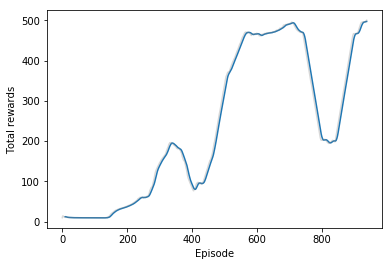

In [23]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Total rewards')

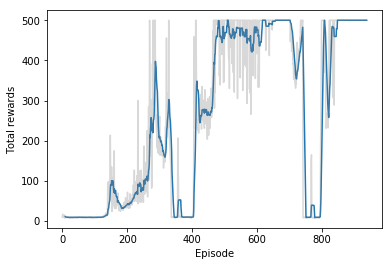

In [24]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Average losses')

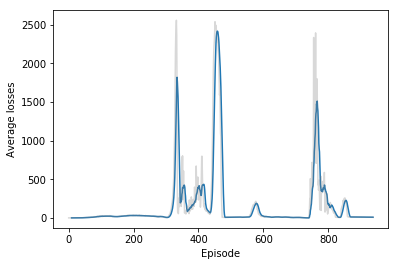

In [25]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

## Testing

Let's checkout how our trained agent plays the game.

In [24]:
# Creating a gym env
import gym
env = gym.make('CartPole-v0')
env = gym.make('CartPole-v1')

# A training graph session
with tf.Session(graph=graph) as sess:
    #sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Episodes/epochs
    for _ in range(10):
        state = env.reset()
        total_reward = 0

        # Steps/batches
        while True:
            env.render()
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: np.reshape(state, [1, -1])})
            action = np.argmax(action_logits)
            state, reward, done, _ = env.step(action)
            total_reward += reward
            if done:
                break
                
        # Closing the env
        print('total_reward: {}'.format(total_reward))
# Close the env at the end
env.close()

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0


## Extending this

So, Cart-Pole is a pretty simple game. However, the same model can be used to train an agent to play something much more complicated like Pong or Space Invaders. Instead of a state like we're using here though, you'd want to use convolutional layers to get the state from the screen images.

![Deep Q-Learning Atari](assets/atari-network.png)

I'll leave it as a challenge for you to use deep Q-learning to train an agent to play Atari games. Here's the original paper which will get you started: http://www.davidqiu.com:8888/research/nature14236.pdf.